# Credit Risk Assessment

## Import Libraries & Read Data

In [ ]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#display all columns
pd.set_option('display.max_columns', None)

#display all row
pd.set_option('display.max_rows', None)

In [ ]:
#read data
df = pd.read_csv('loan_data_2007_2014.csv')
df.head()

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501    1296599       5000         5000           4975.0   
1           1  1077430    1314167       2500         2500           2500.0   
2           2  1077175    1313524       2400         2400           2400.0   
3           3  1076863    1277178      10000        10000          10000.0   
4           4  1075358    1311748       3000         3000           3000.0   

         term  int_rate  installment grade sub_grade  \
0   36 months     10.65       162.87     B        B2   
1   60 months     15.27        59.83     C        C4   
2   36 months     15.96        84.33     C        C5   
3   36 months     13.49       339.31     C        C1   
4   60 months     12.69        67.79     B        B5   

                  emp_title emp_length home_ownership  annual_inc  \
0                       NaN  10+ years           RENT     24000.0   
1                     Ryder   < 1 year           RENT     30000.0   
2                       NaN  10+ years           RENT     12252.0   
3       AIR RESOURCES BOARD  10+ years           RENT     49200.0   
4  University Medical Group     1 year           RENT     80000.0   

  verification_status issue_d  loan_status pymnt_plan  \
0            Verified  Dec-11   Fully Paid          n   
1     Source Verified  Dec-11  Charged Off          n   
2        Not Verified  Dec-11   Fully Paid          n   
3     Source Verified  Dec-11   Fully Paid          n   
4     Source Verified  Dec-11      Current          n   

                                                 url  \
0  https://www.lendingclub.com/browse/loanDetail....   
1  https://www.lendingclub.com/browse/loanDetail....   
2  https://www.lendingclub.com/browse/loanDetail....   
3  https://www.lendingclub.com/browse/loanDetail....   
4  https://www.lendingclub.com/browse/loanDetail....   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65          0.0   
1                  bike    309xx         GA   1.00          0.0   
2  real estate business    606xx         IL   8.72          0.0   
3              personel    917xx         CA  20.00          0.0   
4              Personal    972xx         OR  17.94          0.0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85             1.0                     NaN   
1           Apr-99             5.0                     NaN   
2           Nov-01             2.0                     NaN   
3           Feb-96             1.0                    35.0   
4           Jan-96             0.0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN       3.0      0.0      13648        83.7   
1                     NaN       3.0      0.0       1687         9.4   
2                     NaN       2.0      0.0       2956        98.5   
3                     NaN      10.0      0.0       5598        21.0   
4                     NaN      15.0      0.0      27783        53.9   

   total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0        9.0                   f        0.0            0.0   5861.071414   
1        4.0                   f        0.0            0.0   1008.710000   
2       10.0                   f        0.0            0.0   3003.653644   
3       37.0                   f        0.0            0.0  12226.302210   
4       38.0                   f      766.9          766.9   3242.170000   

   total_

## Data Cleaning

In [ ]:
#check rows & column
df.shape
print(f'row : {df.shape[0]}')
print(f'column : {df.shape[1]}')

row : 466285
column : 75


In [ ]:
#drop columnn Unnamed: 0 because it is just index on dataset
df.drop(columns =['Unnamed: 0'], inplace = True)
df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

   int_rate  installment grade sub_grade                 emp_title emp_length  \
0     10.65       162.87     B        B2                       NaN  10+ years   
1     15.27        59.83     C        C4                     Ryder   < 1 year   
2     15.96        84.33     C        C5                       NaN  10+ years   
3     13.49       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4     12.69        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://www.lendingclub.com/browse/loanDetail....   
1          n  https://www.lendingclub.com/browse/loanDetail....   
2          n  https://www.lendingclub.com/browse/loanDetail....   
3          n  https://www.lendingclub.com/browse/loanDetail....   
4          n  https://www.lendingclub.com/browse/loanDetail....   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65          0.0   
1                  bike    309xx         GA   1.00          0.0   
2  real estate business    606xx         IL   8.72          0.0   
3              personel    917xx         CA  20.00          0.0   
4              Personal    972xx         OR  17.94          0.0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85             1.0                     NaN   
1           Apr-99             5.0                     NaN   
2           Nov-01             2.0                     NaN   
3           Feb-96             1.0                    35.0   
4           Jan-96             0.0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN       3.0      0.0      13648        83.7   
1                     NaN       3.0      0.0       1687         9.4   
2                     NaN       2.0      0.0       2956        98.5   
3                     NaN      10.0      0.0       5598        21.0   
4                     NaN      15.0      0.0      27783        53.9   

   total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0        9.0                   f        0.0            0.0   5861.071414   
1        4.0                   f        0.0            0.0   1008.710000   
2       10.0                   f        0.0            0.0   3003.653644   
3       37.0                   f        0.0            0.0  12226.302210   
4       38.0                   f      766.9          766.9   3242.170000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5831.78          5000.00        

In [ ]:
#data understanding
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [ ]:
#create subset based on column data type
categorical = df.select_dtypes(include = 'object')
numerical = df.select_dtypes(exclude = 'object')

#convert column to list
categorical_col = categorical.columns.to_list()
numerical_col = numerical.columns.to_list()

In [ ]:
df[numerical_col].describe()

id     member_id      loan_amnt    funded_amnt  \
count  4.662850e+05  4.662850e+05  466285.000000  466285.000000   
mean   1.307973e+07  1.459766e+07   14317.277577   14291.801044   
std    1.089371e+07  1.168237e+07    8286.509164    8274.371300   
min    5.473400e+04  7.047300e+04     500.000000     500.000000   
25%    3.639987e+06  4.379705e+06    8000.000000    8000.000000   
50%    1.010790e+07  1.194108e+07   12000.000000   12000.000000   
75%    2.073121e+07  2.300154e+07   20000.000000   20000.000000   
max    3.809811e+07  4.086083e+07   35000.000000   35000.000000   

       funded_amnt_inv       int_rate    installment    annual_inc  \
count    466285.000000  466285.000000  466285.000000  4.662810e+05   
mean      14222.329888      13.829236     432.061201  7.327738e+04   
std        8297.637788       4.357587     243.485550  5.496357e+04   
min           0.000000       5.420000      15.670000  1.896000e+03   
25%        8000.000000      10.990000     256.690000  4.500000e+04   
50%       12000.000000      13.660000     379.890000  6.300000e+04   
75%       19950.000000      16.490000     566.580000  8.896000e+04   
max       35000.000000      26.060000    1409.990000  7.500000e+06   

                 dti    delinq_2yrs  inq_last_6mths  mths_since_last_delinq  \
count  466285.000000  466256.000000   466256.000000           215934.000000   
mean       17.218758       0.284678        0.804745               34.104430   
std         7.851121       0.797365        1.091598               21.778487   
min         0.000000       0.000000        0.000000                0.000000   
25%        11.360000       0.000000        0.000000               16.000000   
50%        16.870000       0.000000        0.000000               31.000000   
75%        22.780000       0.000000        1.000000               49.000000   
max        39.990000      29.000000       33.000000              188.000000   

       mths_since_last_record       open_acc        pub_rec     revol_bal  \
count            62638.000000  466256.000000  466256.000000  4.662850e+05   
mean                74.306012      11.187069       0.160564  1.623020e+04   
std                 30.357653       4.987526       0.510863  2.067625e+04   
min                  0.000000       0.000000       0.000000  0.000000e+00   
25%                 53.000000       8.000000       0.000000  6.413000e+03   
50%                 76.000000      10.000000       0.000000  1.176400e+04   
75%                102.000000      14.000000       0.000000  2.033300e+04   
max                129.000000      84.000000      63.000000  2.568995e+06   

          revol_util      total_acc      out_prncp  out_prncp_inv  \
count  465945.000000  466256.000000  466285.000000  466285.000000   
mean       56.176947      25.064430    4410.062342    4408.452258   
std        23.732628      11.600141    6355.078769    6353.198001   
min         0.000000       1.000000       0.000000       0.000000   
25%        39.200000      17.000000       0.000000       0.000000   
50%        57.600000      23.000000     441.470000     441.380000   
75%        74.700000      32.000000    7341.650000    7338.390000   
max       892.300000     156.000000   32160.380000   32160.380000   

         total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
count  466285.000000    466285.000000    466285.000000  466285.000000   
mean    11540.686220     11469.892747      8866.014657    2588.677225   
std      8265.627112      8254.157579      7031.687997    2483.809661   
min         0.000000         0.000000         0.000000       0.000000   
25%      5552.125349      5499.250000      3708.560000     957.280000   
50%      9419.250943      9355.430000      6817.760000    1818.880000   
75%     15308.158460     15231.310000     12000.000000    3304.530000   
max     57777.579870     57777.580000     35000.030000   24205.620000   

       total_rec_late_fee     recoveries  collection_recovery_fee  \
count       466285.000000  

In [ ]:
#check null values on numerical
df[numerical_col].isnull().sum()

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
int_rate                            0
installment                         0
annual_inc                          4
dti                                 0
delinq_2yrs                        29
inq_last_6mths                     29
mths_since_last_delinq         250351
mths_since_last_record         403647
open_acc                           29
pub_rec                            29
revol_bal                           0
revol_util                        340
total_acc                          29
out_prncp                           0
out_prncp_inv                       0
total_pymnt                         0
total_pymnt_inv                     0
total_rec_prncp                     0
total_rec_int                       0
total_rec_late_fee                  0
recoveries                          0
collection_r

There are many features of numerical column that have null values :
- annual_inc
- delinq_2yrs
- inq_last_6mths
- mths_since_last_delinq
- mths_since_last_record
- open_acc
- pub_rec
- revol_util
- total_acc
- collections_12_mths_ex_med
- mths_since_last_major_derog
- annual_inc_joint              
- dti_joint                     
- verification_status_joint      
- acc_now_delinq                   
- tot_coll_amt                    
- tot_cur_bal                     
- open_acc_6m                   
- open_il_6m                    
- open_il_12m                    
- open_il_24m                    
- mths_since_rcnt_il            
- total_bal_il                  
- il_util                        
- open_rv_12m                    
- open_rv_24m                    
- max_bal_bc                     
- all_util                       
- total_rev_hi_lim                
- inq_fi                         
- total_cu_tl                   
- inq_last_12m                   

In [ ]:
#check null values on categorical
df[categorical_col].isnull().sum()

term                        0
grade                       0
sub_grade                   0
emp_title               27588
emp_length              21008
home_ownership              0
verification_status         0
issue_d                     0
loan_status                 0
pymnt_plan                  0
url                         0
desc                   340302
purpose                     0
title                      20
zip_code                    0
addr_state                  0
earliest_cr_line           29
initial_list_status         0
last_pymnt_d              376
next_pymnt_d           227214
last_credit_pull_d         42
application_type            0
dtype: int64

There are many features of categorical column that have null values :
- emp_title
- emp_length
- desc
- last_pymnt_d              
- next_pymnt_d           
- last_credit_pull_d

In [ ]:
df[categorical_col].describe().T

count  unique  \
term                 466285       2   
grade                466285       7   
sub_grade            466285      35   
emp_title            438697  205475   
emp_length           445277      11   
home_ownership       466285       6   
verification_status  466285       3   
issue_d              466285      91   
loan_status          466285       9   
pymnt_plan           466285       2   
url                  466285  466285   
desc                 125983  124436   
purpose              466285      14   
title                466265   63099   
zip_code             466285     888   
addr_state           466285      50   
earliest_cr_line     466256     664   
initial_list_status  466285       2   
last_pymnt_d         465909      98   
next_pymnt_d         239071     100   
last_credit_pull_d   466243     103   
application_type     466285       1   

                                                                   top    freq  
term                                                         36 months  337953  
grade                                                                B  136929  
sub_grade                                                           B3   31686  
emp_title                                                      Teacher    5399  
emp_length                                                   10+ years  150049  
home_ownership                                                MORTGAGE  235875  
verification_status                                           Verified  168055  
issue_d                                                         Oct-14   38782  
loan_status                                                    Current  224226  
pymnt_plan                                                           n  466276  
url                  https://www.lendingclub.com/browse/loanDetail....       1  
desc                                                                       234  
purpose                                             debt_consolidation  274195  
title                                               Debt consolidation  164075  
zip_code                                                         945xx    5304  
addr_state                                                          CA   71450  
earliest_cr_line                                                Oct-00    3674  
initial_list_status                                                  f  303005  
last_pymnt_d                                                    Jan-16  179620  
next_pymnt_d                                                    Feb-16  208393  
last_credit_pull_d                                              Jan-16  327699  
application_type                                            INDIVIDUAL  466285

Insight :  
Some features with date values still have object data type, need to convert it to datetime :
- issue_d
- last_pymnt_d
- next_pymnt_d
- last_credit_pull_d

### Check Duplicated Values

In [ ]:
#check duplicated values
df.duplicated().sum()

0

Insight :
There is no duplicate data

### Check Missing Values

In [ ]:
#count total null in each column
sum_null = df.isnull().sum()

#count % of total null in each column
missing_percent = (sum_null * 100)/len(df)

#type of each column
df_type = [df[col].dtype for col in df.columns]

#create new dataframe for missing value
df_isnull = pd.DataFrame({'total_null':sum_null,
                         'data_type':df_type,
                         'percentage_missing':missing_percent})

#sort percentage of missing value from largest to lowest
df_isnull.sort_values('percentage_missing', ascending = False, inplace = True)

#display all missing values
df_isnull_sort = df_isnull[df_isnull['percentage_missing']>0].reset_index()
df_isnull_sort

index  total_null data_type  percentage_missing
0                  inq_last_12m      466285   float64          100.000000
1     verification_status_joint      466285   float64          100.000000
2                   open_acc_6m      466285   float64          100.000000
3                    open_il_6m      466285   float64          100.000000
4                   open_il_12m      466285   float64          100.000000
5                   open_il_24m      466285   float64          100.000000
6            mths_since_rcnt_il      466285   float64          100.000000
7                     dti_joint      466285   float64          100.000000
8                  total_bal_il      466285   float64          100.000000
9              annual_inc_joint      466285   float64          100.000000
10                      il_util      466285   float64          100.000000
11                  open_rv_12m      466285   float64          100.000000
12                  open_rv_24m      466285   float64          100.000000
13                   max_bal_bc      466285   float64          100.000000
14                     all_util      466285   float64          100.000000
15                       inq_fi      466285   float64          100.000000
16                  total_cu_tl      466285   float64          100.000000
17       mths_since_last_record      403647   float64           86.566585
18  mths_since_last_major_derog      367311   float64           78.773926
19                         desc      340302    object           72.981546
20       mths_since_last_delinq      250351   float64           53.690554
21                 next_pymnt_d      227214    object           48.728567
22                 tot_coll_amt       70276   float64           15.071469
23                  tot_cur_bal       70276   float64           15.071469
24             total_rev_hi_lim       70276   float64           15.071469
25                    emp_title       27588    object            5.916553
26                   emp_length       21008    object            4.505399
27                 last_pymnt_d         376    object            0.080637
28                   revol_util         340   float64            0.072917
29   collections_12_mths_ex_med         145   float64            0.031097
30           last_credit_pull_d          42    object            0.009007
31                     open_acc          29   float64            0.006219
32                      pub_rec          29   float64            0.006219
33                    total_acc          29   float64            0.006219
34               inq_last_6mths          29   float64            0.006219
35             earliest_cr_line          29    object            0.006219
36                  delinq_2yrs          29   float64            0.006219
37               acc_now_delinq          29   float64            0.006219
38                        title          20    object            0.004289
39                   annual_inc           4   float64            0.000858

### Handling Missing Value

In [ ]:
#drop feature that have missing value > 50%
col_null = df_isnull.loc[df_isnull['percentage_missing']>50].index.tolist()
df.drop(columns = col_null, inplace = True)

In [ ]:
df.head(2)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   

   int_rate  installment grade sub_grade emp_title emp_length home_ownership  \
0     10.65       162.87     B        B2       NaN  10+ years           RENT   
1     15.27        59.83     C        C4     Ryder   < 1 year           RENT   

   annual_inc verification_status issue_d  loan_status pymnt_plan  \
0     24000.0            Verified  Dec-11   Fully Paid          n   
1     30000.0     Source Verified  Dec-11  Charged Off          n   

                                                 url      purpose     title  \
0  https://www.lendingclub.com/browse/loanDetail....  credit_card  Computer   
1  https://www.lendingclub.com/browse/loanDetail....          car      bike   

  zip_code addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  \
0    860xx         AZ  27.65          0.0           Jan-85             1.0   
1    309xx         GA   1.00          0.0           Apr-99             5.0   

   open_acc  pub_rec  revol_bal  revol_util  total_acc initial_list_status  \
0       3.0      0.0      13648        83.7        9.0                   f   
1       3.0      0.0       1687         9.4        4.0                   f   

   out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0        0.0            0.0  5861.071414          5831.78          5000.00   
1        0.0            0.0  1008.710000          1008.71           456.46   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         861.07                 0.0        0.00                     0.00   
1         435.17                 0.0      117.08                     1.11   

  last_pymnt_d  last_pymnt_amnt next_pymnt_d last_credit_pull_d  \
0       Jan-15           171.62          NaN             Jan-16   
1       Apr-13           119.66          NaN             Sep-13   

   collections_12_mths_ex_med  policy_code application_type  acc_now_delinq  \
0                         0.0            1       INDIVIDUAL             0.0   
1                         0.0            1       INDIVIDUAL             0.0   

   tot_coll_amt  tot_cur_bal  total_rev_hi_lim  
0           NaN          NaN               NaN  
1           NaN          NaN               NaN

In [ ]:
#replace missing values on feature tot_coll_amt, tot_cur_bal, total_rev_hi_lim with 0,
#the assumption is the customer didnt' borrow again
for item in ['tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']:
    df[item] = df[item].fillna(0)

**Notes :**  
- 'tot_coll_amt' = Total collection amounts ever owed
- 'tot_cur_bal' = Total current balance of all accounts
- 'total_rev_hi_lim' = Total revolving high credit/credit limit

In [ ]:
df[['tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']].head(2)

tot_coll_amt  tot_cur_bal  total_rev_hi_lim
0           0.0          0.0               0.0
1           0.0          0.0               0.0

In [ ]:
#replace missing values on numerical category with median
numericals = df.select_dtypes(exclude = 'object')
for item in numericals:
    df[item] = df[item].fillna(df[item].median())

In [ ]:
numericals.head(2)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  int_rate  \
0  1077501    1296599       5000         5000           4975.0     10.65   
1  1077430    1314167       2500         2500           2500.0     15.27   

   installment  annual_inc    dti  delinq_2yrs  inq_last_6mths  open_acc  \
0       162.87     24000.0  27.65          0.0             1.0       3.0   
1        59.83     30000.0   1.00          0.0             5.0       3.0   

   pub_rec  revol_bal  revol_util  total_acc  out_prncp  out_prncp_inv  \
0      0.0      13648        83.7        9.0        0.0            0.0   
1      0.0       1687         9.4        4.0        0.0            0.0   

   total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
0  5861.071414          5831.78          5000.00         861.07   
1  1008.710000          1008.71           456.46         435.17   

   total_rec_late_fee  recoveries  collection_recovery_fee  last_pymnt_amnt  \
0                 0.0        0.00                     0.00           171.62   
1                 0.0      117.08                     1.11           119.66   

   collections_12_mths_ex_med  policy_code  acc_now_delinq  tot_coll_amt  \
0                         0.0            1             0.0           0.0   
1                         0.0            1             0.0           0.0   

   tot_cur_bal  total_rev_hi_lim  
0          0.0               0.0  
1          0.0               0.0

In [ ]:
#replace missing values on categorical with mode
categoricals = df.select_dtypes(include = 'object')
for item in categoricals:
    df[item] = df[item].fillna(df[item].mode().iloc[0])

In [ ]:
#check whether still have missing value
df.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_ac

### Drop Unnecessary Column

In [ ]:
df.drop(columns = ['member_id','url','title','addr_state','zip_code','policy_code','application_type','emp_title'], inplace = True)
df_clean = df.copy()

## Feature Engineering

### Feature : 'earliest_cr_line','last_credit_pull_d','last_pymnt_d','issue_d','next_pymnt_d'

In [ ]:
#check date feature
df_clean[['earliest_cr_line','last_credit_pull_d','last_pymnt_d','issue_d','next_pymnt_d']].head(2)

earliest_cr_line last_credit_pull_d last_pymnt_d issue_d next_pymnt_d
0           Jan-85             Jan-16       Jan-15  Dec-11       Feb-16
1           Apr-99             Sep-13       Apr-13  Dec-11       Feb-16

In [ ]:
#change format to datetime
df_clean['earliest_cr_line']=pd.to_datetime(df_clean['earliest_cr_line'], format = '%b-%y')
df_clean['last_credit_pull_d']=pd.to_datetime(df_clean['last_credit_pull_d'], format = '%b-%y')
df_clean['last_pymnt_d']=pd.to_datetime(df_clean['last_pymnt_d'], format = '%b-%y')
df_clean['issue_d']=pd.to_datetime(df_clean['issue_d'], format = '%b-%y')
df_clean['next_pymnt_d']=pd.to_datetime(df_clean['next_pymnt_d'], format = '%b-%y')

#check date feature after conversion:
df_clean[['earliest_cr_line','last_credit_pull_d','last_pymnt_d','issue_d','next_pymnt_d']].head(2)

earliest_cr_line last_credit_pull_d last_pymnt_d    issue_d next_pymnt_d
0       1985-01-01         2016-01-01   2015-01-01 2011-12-01   2016-02-01
1       1999-04-01         2013-09-01   2013-04-01 2011-12-01   2016-02-01

**Notes :**  
- 'earliest_cr_line' = The month the borrower's earliest reported credit line was opened
- 'last_pymnt_d' = Last month payment was received
- 'issue_d'= The month which the loan was funded
- 'next_pymnt_d' = Next scheduled payment date

In [ ]:
#Adding new feature :
#pymnt_time = the number of month between 'next_pymnt_d' and 'last_pymnt_d'
#credit_pull_year = the number of year between 'last_credit_pull_d' and 'earliest_cr_line'

#adding pymnt_time
def diff_month(d1,d2):
    return (d1.year - d2.year)*12 + (d1.month - d2.month)
df_clean['pymnt_time'] = df_clean.apply(lambda x : diff_month(x.next_pymnt_d, x.last_pymnt_d), axis =1)

#adding credit_pull_year
def diff_year(d1,d2):
    return (d1.year - d2.year)
df_clean['credit_pull_year'] = df_clean.apply(lambda x : diff_year(x.last_credit_pull_d, x.earliest_cr_line), axis =1)

df_clean.head(2)

id  loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
0  1077501       5000         5000           4975.0   36 months     10.65   
1  1077430       2500         2500           2500.0   60 months     15.27   

   installment grade sub_grade emp_length home_ownership  annual_inc  \
0       162.87     B        B2  10+ years           RENT     24000.0   
1        59.83     C        C4   < 1 year           RENT     30000.0   

  verification_status    issue_d  loan_status pymnt_plan      purpose    dti  \
0            Verified 2011-12-01   Fully Paid          n  credit_card  27.65   
1     Source Verified 2011-12-01  Charged Off          n          car   1.00   

   delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  \
0          0.0       1985-01-01             1.0       3.0      0.0      13648   
1          0.0       1999-04-01             5.0       3.0      0.0       1687   

   revol_util  total_acc initial_list_status  out_prncp  out_prncp_inv  \
0        83.7        9.0                   f        0.0            0.0   
1         9.4        4.0                   f        0.0            0.0   

   total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
0  5861.071414          5831.78          5000.00         861.07   
1  1008.710000          1008.71           456.46         435.17   

   total_rec_late_fee  recoveries  collection_recovery_fee last_pymnt_d  \
0                 0.0        0.00                     0.00   2015-01-01   
1                 0.0      117.08                     1.11   2013-04-01   

   last_pymnt_amnt next_pymnt_d last_credit_pull_d  \
0           171.62   2016-02-01         2016-01-01   
1           119.66   2016-02-01         2013-09-01   

   collections_12_mths_ex_med  acc_now_delinq  tot_coll_amt  tot_cur_bal  \
0                         0.0             0.0           0.0          0.0   
1                         0.0             0.0           0.0          0.0   

   total_rev_hi_lim  pymnt_time  credit_pull_year  
0               0.0          13                31  
1               0.0          34                14

In [ ]:
#display pymnt_time < 0
df_clean[df_clean['pymnt_time']<0][['next_pymnt_d','last_pymnt_d','pymnt_time']]

next_pymnt_d last_pymnt_d  pymnt_time
40122   2011-02-01   2016-01-01         -59
40481   2010-10-01   2016-01-01         -63
40498   2010-10-01   2016-01-01         -63
40753   2010-06-01   2016-01-01         -67
40769   2010-06-01   2016-01-01         -67
40785   2010-06-01   2016-01-01         -67
40848   2010-05-01   2016-01-01         -68
40914   2010-04-01   2016-01-01         -69
40927   2010-04-01   2016-01-01         -69
41145   2009-11-01   2016-01-01         -74
41887   2008-12-01   2016-01-01         -85
41931   2009-01-01   2016-01-01         -84

**Insight :**  
There are negative values in pymnt_time, it means that the customer cannot afford to make a payment.   
So the values gonna get replaced with 0

In [ ]:
#display credit_pull_year
df_clean[df_clean['credit_pull_year']<0][['last_credit_pull_d', 'earliest_cr_line', 'credit_pull_year']].head()

last_credit_pull_d earliest_cr_line  credit_pull_year
1580         2013-09-01       2062-09-01               -49
1770         2015-09-01       2068-09-01               -53
2799         2016-01-01       2064-09-01               -48
3282         2015-05-01       2067-09-01               -52
3359         2014-11-01       2065-02-01               -51

**Insight :**  
There are negative values in credit_pull_year, because there are false input in earliest_cr_line column.   
So the values gonna get replaced with the maximum of the credit_pull_year feature.

In [ ]:
#replace the value of 'pymnt_time' and 'credit_pull_year'
df_clean.loc[df_clean['pymnt_time']<0] = 0
df_clean.loc[df_clean['credit_pull_year']<0] = df_clean['credit_pull_year'].max()

In [ ]:
#check if 'pymnt_time' and 'credit_pull_year' already getting replaced
df_clean[['pymnt_time','credit_pull_year']].sort_values(['pymnt_time','credit_pull_year'],ascending = [True, True]).head(5)

pymnt_time  credit_pull_year
40122           0                 0
40481           0                 0
40498           0                 0
40753           0                 0
40769           0                 0

### Feature : Term

In [ ]:
#count term value
df_clean['term'].value_counts()

 36 months    337075
 60 months    128029
47              1169
0                 12
Name: term, dtype: int64

In [ ]:
#extract number from string with regex capture
df_clean['term'] = df_clean['term'].str.extract('(\d+)')

In [ ]:
#check whether the number already being extract
df_clean['term'].head()

0    36
1    60
2    36
3    36
4    60
Name: term, dtype: object

In [ ]:
#count extract of term value
df_clean['term'].value_counts()

36    337075
60    128029
Name: term, dtype: int64

In [ ]:
#display feature data
df_clean.head(3)

id  loan_amnt  funded_amnt  funded_amnt_inv term  int_rate  \
0  1077501       5000         5000           4975.0   36     10.65   
1  1077430       2500         2500           2500.0   60     15.27   
2  1077175       2400         2400           2400.0   36     15.96   

   installment grade sub_grade emp_length home_ownership  annual_inc  \
0       162.87     B        B2  10+ years           RENT     24000.0   
1        59.83     C        C4   < 1 year           RENT     30000.0   
2        84.33     C        C5  10+ years           RENT     12252.0   

  verification_status              issue_d  loan_status pymnt_plan  \
0            Verified  2011-12-01 00:00:00   Fully Paid          n   
1     Source Verified  2011-12-01 00:00:00  Charged Off          n   
2        Not Verified  2011-12-01 00:00:00   Fully Paid          n   

          purpose    dti  delinq_2yrs     earliest_cr_line  inq_last_6mths  \
0     credit_card  27.65          0.0  1985-01-01 00:00:00             1.0   
1             car   1.00          0.0  1999-04-01 00:00:00             5.0   
2  small_business   8.72          0.0  2001-11-01 00:00:00             2.0   

   open_acc  pub_rec  revol_bal  revol_util  total_acc initial_list_status  \
0       3.0      0.0      13648        83.7        9.0                   f   
1       3.0      0.0       1687         9.4        4.0                   f   
2       2.0      0.0       2956        98.5       10.0                   f   

   out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0        0.0            0.0  5861.071414          5831.78          5000.00   
1        0.0            0.0  1008.710000          1008.71           456.46   
2        0.0            0.0  3003.653644          3003.65          2400.00   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         861.07                 0.0        0.00                     0.00   
1         435.17                 0.0      117.08                     1.11   
2         603.65                 0.0        0.00                     0.00   

          last_pymnt_d  last_pymnt_amnt         next_pymnt_d  \
0  2015-01-01 00:00:00           171.62  2016-02-01 00:00:00   
1  2013-04-01 00:00:00           119.66  2016-02-01 00:00:00   
2  2014-06-01 00:00:00           649.91  2016-02-01 00:00:00   

    last_credit_pull_d  collections_12_mths_ex_med  acc_now_delinq  \
0  2016-01-01 00:00:00                         0.0             0.0   
1  2013-09-01 00:00:00                         0.0             0.0   
2  2016-01-01 00:00:00                         0.0             0.0   

   tot_coll_amt  tot_cur_bal  total_rev_hi_lim  pymnt_time  credit_pull_year  
0           0.0          0.0               0.0          13                31  
1           0.0          0.0               0.0          34                14  
2           0.0          0.0               0.0          20                15

## Exploratory Data Analysis (EDA)

### Removing Highly Correlated Features

In [ ]:
#copy dataset
df_eda = df_clean.copy()

In [ ]:
#drop id columns
df_eda.drop(columns = ['id'], inplace = True)

<Axes: >

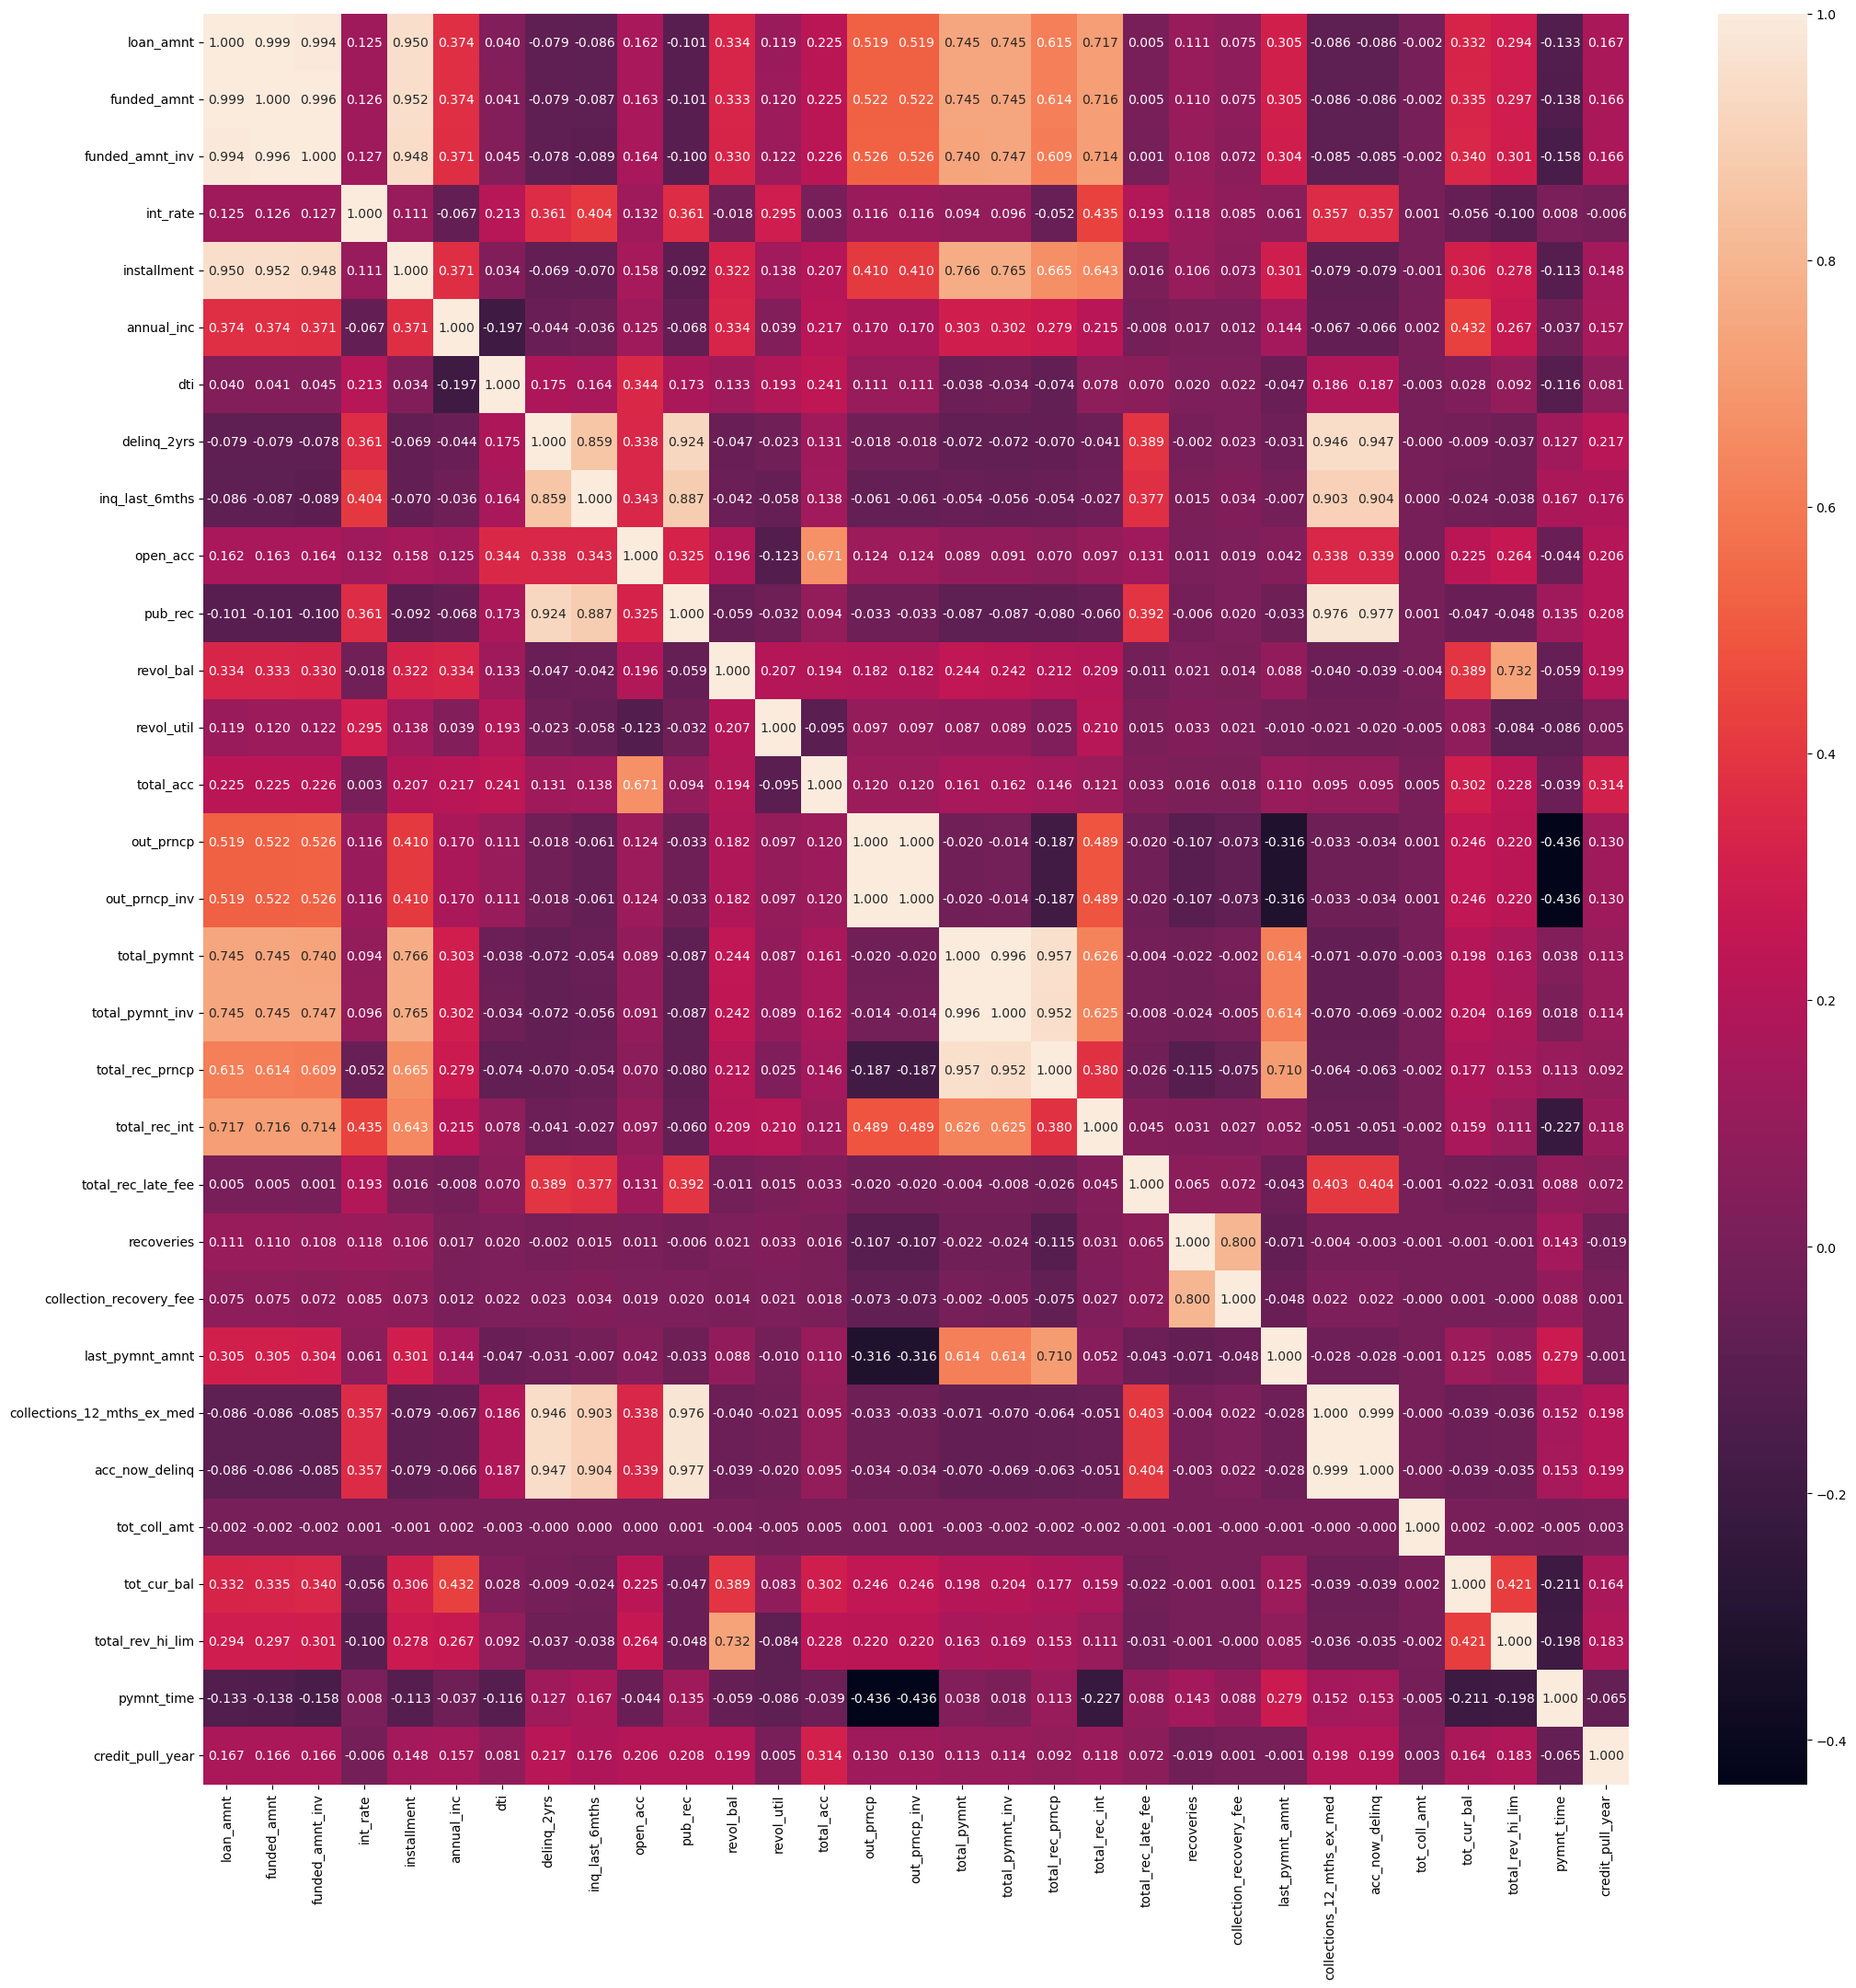

In [ ]:
#plot correlation matrix with 3 decimal places
plt.figure(figsize=(25,25))
sns.heatmap(df_eda.corr(), annot = True, fmt = '.3f')

**Notes:**
remove feature that have correlation > 0.9, because it could lead to biased result if left unchecked

In [ ]:
#correlation table with absolute number (no negative, only positive)
corr_matrix = df_eda.corr().abs()
corr_matrix

loan_amnt  funded_amnt  funded_amnt_inv  int_rate  \
loan_amnt                    1.000000     0.998556         0.994376  0.125185   
funded_amnt                  0.998556     1.000000         0.996144  0.125885   
funded_amnt_inv              0.994376     0.996144         1.000000  0.127462   
int_rate                     0.125185     0.125885         0.127462  1.000000   
installment                  0.949979     0.952088         0.947709  0.110649   
annual_inc                   0.374208     0.373624         0.371111  0.066671   
dti                          0.040151     0.041486         0.045465  0.213153   
delinq_2yrs                  0.079110     0.078909         0.078045  0.360945   
inq_last_6mths               0.086295     0.086546         0.088761  0.404014   
open_acc                     0.162372     0.163134         0.164140  0.131518   
pub_rec                      0.101142     0.101001         0.100001  0.361229   
revol_bal                    0.333529     0.333143         0.329541  0.018265   
revol_util                   0.118814     0.119941         0.121813  0.295124   
total_acc                    0.225473     0.225347         0.225738  0.003100   
out_prncp                    0.519359     0.522101         0.525787  0.116185   
out_prncp_inv                0.519319     0.522062         0.525760  0.116208   
total_pymnt                  0.745308     0.744834         0.739529  0.093768   
total_pymnt_inv              0.745031     0.744894         0.746906  0.095876   
total_rec_prncp              0.614710     0.614254         0.608979  0.052201   
total_rec_int                0.716674     0.716466         0.714276  0.434548   
total_rec_late_fee           0.004969     0.004705         0.000977  0.193238   
recoveries                   0.110629     0.110275         0.107890  0.118349   
collection_recovery_fee      0.075108     0.074961         0.071575  0.084790   
last_pymnt_amnt              0.305404     0.305343         0.304270  0.060757   
collections_12_mths_ex_med   0.086186     0.086147         0.085463  0.356572   
acc_now_delinq               0.085696     0.085663         0.084999  0.356751   
tot_coll_amt                 0.001965     0.001931         0.001833  0.001184   
tot_cur_bal                  0.332002     0.334911         0.339850  0.055600   
total_rev_hi_lim             0.293983     0.296603         0.301074  0.099543   
pymnt_time                   0.132946     0.138234         0.158213  0.008454   
credit_pull_year             0.166636     0.166173         0.166435  0.006337   

                            installment  annual_inc       dti  delinq_2yrs  \
loan_amnt                      0.949979    0.374208  0.040151     0.079110   
funded_amnt                    0.952088    0.373624  0.041486     0.078909   
funded_amnt_inv                0.947709    0.371111  0.045465     0.078045   
int_rate                       0.110649    0.066671  0.213153     0.360945   
installment                    1.000000    0.371230  0.034222     0.069245   
annual_inc                     0.371230    1.000000  0.197100     0.044099   
dti                            0.034222    0.197100  1.000000     0.175482   
delinq_2yrs                    0.069245    0.044099  0.175482     1.000000   
inq_last_6mths                 0.070403    0.036106  0.163561     0.858564   
open_acc                       0.157953    0.125469  0.344229     0.338212   
pub_rec                        0.092015    0.068444  0.172788     0.924274   
revol_bal                      0.322259    0.334006  0.133468     0.047143   
revol_util                     0.137820    0.038653  0.193027     0.022585   
total_acc                      0.206983    0.216963  0.240948     0.131263   
out_prncp                      0.409924    0.169786  0.111441     0.018382   
out_prncp_inv                  0.409897    0.169787  0.111430     0.018381   
total_pymnt                    0.765706    0.302938  0.038386     0.072075   
total_pymnt_inv                

**Notes :**  
**Removing highly correlated features (Dimensionality Reduction in Python)**  
Features that are perfectly correlated to each other, with a correlation coefficient of one or minus one, bring no new information to a dataset but do add to the complexity. So naturally, we would want to drop one of the two features that hold the same information. In addition to this we might want to drop features that have correlation coefficients close to one or minus one if they are measurements of the same or similar things. Not just for simplicity's sake but also to avoid models to overfit on the small, probably meaningless, differences between these values.

**Notes :**
Correlation coefficients whose magnitude are between 0.7 and 0.9 indicate variables which can be considered highly correlated. Because of that, for correlation > 0.9 are gonna removed

In [ ]:
#create and apply mask
mask = corr_matrix.where(np.triu(np.ones(corr_matrix.shape, dtype = bool), k=1))
mask

loan_amnt  funded_amnt  funded_amnt_inv  int_rate  \
loan_amnt                         NaN     0.998556         0.994376  0.125185   
funded_amnt                       NaN          NaN         0.996144  0.125885   
funded_amnt_inv                   NaN          NaN              NaN  0.127462   
int_rate                          NaN          NaN              NaN       NaN   
installment                       NaN          NaN              NaN       NaN   
annual_inc                        NaN          NaN              NaN       NaN   
dti                               NaN          NaN              NaN       NaN   
delinq_2yrs                       NaN          NaN              NaN       NaN   
inq_last_6mths                    NaN          NaN              NaN       NaN   
open_acc                          NaN          NaN              NaN       NaN   
pub_rec                           NaN          NaN              NaN       NaN   
revol_bal                         NaN          NaN              NaN       NaN   
revol_util                        NaN          NaN              NaN       NaN   
total_acc                         NaN          NaN              NaN       NaN   
out_prncp                         NaN          NaN              NaN       NaN   
out_prncp_inv                     NaN          NaN              NaN       NaN   
total_pymnt                       NaN          NaN              NaN       NaN   
total_pymnt_inv                   NaN          NaN              NaN       NaN   
total_rec_prncp                   NaN          NaN              NaN       NaN   
total_rec_int                     NaN          NaN              NaN       NaN   
total_rec_late_fee                NaN          NaN              NaN       NaN   
recoveries                        NaN          NaN              NaN       NaN   
collection_recovery_fee           NaN          NaN              NaN       NaN   
last_pymnt_amnt                   NaN          NaN              NaN       NaN   
collections_12_mths_ex_med        NaN          NaN              NaN       NaN   
acc_now_delinq                    NaN          NaN              NaN       NaN   
tot_coll_amt                      NaN          NaN              NaN       NaN   
tot_cur_bal                       NaN          NaN              NaN       NaN   
total_rev_hi_lim                  NaN          NaN              NaN       NaN   
pymnt_time                        NaN          NaN              NaN       NaN   
credit_pull_year                  NaN          NaN              NaN       NaN   

                            installment  annual_inc       dti  delinq_2yrs  \
loan_amnt                      0.949979    0.374208  0.040151     0.079110   
funded_amnt                    0.952088    0.373624  0.041486     0.078909   
funded_amnt_inv                0.947709    0.371111  0.045465     0.078045   
int_rate                       0.110649    0.066671  0.213153     0.360945   
installment                         NaN    0.371230  0.034222     0.069245   
annual_inc                          NaN         NaN  0.197100     0.044099   
dti                                 NaN         NaN       NaN     0.175482   
delinq_2yrs                         NaN         NaN       NaN          NaN   
inq_last_6mths                      NaN         NaN       NaN          NaN   
open_acc                            NaN         NaN       NaN          NaN   
pub_rec                             NaN         NaN       NaN          NaN   
revol_bal                           NaN         NaN       NaN          NaN   
revol_util                          NaN         NaN       NaN          NaN   
total_acc                           NaN         NaN       NaN          NaN   
out_prncp                           NaN         NaN       NaN          NaN   
out_prncp_inv                       NaN         NaN       NaN          NaN   
total_pymnt                         NaN         NaN       NaN          NaN   
total_pymnt_inv                

In [ ]:
#high correlated column
high_col = [col for col in mask.columns if any (mask[col] > 0.9)]
high_col

['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'pub_rec',
 'out_prncp_inv',
 'total_pymnt_inv',
 'total_rec_prncp',
 'collections_12_mths_ex_med',
 'acc_now_delinq']

In [ ]:
#drop high correlated column
df_eda.drop(high_col, axis = 1, inplace = True)

In [ ]:
df_eda.head(2)

loan_amnt term  int_rate grade sub_grade emp_length home_ownership  \
0       5000   36     10.65     B        B2  10+ years           RENT   
1       2500   60     15.27     C        C4   < 1 year           RENT   

   annual_inc verification_status              issue_d  loan_status  \
0     24000.0            Verified  2011-12-01 00:00:00   Fully Paid   
1     30000.0     Source Verified  2011-12-01 00:00:00  Charged Off   

  pymnt_plan      purpose    dti  delinq_2yrs     earliest_cr_line  \
0          n  credit_card  27.65          0.0  1985-01-01 00:00:00   
1          n          car   1.00          0.0  1999-04-01 00:00:00   

   inq_last_6mths  open_acc  revol_bal  revol_util  total_acc  \
0             1.0       3.0      13648        83.7        9.0   
1             5.0       3.0       1687         9.4        4.0   

  initial_list_status  out_prncp  total_pymnt  total_rec_int  \
0                   f        0.0  5861.071414         861.07   
1                   f        0.0  1008.710000         435.17   

   total_rec_late_fee  recoveries  collection_recovery_fee  \
0                 0.0        0.00                     0.00   
1                 0.0      117.08                     1.11   

          last_pymnt_d  last_pymnt_amnt         next_pymnt_d  \
0  2015-01-01 00:00:00           171.62  2016-02-01 00:00:00   
1  2013-04-01 00:00:00           119.66  2016-02-01 00:00:00   

    last_credit_pull_d  tot_coll_amt  tot_cur_bal  total_rev_hi_lim  \
0  2016-01-01 00:00:00           0.0          0.0               0.0   
1  2013-09-01 00:00:00           0.0          0.0               0.0   

   pymnt_time  credit_pull_year  
0          13                31  
1          34                14

In [ ]:
#display categorical value
df_eda.select_dtypes(include = 'object').nunique()

term                     2
grade                    9
sub_grade               37
emp_length              13
home_ownership           8
verification_status      5
issue_d                 93
loan_status             11
pymnt_plan               4
purpose                 16
earliest_cr_line       517
initial_list_status      4
last_pymnt_d           100
next_pymnt_d           102
last_credit_pull_d     105
dtype: int64

grade and sub_grade has similar interpretations, so drop the sub_grade, because already represented with grade

In [ ]:
#drop sub_grade column
df_eda.drop(['sub_grade'],axis =1, inplace =True)

### Univariate Analysis

In [ ]:
#create subset of numerical and categorical
num = df_eda.select_dtypes(include = 'number').columns
category = df_eda.select_dtypes(include ='object').columns

In [ ]:
df_eda.select_dtypes(include ='object').head(2)

term grade emp_length home_ownership verification_status  \
0   36     B  10+ years           RENT            Verified   
1   60     C   < 1 year           RENT     Source Verified   

               issue_d  loan_status pymnt_plan      purpose  \
0  2011-12-01 00:00:00   Fully Paid          n  credit_card   
1  2011-12-01 00:00:00  Charged Off          n          car   

      earliest_cr_line initial_list_status         last_pymnt_d  \
0  1985-01-01 00:00:00                   f  2015-01-01 00:00:00   
1  1999-04-01 00:00:00                   f  2013-04-01 00:00:00   

          next_pymnt_d   last_credit_pull_d  
0  2016-02-01 00:00:00  2016-01-01 00:00:00  
1  2016-02-01 00:00:00  2013-09-01 00:00:00

#### Loan Status

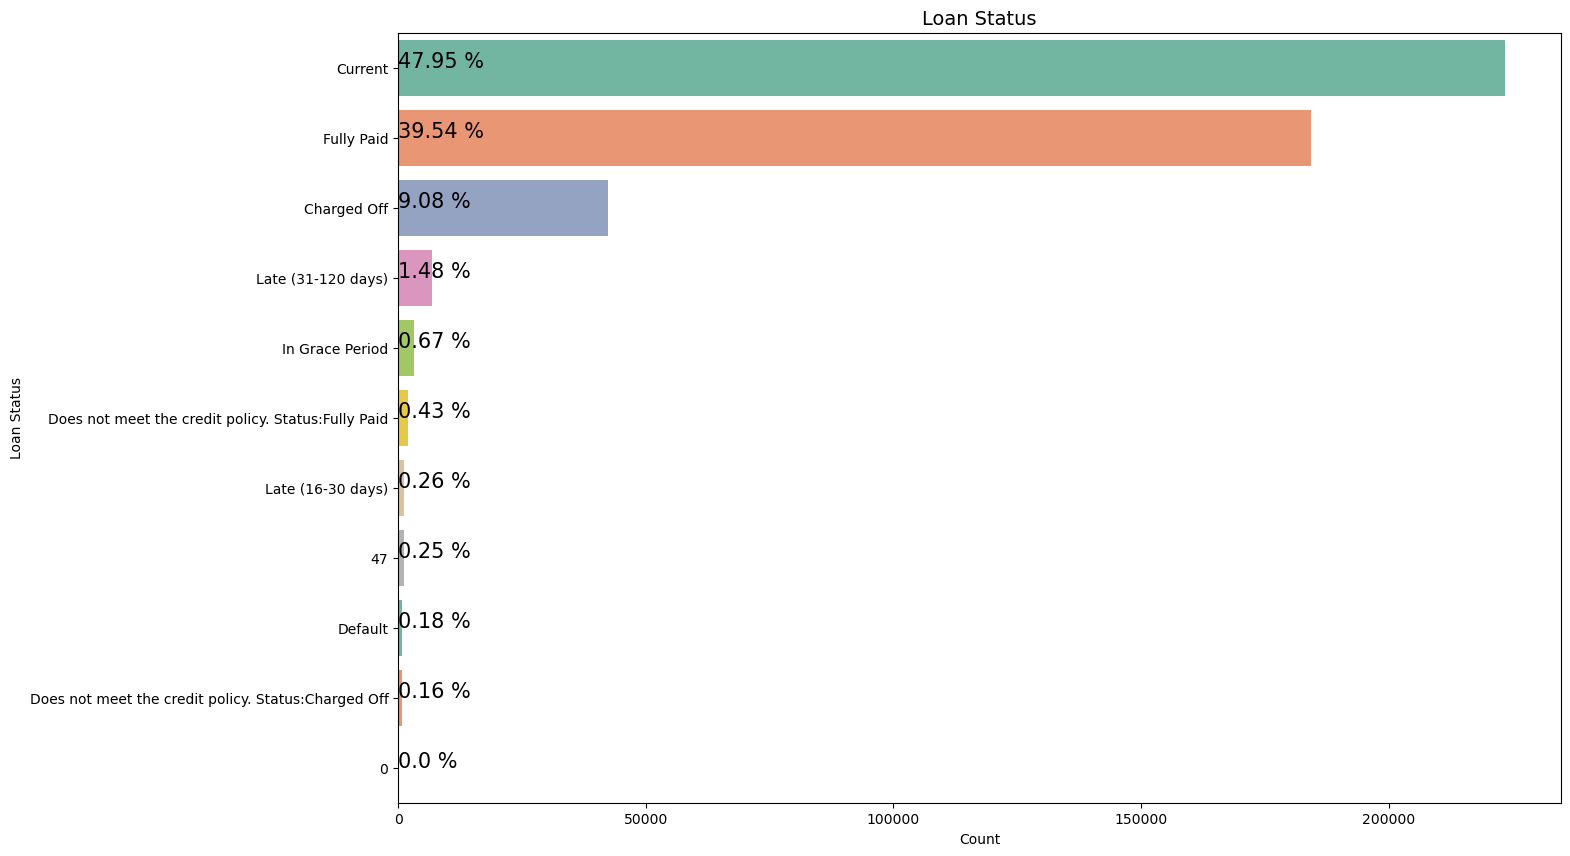

In [ ]:
#plot loan status with descending order:
plt.figure(figsize=(15,10))
sns.countplot(y = df_eda['loan_status'], palette='Set2', order =df_eda['loan_status'].value_counts().index)
plt.title('Loan Status', fontsize=14)

for i,value in enumerate(df_eda['loan_status'].value_counts(normalize=True).mul(100).round(2)):
    text = f'{value} %'
    plt.text(value, i, text, fontsize=15, ha='left')

plt.xlabel('Count')
plt.ylabel('Loan Status')
plt.show()

**Insight :**  
- The majority of loan status distribution is current 47.95%, and fully paid 39.54%, it means that the borrower are meeting their payment obligation.  
- There are significant number of charged off 9.08%. It means that the borrower has become delinquent on payments, and potential financial loss from the lender.
- Late (31-120 days) is 1.48%. It means that there are delay in loan payment for 31-120 days, potential warnings that the lender has financial difficulties
- In grace period with 0.67%. The grace period is a time allowance for repaying the loan principal and interest within a certain period. And it is available after the payment due date (maturity). Need to do monitoring to minimize loan failure.
- Doesn't meet the credit policy with 0.43%. It means some borrowers were proved, even though doesn't meet the standard credit criteria.  
  
From those insight, gonna create new feature called **loan_status** that indicates if the loan is considered good or bad.   
- **Good loan** status is either current and fully paid.  
- **Bad loan** status except for these 2 things.

In [ ]:
#copy new dataframe
df_loan = df_eda.copy()

#create list of good loan
good_loan = ['Current','Fully Paid']

#create new column 'target'
#if the value is 0 means good loan, if 1 means bad loan
df_loan['target'] = df_loan['loan_status'].apply(lambda x : 0 if x in good_loan else 1)

In [ ]:
#check if the column already being added
df_loan.head(2)

loan_amnt term  int_rate grade emp_length home_ownership  annual_inc  \
0       5000   36     10.65     B  10+ years           RENT     24000.0   
1       2500   60     15.27     C   < 1 year           RENT     30000.0   

  verification_status              issue_d  loan_status pymnt_plan  \
0            Verified  2011-12-01 00:00:00   Fully Paid          n   
1     Source Verified  2011-12-01 00:00:00  Charged Off          n   

       purpose    dti  delinq_2yrs     earliest_cr_line  inq_last_6mths  \
0  credit_card  27.65          0.0  1985-01-01 00:00:00             1.0   
1          car   1.00          0.0  1999-04-01 00:00:00             5.0   

   open_acc  revol_bal  revol_util  total_acc initial_list_status  out_prncp  \
0       3.0      13648        83.7        9.0                   f        0.0   
1       3.0       1687         9.4        4.0                   f        0.0   

   total_pymnt  total_rec_int  total_rec_late_fee  recoveries  \
0  5861.071414         861.07                 0.0        0.00   
1  1008.710000         435.17                 0.0      117.08   

   collection_recovery_fee         last_pymnt_d  last_pymnt_amnt  \
0                     0.00  2015-01-01 00:00:00           171.62   
1                     1.11  2013-04-01 00:00:00           119.66   

          next_pymnt_d   last_credit_pull_d  tot_coll_amt  tot_cur_bal  \
0  2016-02-01 00:00:00  2016-01-01 00:00:00           0.0          0.0   
1  2016-02-01 00:00:00  2013-09-01 00:00:00           0.0          0.0   

   total_rev_hi_lim  pymnt_time  credit_pull_year  target  
0               0.0          13                31       0  
1               0.0          34                14       1

In [ ]:
df_loan['target'].value_counts()

0    407956
1     58329
Name: target, dtype: int64

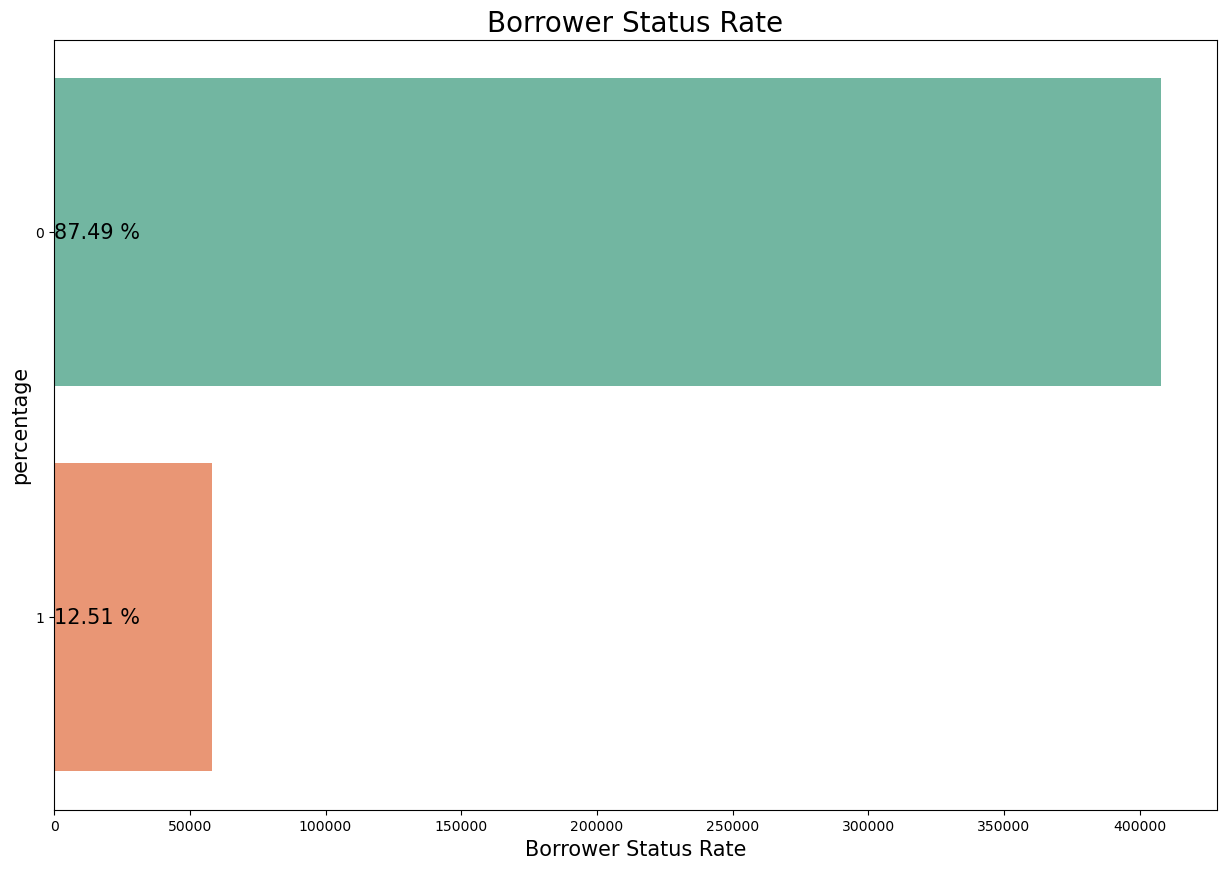

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(y = df_loan['target'], palette='Set2', order =df_loan['target'].value_counts().index)
plt.title('Borrower Status Rate', fontsize=20)

for i,value in enumerate(df_loan['target'].value_counts(normalize=True).mul(100).round(2)):
    text = f'{value} %'
    plt.text(value, i, text, fontsize=15, ha='left', va='center')

plt.xlabel('Borrower Status Rate', fontsize=15)
plt.ylabel('percentage', fontsize=15)
plt.show()

**Insight :**  
- Good loan status got high percentage with 87.49%. It means that the bank's loan performing is good. It seems that the bank has good risk management and credit assessment.
- Bad loan status got low percentage with 12.51%. It means the bank need to analyzing the characteristic of the borrower, so they could identify early warnings sign, and implement the mitigation from failure of pay loans from customers.

#### Credit Purpose

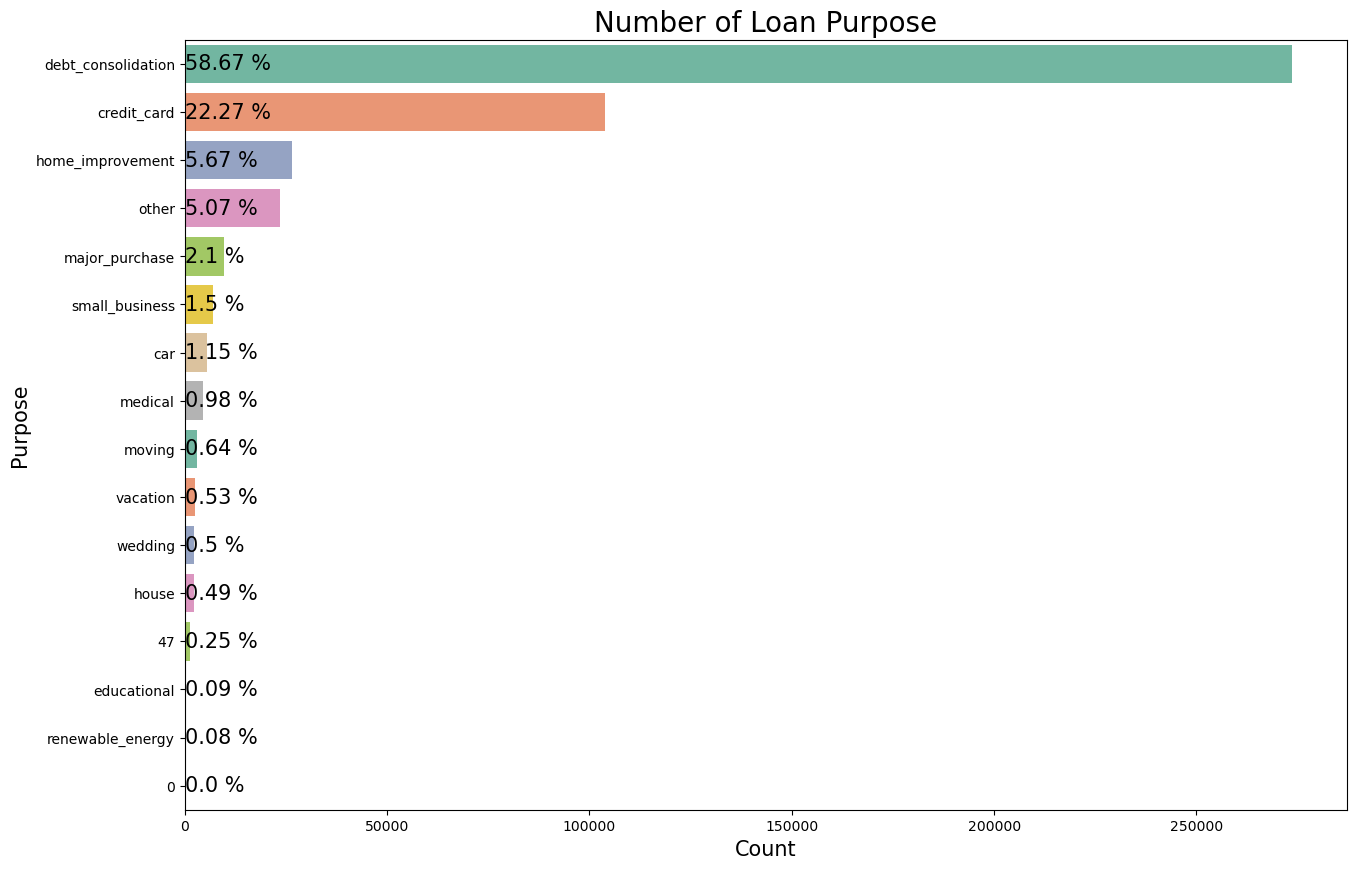

In [ ]:
#plot number of loan purpose
plt.figure(figsize=(15,10))
sns.countplot(y = df_loan['purpose'], palette='Set2', order =df_loan['purpose'].value_counts().index)
plt.title('Number of Loan Purpose', fontsize=20)

for i,value in enumerate(df_loan['purpose'].value_counts(normalize=True).mul(100).round(2)):
    text = f'{value} %'
    plt.text(value, i, text, fontsize=15, ha='left', va='center')

plt.xlabel('Count', fontsize=15)
plt.ylabel('Purpose', fontsize=15)
plt.show()

**Insight :**  
- Debt consolidation got the highest percentage for load purpose with 58.67%. Debt consolidation is preferred because the customer can taking out a single loan or credit card to pay off multiple debts. The benefits of debt consolidation include a potentially lower interest rate and lower monthly payments.
- Credit card got high percentage too with 22.27%. Credit card is preferred because it is typically offer all kinds of perks and benefits, including a one-time signing bonus for a new cardholder, cash back for purchases, rewards points, and frequent-flyer miles. Credit cards provide a level of safety for the user that a debit card and cash can't: fraud protection.
- Home improvement got 5.67% for loan purpose. Home improvement is preferred because the borrower could get funds faster. Applying for a personal loan is generally a seamless process that can be completed online in minutes. Many online lenders also offer same or next-day funding, which means the borrower can get started on home improvements immediately. Also the fixed interest rate on a personal loan also means the monthly payment will stay the same, making it easier to work into spending plan each month over the life of the loan.

#### Grade

In [ ]:
df_loan['grade'].value_counts()

B     136548
C     124985
D      76726
A      74631
E      35684
F      13212
G       3318
47      1169
0         12
Name: grade, dtype: int64

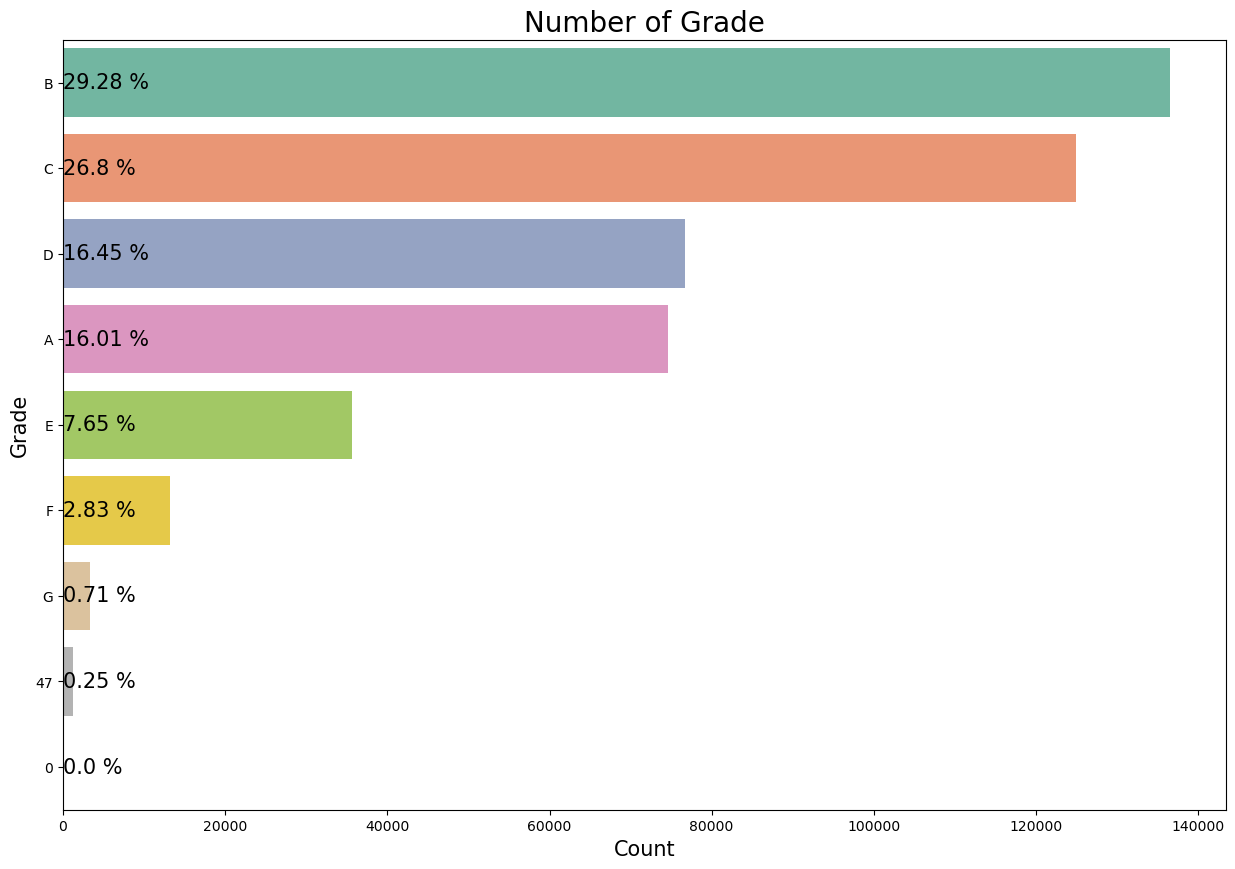

In [ ]:
#plot number of grade
plt.figure(figsize=(15,10))
sns.countplot(y = df_loan['grade'], palette='Set2', order =df_loan['grade'].value_counts().index)
plt.title('Number of Grade', fontsize=20)

for i,value in enumerate(df_loan['grade'].value_counts(normalize=True).mul(100).round(2)):
    text = f'{value} %'
    plt.text(value, i, text, fontsize=15, ha='left', va='center')

plt.xlabel('Count', fontsize=15)
plt.ylabel('Grade', fontsize=15)
plt.show()

**Insight :**  
- Middle grade B and C got the highest percentage with 29.28% and 26.8%. It means that quality score to a loan based on a borrower's credit history, quality of the collateral, and the likelihood of repayment of the principal and interest are considered moderate.
- Grade D with 16.45%. It means that the number of borrower that doesn't have good likelihood of repayment history is quite high.
- Grade A with 16.01%. It means that quality score to a loan based on a borrower's credit history are considered high. It could lead with low risk of load failure.
- Grade E,F,G got the lowest percentage. Grade E,F,G are high risk grade, because because the likelihood that the borrower will repay the loan is low. So the loan company need to tighten the criteria for loan borrowers.

#### Loan Term

In [ ]:
df_loan['term'].value_counts()

36    337075
60    128029
Name: term, dtype: int64

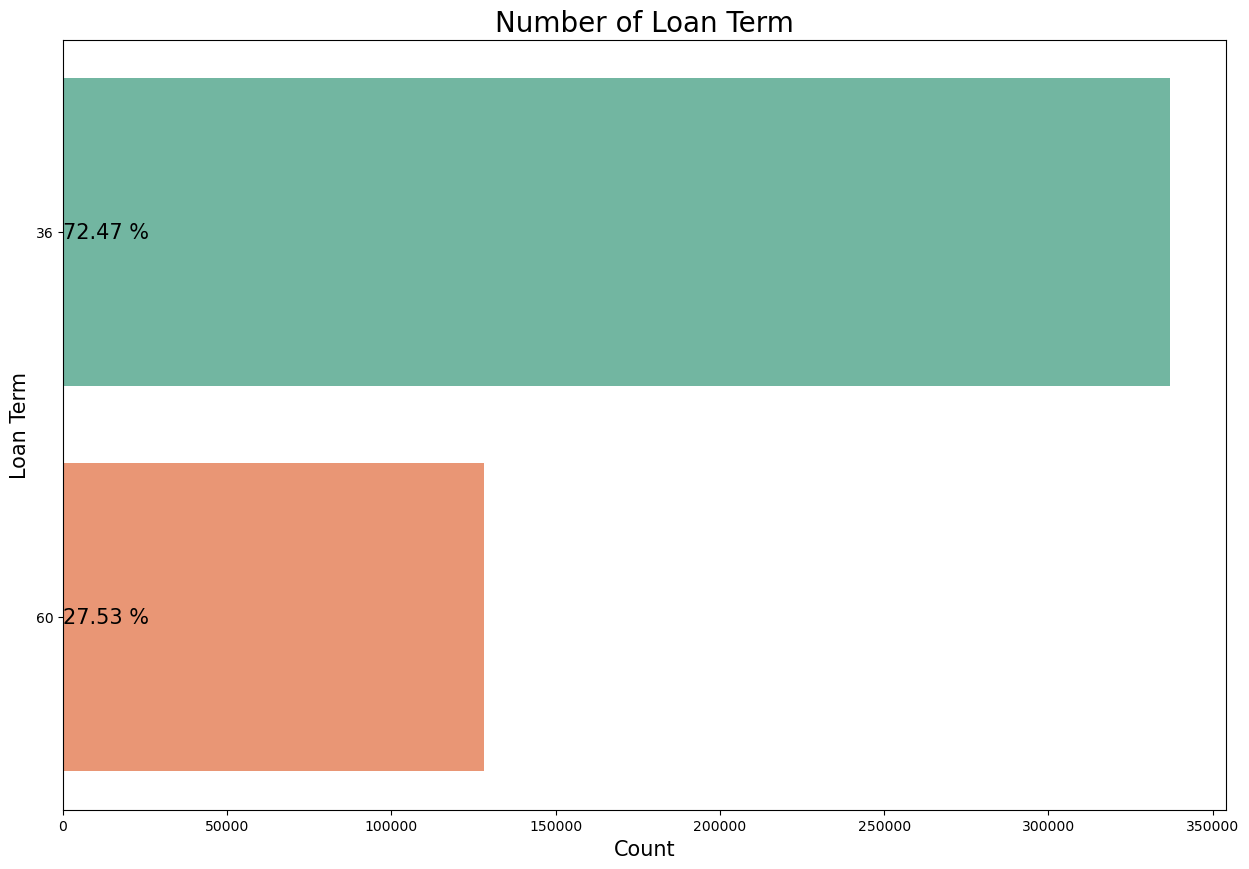

In [ ]:
#plot number of loan term
plt.figure(figsize=(15,10))
sns.countplot(y = df_loan['term'], palette='Set2', order =df_loan['term'].value_counts().index)
plt.title('Number of Loan Term', fontsize=20)

for i,value in enumerate(df_loan['term'].value_counts(normalize=True).mul(100).round(2)):
    text = f'{value} %'
    plt.text(value, i, text, fontsize=15, ha='left', va='center')

plt.xlabel('Count', fontsize=15)
plt.ylabel('Loan Term', fontsize=15)
plt.show()

**Insight :**  
36 month of loan term got the highest percentage with 72.47%. It means that short term loan are preferred by borrowers rather than long term loan. The reason could be because :  
- Compared to long term loans, the amount of interest paid is significantly less.
- These loans are considered less risky compared to long term loans because of a shorter maturity date.
- Short term loans are the lifesavers of smaller businesses or individuals who suffer from less than stellar credit scores.

#### Home Ownership

In [ ]:
df_loan['home_ownership'].value_counts()

MORTGAGE    235209
RENT        188145
OWN          41518
47            1169
OTHER          181
NONE            50
0               12
ANY              1
Name: home_ownership, dtype: int64

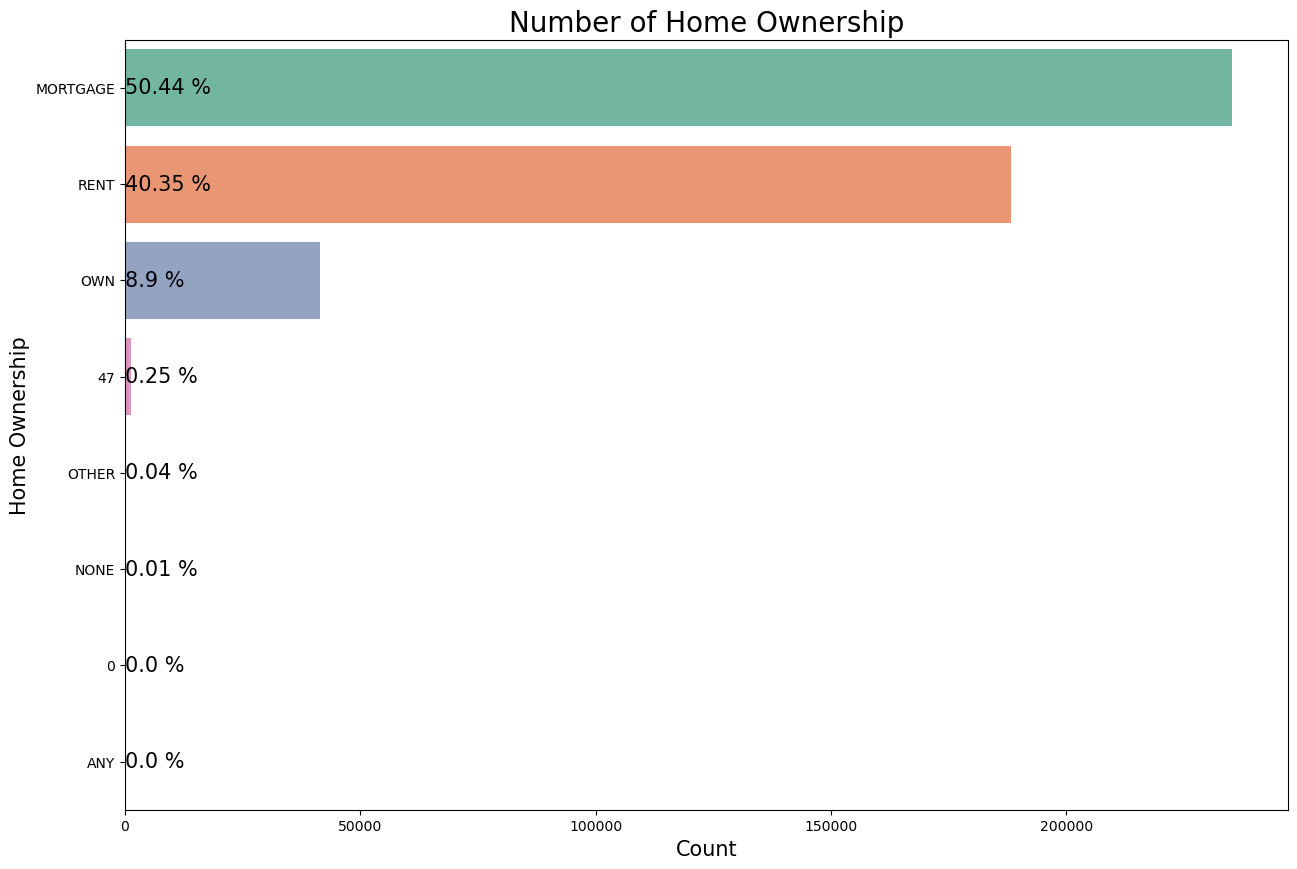

In [ ]:
#plot number of home ownership
plt.figure(figsize=(15,10))
sns.countplot(y = df_loan['home_ownership'], palette='Set2', order =df_loan['home_ownership'].value_counts().index)
plt.title('Number of Home Ownership', fontsize=20)

for i,value in enumerate(df_loan['home_ownership'].value_counts(normalize=True).mul(100).round(2)):
    text = f'{value} %'
    plt.text(value, i, text, fontsize=15, ha='left', va='center')

plt.xlabel('Count', fontsize=15)
plt.ylabel('Home Ownership', fontsize=15)
plt.show()

**Insight :**  
- The borrower that has mortgage got the highest percentage on home ownership with 50.44%. The reason that mortgage customer is so many because a mortgage allows the customer to purchase a home without paying the full purchase price in cash. And for many people taking out a mortgage loan makes a property affordable because it would take too long to save up.  
- The second highest is the borrower that rent their houses with 40.35%. The reason that customer choose rent rather than buying house is because no maintenance costs or repair bills, access to amenities like pool or fitness centre, no real estate taxes, and more flexibility as to where to live.
- The borrower that own their houses is 8.9%. Only small portions for the customer that fully paid off their properties or acquired them without mortgage.

### Bivariate Analysis

#### Borrower Status Rate by Grade

In [ ]:
#create cross tabulation of grade and target
grade_crosstab = pd.crosstab(df_loan['grade'],df_loan['target'], normalize='index').sort_values(by=1).round(2)
grade_crosstab

target     0     1
grade             
A       0.96  0.04
B       0.91  0.09
C       0.87  0.13
D       0.83  0.17
E       0.78  0.22
F       0.73  0.27
G       0.66  0.34
0       0.00  1.00
47      0.00  1.00

Text(0, 0.5, 'Percentage')

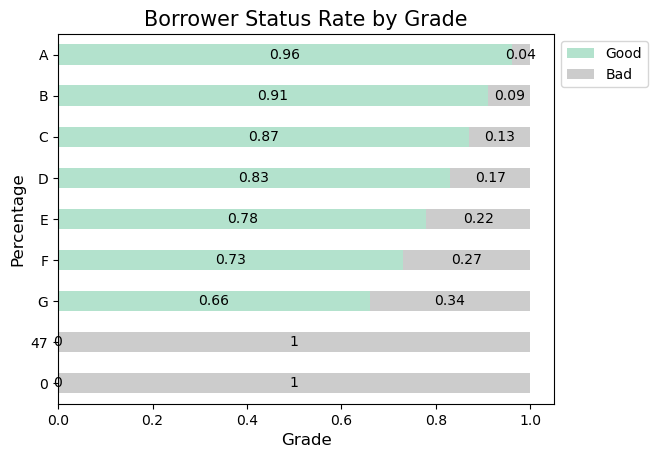

In [ ]:
#bar plot for grade and target
grade_bar = grade_crosstab.sort_values(by=1, ascending=False).plot(kind='barh', stacked=True, rot=0, colormap ='Pastel2')
grade_bar.legend(['Good', 'Bad'], bbox_to_anchor=(1,1), loc='upper left')

#add annotation
for i in grade_bar.containers:
    grade_bar.bar_label(i, label_type='center')

#set title and x,y axis label
plt.title('Borrower Status Rate by Grade', size=15)
plt.xlabel('Grade', size=12)
plt.ylabel('Percentage', size=12)

**Insight :**  
- Grade A has the most of good borrowers with 96%, and has the least of bad borrowers with only 4%.So Grade A has the least probability of loan default.
- Grade G has the least of good borrowers with 66%, and has the most of bad borrowers with 34%. So Grade G has the most probability of loan default.
- The lower the quality of a grade, the higher the number of bad borrowers, which will lead to a higher possibility of loan default.

#### Borrower Status Rate by Last Credit Pull Year

*) Notes :   
Credit pull happens when borowers officially apply for credit, such as by filling out a credit card application. The last credit pull date shows if the borrower has recently applied for other loans or credit cards.

In [ ]:
#display needed column
df_loan[['earliest_cr_line','last_credit_pull_d','last_pymnt_d','issue_d','next_pymnt_d','target']].head(2)

earliest_cr_line   last_credit_pull_d         last_pymnt_d  \
0  1985-01-01 00:00:00  2016-01-01 00:00:00  2015-01-01 00:00:00   
1  1999-04-01 00:00:00  2013-09-01 00:00:00  2013-04-01 00:00:00   

               issue_d         next_pymnt_d  target  
0  2011-12-01 00:00:00  2016-02-01 00:00:00       0  
1  2011-12-01 00:00:00  2016-02-01 00:00:00       1

In [ ]:
#convert to datetime
df_loan['last_credit_pull_d'] = pd.to_datetime(df_loan['last_credit_pull_d'], errors='coerce')

In [ ]:
#extract year from 'last_credit_pull_d'
df_loan['last_credit_pull_d_year'] = df_loan['last_credit_pull_d'].dt.year

In [ ]:
#check whether year already being extracted
df_loan['last_credit_pull_d_year'].head(2)

0    2016.0
1    2013.0
Name: last_credit_pull_d_year, dtype: float64

In [ ]:
#create cross tabulation for last_credit_pull_d_year and target
pull_d_year_ct = pd.crosstab(df_loan['last_credit_pull_d_year'],df_loan['target'])
pull_d_year_sum = pull_d_year_ct.sum(axis=1).astype(float)
pull_d_year_rate = pull_d_year_ct.div(pull_d_year_sum, axis=0)
pull_d_year_rate.index = np.arange(2007,2017)

In [ ]:
#create percentage of good and bad borrowers each year
good = pull_d_year_rate[0]
bad = pull_d_year_rate[1]

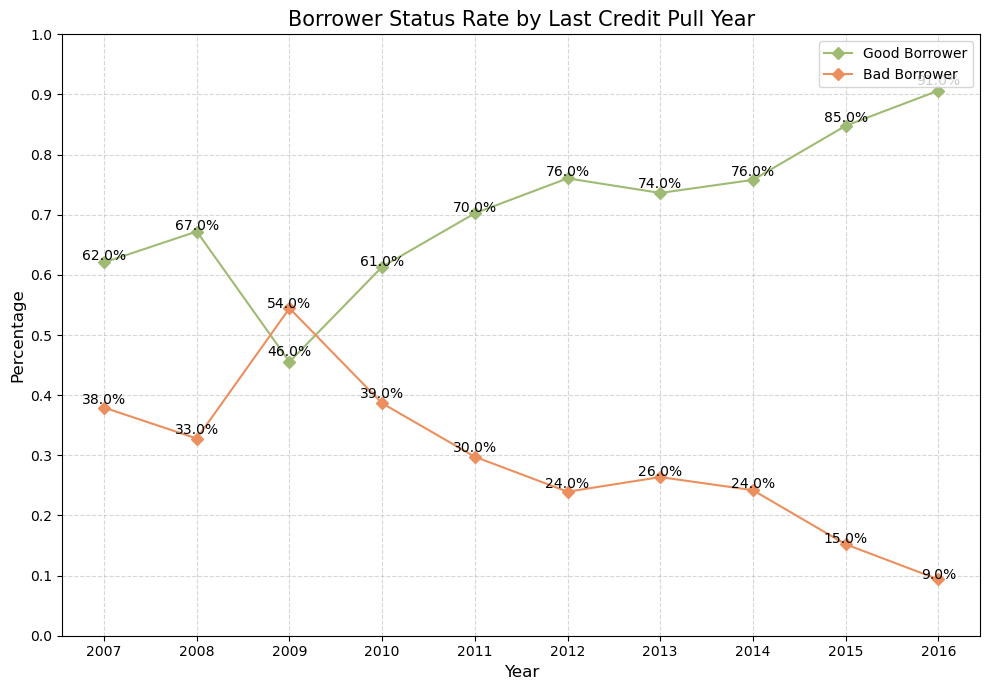

In [ ]:
#plot borrower's status rate
plt.figure(figsize=(10,7))
plt.plot(pull_d_year_rate.index, good, marker='D',linestyle ='-', color='#9FBB73' ,label = 'Good Borrower')
plt.plot(pull_d_year_rate.index, bad, marker='D',linestyle ='-', color='#EC8F5E' ,label = 'Bad Borrower')

#create percentage labels
for x,y in zip(pull_d_year_rate.index, good.round(2)):
    plt.text(x,y,f'{y*100}%', ha='center', va='bottom', color='black' )

for x,y in zip(pull_d_year_rate.index, bad.round(2)):
    plt.text(x,y,f'{y*100}%', ha='center', va='bottom', color='black')

#set tick labels
plt.xticks(np.arange(2007,2017,1))
plt.yticks(np.arange(0,1.1,0.1))

#set grid lines
plt.grid(True, linestyle='--', alpha=0.5)

#set title and x,y axis label
plt.title('Borrower Status Rate by Last Credit Pull Year', size=15)
plt.xlabel('Year', size=12)
plt.ylabel('Percentage', size=12)

#add legend
plt.legend()

#adjust plot margins so labels wont being cut off
plt.tight_layout()

plt.show()

**Insight :**  
- From 2007 to 2008, there was a slight increase 4% in the number of good borrowers. But from 2008 to 2009, there was a quite drastic decrease of 13%.
- The upward trend for good borrower started from 2009 to 2016.This means that many borrowers pay their loans on time, and the credit selection for borrowers by loan companies is quite strict.
- From 2007 to 2008, there was a slight decrease 5% in the number of bad borrowers. But from 2008 to 2009, there was a quite drastic increase of 21%.
- The downward trend for bad borrower started from 2009 to 2016.This would be good signal for lenders company.

#### Borrower Status Rate by Last Payment Date

*) Last payment date is date of last payment received. The last payment date shows if the borrower is having difficulty making payments.

In [ ]:
#convert to datetime
df_loan['last_pymnt_d'] = pd.to_datetime(df_loan['last_pymnt_d'], errors='coerce')

In [ ]:
#extract year from 'last_pymnt_d'
df_loan['last_pymnt_d_year'] = df_loan['last_pymnt_d'].dt.year

In [ ]:
#create cross tabulation for last_pymnt_d and target
last_pymnt_d_year_ct = pd.crosstab(df_loan['last_pymnt_d_year'],df_loan['target'])
last_pymnt_d_year_sum = last_pymnt_d_year_ct.sum(axis=1).astype(float)
last_pymnt_d_year_rate = last_pymnt_d_year_ct.div(last_pymnt_d_year_sum, axis=0)
last_pymnt_d_year_rate.index = np.arange(2007,2017)

In [ ]:
#create percentage of good and bad borrowers each year
goods = last_pymnt_d_year_rate[0]
bads = last_pymnt_d_year_rate[1]

In [ ]:
#good and bad borrowers from 2008 to 2016
goods_1 = goods[1:]
bads_1 = bads[1:]

In [ ]:
#create range year from 2008 to 2016
range_year = last_pymnt_d_year_rate.index[1:]
range_year

Int64Index([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], dtype='int64')

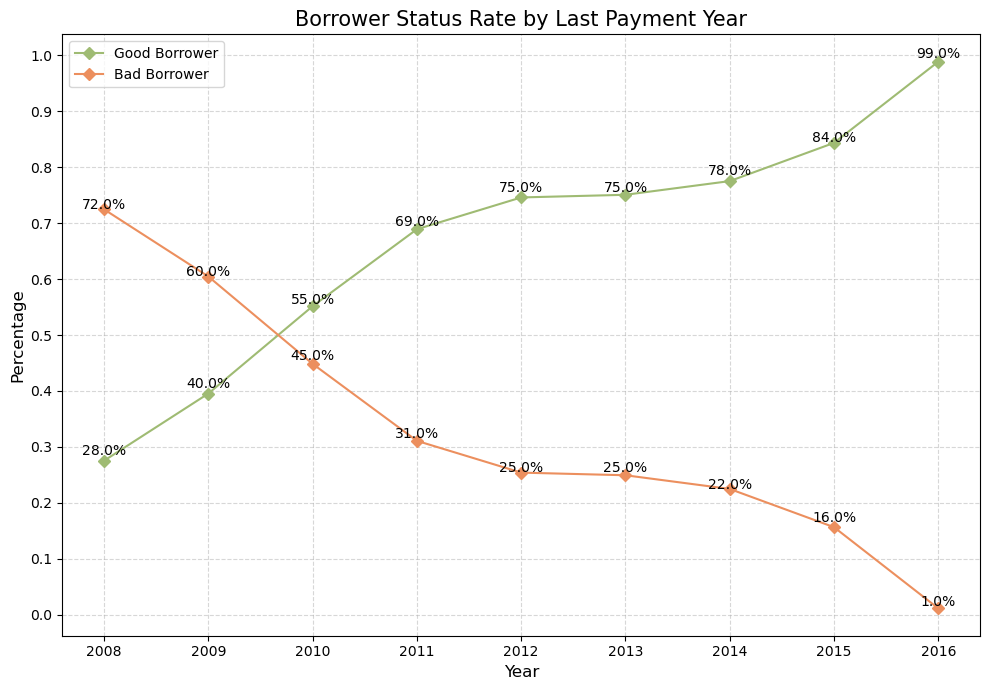

In [ ]:
#plot borrower's status rate
plt.figure(figsize=(10,7))
plt.plot(range_year, goods_1, marker='D',linestyle ='-', color='#9FBB73' ,label = 'Good Borrower')
plt.plot(range_year, bads_1, marker='D',linestyle ='-', color='#EC8F5E' ,label = 'Bad Borrower')

#create percentage labels
for x,y in zip(range_year, goods_1.round(2)):
    plt.text(x,y,f'{y:.1%}', ha='center', va='bottom', color='black' )

for x,y in zip(range_year, bads_1.round(2)):
    plt.text(x,y,f'{y:.1%}', ha='center', va='bottom', color='black')

#set tick labels
plt.xticks(np.arange(2008,2017,1))
plt.yticks(np.arange(0,1.1,0.1))

#set grid lines
plt.grid(True, linestyle='--', alpha=0.5)

#set title and x,y axis label
plt.title('Borrower Status Rate by Last Payment Year', size=15)
plt.xlabel('Year', size=12)
plt.ylabel('Percentage', size=12)

#add legend
plt.legend()

#adjust plot margins so labels wont being cut off
plt.tight_layout()

plt.show()

**Insight :**  
- There is upward trend for good borrower by last payment year from 2008 to 2016. It means that the percentage of customers who have no difficulty in paying is getting higher. And this is good for the sustainability of the loan company's revenue.
- There is downward trend for bad borrower by last payment year from 2008 to 2016. It means that the company's performance is very good in selecting loan applications by borrowers.
- The difference percentage between good and bad borrowers for 2016 is really signicant with 98%. It means that the management could implement the stategy and policy in borrower eligibility and risk assessment.

#### Borrower's Status Interest Rate

In [ ]:
#create new dataframe
data_kde = df_loan[['last_pymnt_d_year', 'int_rate', 'target']]
data_kde.head(2)

last_pymnt_d_year  int_rate  target
0             2015.0     10.65       0
1             2013.0     15.27       1

In [ ]:
#select data from 2008 - 2016
kde_1 = data_kde[data_kde['last_pymnt_d_year']>2007].sort_values('last_pymnt_d_year', ascending = True)
kde_1.head(2)

last_pymnt_d_year  int_rate  target
39219             2008.0      9.45       0
41558             2008.0     11.97       1

In [ ]:
#average interest rate
int_avg = round(df_loan['int_rate'].mean(),2)

#average interest rate of good borrower
kde_good = kde_1[kde_1['target']==0]
int_good = round(kde_good['int_rate'].mean(),2)

#average interest rate of bad borrower
kde_bad = kde_1[kde_1['target']==1].sort_values('last_pymnt_d_year', ascending = True)
int_bad = round(kde_bad['int_rate'].mean(),2)

print(f'average interest rate: {int_avg}')
print(f'average good borrower int rate: {int_good}')
print(f'average bad borrower int rate: {int_bad}')

average interest rate: 13.91
average good borrower int rate: 13.54
average bad borrower int rate: 15.9


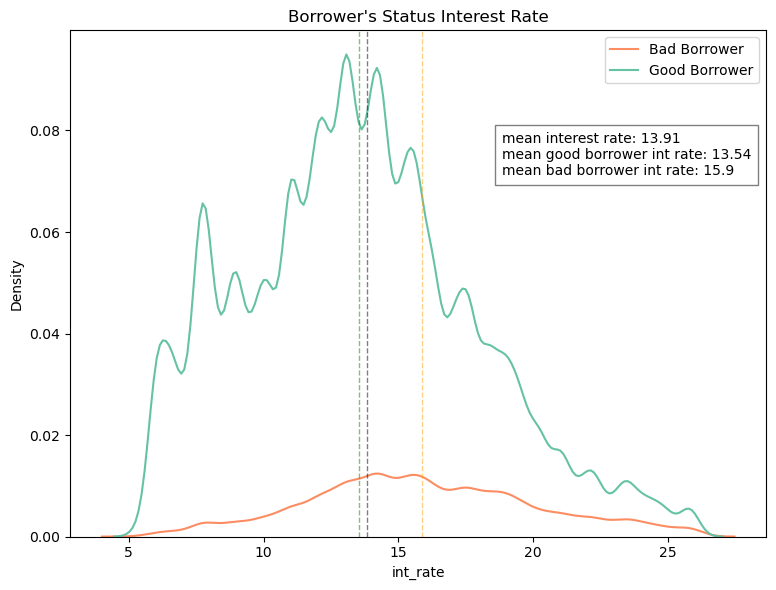

In [ ]:
#plot borrower's status rate
plt.figure(figsize=(8,6))

#create Kernel Density Estimation
sns.kdeplot(data = kde_1, x='int_rate', hue='target', palette='Set2')

#add vertical line at the average of int_rate
plt.axvline(kde_1['int_rate'].mean(), color = 'black', linestyle ='dashed', linewidth = 1, alpha=0.5)
plt.axvline(int_good, color = 'green', linestyle ='dashed', linewidth = 1, alpha=0.5)
plt.axvline(int_bad, color = 'orange', linestyle ='dashed', linewidth = 1, alpha=0.5)

#set the title
plt.title("Borrower's Status Interest Rate")

#set the legend
plt.legend(['Bad Borrower', 'Good Borrower'])

#create percentage labels
plt.text(0.62, 0.8, f"mean interest rate: {int_avg}\n"
         f"mean good borrower int rate: {int_good}\n"
         f"mean bad borrower int rate: {int_bad}"
         , bbox=dict(facecolor='w', alpha=0.5, pad=5),
        transform=plt.gca().transAxes, ha="left", va="top")


plt.tight_layout()
plt.show()

Based on creditninja.com(2023), the loan interest rate obtained by the borrower depends on the credit score and loan term. A good credit score makes it possible to access lower interest rates when applying for a personal loan. Credit scores depend on the borrower's creditworthiness and financial stability as well as that of the lender. The average interest rate on personal loans for borrowers with excellent credit is between 10% and 12.5%. For a good credit score, the average rate is 13% – 16%. The lower the borrower's credit score, the higher the interest rate will be to offset the increased risk the lender assumes.

**Insight :**  
- The average interest rate for all borrowers is 13.91%.
- The average interest rate for good borrowers is 13.54%.
- The average interest rate for bad borrowers is 15.9%.
- The average loan interest rate for all borrowers at ID/X Partners is still relatively good because it is in the range of 13% – 16%. The reason why the average interest rate for bad borrowers is higher than for good borrowers is because the lower the borrower's credit score is, the higher the interest rates become to compensate for the increased risk the lender takes on.

In [ ]:
#function for automation
#create function for kde plot
def kda_chart(data, x, hue, palette, good, bad, title, size_x, size_y, text_all, value_all, text_good, value_good, text_bad, value_bad):
    #plot borrower's status rate
    plt.figure(figsize=(8,6))

    #create Kernel Density Estimation
    sns.kdeplot(data = data, x=x, hue=hue, palette=palette)

    #add vertical line at the average of int_rate
    plt.axvline(data[x].mean(), color = 'black', linestyle ='dashed', linewidth = 1, alpha=0.5)
    plt.axvline(good, color = 'green', linestyle ='dashed', linewidth = 1, alpha=0.5)
    plt.axvline(bad, color = 'orange', linestyle ='dashed', linewidth = 1, alpha=0.5)


    #create percentage labels
    plt.text(size_x, size_y, f"{text_all}: {value_all}\n"
         f"{text_good}: {value_good}\n"
         f"{text_bad}: {value_bad}"
         , bbox=dict(facecolor='w', alpha=0.5, pad=5),
        transform=plt.gca().transAxes, ha="left", va="top")

    #set the title
    plt.title(title)

    #set the legend
    plt.legend(['Bad Borrower', 'Good Borrower'])

    plt.tight_layout()
    plt.show()

#### Borrower's Total Account

*) Notes :  
total_acc = The total number of credit lines currently in the borrower's credit file

In [ ]:
#create new dataframe
data_acc = df_loan[['last_pymnt_d_year', 'total_acc', 'target']]
data_acc.head()

last_pymnt_d_year  total_acc  target
0             2015.0        9.0       0
1             2013.0        4.0       1
2             2014.0       10.0       0
3             2015.0       37.0       0
4             2016.0       38.0       0

In [ ]:
#average total account
acc_avg = round(data_acc['total_acc'].mean(),0)

#average total account of good borrower
data_acc_good = data_acc[data_acc['target']==0]
acc_good = round(data_acc_good['total_acc'].mean(),0)

#average total account of bad borrower
data_acc_bad = data_acc[data_acc['target']==1].sort_values('last_pymnt_d_year', ascending = True)
acc_bad = round(data_acc_bad['total_acc'].mean(),0)

print(f'average total account: {acc_avg}')
print(f'average good borrower total account: {acc_good}')
print(f'average bad borrower total account: {acc_bad}')

average total account: 25.0
average good borrower total account: 25.0
average bad borrower total account: 25.0


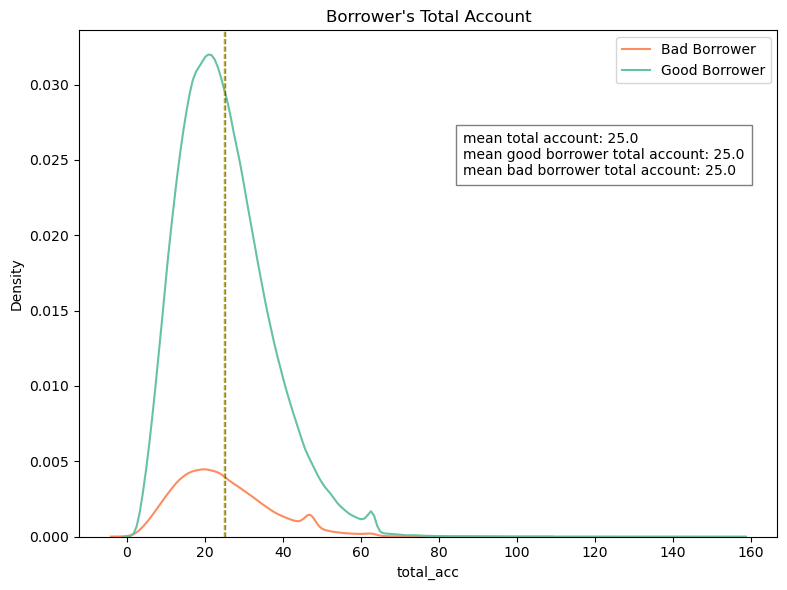

In [ ]:
#plot borrower's total account
kda_chart(data = data_acc, x ='total_acc',hue ='target', palette='Set2', size_x =0.55, size_y = 0.8,good=acc_good, bad=acc_bad,
          title="Borrower's Total Account",text_all= 'mean total account', value_all=acc_avg,
          text_good = 'mean good borrower total account', value_good=acc_good,
          text_bad ='mean bad borrower total account', value_bad=acc_bad)

**Insight :**  
- A line of credit (LOC) is a preset borrowing limit that can be tapped into at any time. The borrower can take money out as needed until the limit is reached. According to (nerdwallet.com, 2023) suggests that 5 or more accounts — which can be a mix of cards and loans — is a reasonable number to build toward over time.
- From the plot, average total account of good and bad borrower is 25 account, which is a lot more than recommended.  
- Having too many open credit lines, even if borrower's not using them, can hurt their credit score by making the borrower's look more risky to lenders.  
- Having multiple active accounts also makes it more challenging to control spending and keep track of payment due dates.  

#### Borrower's Total Payment

*) Notes :  
total_pymnt = Payments received to date for total amount funded

In [ ]:
#create new dataframe
data_pymnt = df_loan[['last_pymnt_d_year', 'total_pymnt', 'target']]
data_pymnt.head()

last_pymnt_d_year   total_pymnt  target
0             2015.0   5861.071414       0
1             2013.0   1008.710000       1
2             2014.0   3003.653644       0
3             2015.0  12226.302210       0
4             2016.0   3242.170000       0

In [ ]:
#average data payment
pymnt_avg = round(data_pymnt['total_pymnt'].mean(),2)

#average total payment of good borrower
data_pymnt_good = data_pymnt[data_pymnt['target']==0]
pymnt_good = round(data_pymnt_good['total_pymnt'].mean(),2)

#average total account of bad borrower
data_pymnt_bad = data_pymnt[data_pymnt['target']==1].sort_values('last_pymnt_d_year', ascending = True)
pymnt_bad = round(data_pymnt_bad['total_pymnt'].mean(),2)

print(f'average total payment: {pymnt_avg}')
print(f'average good borrower total payment: {pymnt_good}')
print(f'average bad borrower total payment: {pymnt_bad}')

average total payment: 11512.39
average good borrower total payment: 12129.48
average bad borrower total payment: 7196.43


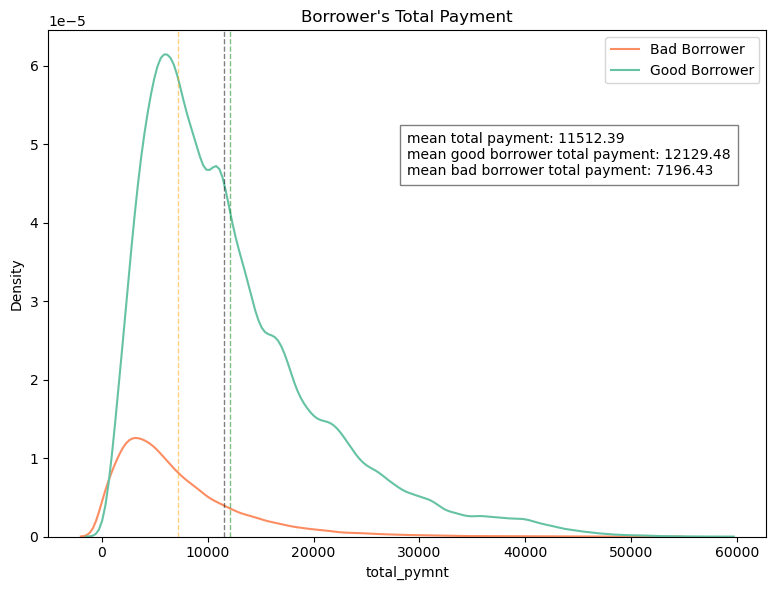

In [ ]:
#plot borrower's total payment
kda_chart(data = data_pymnt, x ='total_pymnt',hue ='target', palette='Set2', size_x =0.5, size_y = 0.8,good=pymnt_good,
          bad=pymnt_bad,
          title="Borrower's Total Payment",text_all= 'mean total payment', value_all=pymnt_avg,
          text_good = 'mean good borrower total payment', value_good=pymnt_good,
          text_bad ='mean bad borrower total payment', value_bad=pymnt_bad)

**Insight :**  
- Total payment is Payments received to date for total amount funded. Amount financed is the actual amount of approved credit extended to a borrower in a loan from a lender, and if accepted, requires repayment by the borrower.
- The average total amount funded for all customers is 11,512.
- The average total amount funded for good borrowers is 12,129.
- The average total amount funded for bad borrowers is 7,196.
- Based on (investopedia.com, 2023), The average personal loan amount in America was 11,548 dollar in the second quarter of 2023 with average interest rate in Q2 is 11.48%.
- The average total amount funded in ID/X Partner is relevant with the average personal loan amount in America.

## Feature Engineering with Weight of Evidence (WOE) and Information Value (IV)

**Weight of evidence (WOE)** and **information value (IV)** evolved from the same logistic regression technique. **Logistic regression** is a process of modeling the probability of a discrete outcome given an input variable. The most common logistic regression models a binary outcome; something that can take two values such as true/false, yes/no, and so on. WOE and IV have been used as a benchmark to screen variables in the credit risk modeling projects such as probability of default

**Weight of evidence (WOE)** generally described as a measure of the separation of good and bad customers. "Bad Customers" refers to the customers who defaulted on a loan. and "Good Customers" refers to the customers who paid back loan.  
<img src="./image_IDX/woe.png" alt="woe" width = "250"/>    
- Distribution of Goods - % of Good Customers in a particular group
- Distribution of Bads - % of Bad Customers in a particular group
- ln - Natural Log  

1. Positive WOE means Distribution of Goods > Distribution of Bads
2. Negative WOE means Distribution of Goods < Distribution of Bads  
Notes : Log of a number > 1 means positive value. If less than 1, it means negative value.

**Information value (IV)** is one of the most useful technique to select important variables in a predictive model. It helps to rank variables on the basis of their importance.  
<img src="./image_IDX/iv.png" alt="iv" width = "300"/>   
<img src="./image_IDX/rule_iv.png" alt="rule" width = "300"/>

In [ ]:
#copy dataframe
df_fe = df_loan.copy()

In [ ]:
#create cross tabulation probability of good and bad borrowers
grade_crosstab2 = pd.crosstab(df_fe['grade'], df_fe['target'], normalize='index').sort_values(by=1).round(2)
grade_crosstab2_reset = grade_crosstab2.reset_index()
grade_crosstab2_reset.columns = ['grade','good','bad']
grade_crosstab2_reset

grade  good   bad
0     A  0.96  0.04
1     B  0.91  0.09
2     C  0.87  0.13
3     D  0.83  0.17
4     E  0.78  0.22
5     F  0.73  0.27
6     G  0.66  0.34
7     0  0.00  1.00
8    47  0.00  1.00

In [ ]:
#convert grade to string
df_fe['grade'] =  df_fe['grade'].astype(str)

In [ ]:
#delete row 0 and 47 in grade:
df_fe_new = df_fe[~(df_fe['grade'].isin(['0','47']))]

In [ ]:
#Weight of Evidence & Information Value
def woe(df,feature_name):
    feature =df.groupby(feature_name).agg(num_observation = ('target','count'), bad_loan_prob = ('target','mean'))
    feature['good_loan_prob'] = 1 - feature['bad_loan_prob']
    feature['grade_proportion'] = feature['num_observation']/feature['num_observation'].sum()
    feature['num_good_loan'] = feature['grade_proportion'] * feature['num_observation']
    feature['num_bad_loan'] = (1-feature['grade_proportion']) * feature['num_observation']

    #distribution of good
    feature['good_loan_prop'] = feature['num_good_loan']/feature['num_good_loan'].sum()

    #distribution of bad
    feature['bad_loan_prop'] = feature['num_bad_loan']/feature['num_bad_loan'].sum()

    #Weight of evidence (WOE)
    feature['weight of evidence'] = np.log(feature['good_loan_prop']/feature['bad_loan_prop'])

    #Information Value (IV)
    feature['information_value'] = (feature['good_loan_prop'] - feature['bad_loan_prop'])*feature['weight of evidence']
    feature['information_value'] = feature['information_value'].sum()

    #sort data
    feature = feature.sort_values('weight of evidence').reset_index()

    #display needed column
    feature_display = feature[[feature_name,'num_observation','good_loan_prob', 'good_loan_prop', 'bad_loan_prop', 'weight of evidence','information_value']]

    return feature_display

### WOE & IV Categorical Feature

#### WOE & IV : `Grade`

In [ ]:
woe(df_fe_new,'grade')

grade  num_observation  good_loan_prob  good_loan_prop  bad_loan_prop  \
0     G             3318        0.664858        0.000233       0.009059   
1     F            13212        0.727445        0.003700       0.035299   
2     E            35684        0.777603        0.026988       0.090596   
3     A            74631        0.957042        0.118048       0.172292   
4     D            76726        0.826682        0.124769       0.176178   
5     C           124985        0.871313        0.331084       0.251330   
6     B           136548        0.912771        0.395178       0.265246   

   weight of evidence  information_value  
0           -3.659032           0.292627  
1           -2.255610           0.292627  
2           -1.211025           0.292627  
3           -0.378095           0.292627  
4           -0.345031           0.292627  
5            0.275606           0.292627  
6            0.398677           0.292627

**Insight :**   
*'grade'* is Medium predictive Power (IV in range 0.1 to 0.3)

#### WOE & IV : `emp_length`

In [ ]:
woe(df_fe_new,'emp_length')

emp_length  num_observation  good_loan_prob  good_loan_prop  bad_loan_prop  \
0     9 years            17868        0.873237        0.008372       0.044848   
1     8 years            22369        0.877062        0.013121       0.055580   
2     6 years            26067        0.869298        0.017818       0.064227   
3     7 years            26143        0.876564        0.017922       0.064403   
4     4 years            27982        0.876421        0.020532       0.068645   
5      1 year            29588        0.870150        0.022956       0.072318   
6     5 years            30727        0.872165        0.024758       0.074905   
7    < 1 year            36210        0.861723        0.034382       0.087157   
8     3 years            36548        0.874658        0.035026       0.087902   
9     2 years            41319        0.874319        0.044768       0.098270   
10  10+ years           170283        0.885543        0.760346       0.281745   

    weight of evidence  information_value  
0            -1.678396           1.026661  
1            -1.443617           1.026661  
2            -1.282235           1.026661  
3            -1.279150           1.026661  
4            -1.206972           1.026661  
5            -1.147484           1.026661  
6            -1.107092           1.026661  
7            -0.930196           1.026661  
8            -0.920116           1.026661  
9            -0.786225           1.026661  
10            0.992772           1.026661

**Insight :**   
*'emp_length'* is Suspicious Predictive Power (IV > 0.5)

#### WOE & IV : `home_ownership`

In [ ]:
woe(df_fe_new,'home_ownership')

home_ownership  num_observation  good_loan_prob  good_loan_prop  \
0            ANY                1        1.000000    1.081717e-11   
1           NONE               50        0.760000    2.704293e-08   
2          OTHER              181        0.640884    3.543814e-07   
3            OWN            41518        0.878149    1.864604e-02   
4           RENT           188145        0.859273    3.829121e-01   
5       MORTGAGE           235209        0.891437    5.984414e-01   

   bad_loan_prop  weight of evidence  information_value  
0       0.000004          -12.757352           0.311818  
1       0.000188           -8.845224           0.311818  
2       0.000679           -7.558468           0.311818  
3       0.141968           -2.029968           0.311818  
4       0.420650           -0.093995           0.311818  
5       0.436512            0.315514           0.311818

**Insight :**   
*'home_ownership'* is Strong predictive Power (IV in range 0.3 to 0.5)

#### WOE & IV : `verification_status`

In [ ]:
woe(df_fe_new,'verification_status')

verification_status  num_observation  good_loan_prob  good_loan_prop  \
0        Not Verified           148022        0.890070        0.302886   
1     Source Verified           149647        0.883593        0.309572   
2            Verified           167435        0.859910        0.387542   

   bad_loan_prop  weight of evidence  information_value  
0       0.325978           -0.073474           0.007421  
1       0.327868           -0.057418           0.007421  
2       0.346155            0.112939           0.007421

**Insight :**   
*'verification_status'* is Not useful for prediction (IV < 0.02). So it will be dropped.

#### WOE & IV : `purpose`

In [ ]:
woe(df_fe_new,'purpose')

purpose  num_observation  good_loan_prob  good_loan_prop  \
0     renewable_energy              350        0.831429        0.000001   
1          educational              422        0.637441        0.000002   
2                house             2269        0.835610        0.000059   
3              wedding             2343        0.858728        0.000063   
4             vacation             2478        0.866828        0.000070   
5               moving             2986        0.829873        0.000102   
6              medical             4586        0.849978        0.000241   
7                  car             5380        0.897212        0.000332   
8       small_business             6994        0.760795        0.000562   
9       major_purchase             9807        0.885592        0.001104   
10               other            23620        0.840347        0.006405   
11    home_improvement            26458        0.886764        0.008036   
12         credit_card           103826        0.903117        0.123753   
13  debt_consolidation           273585        0.873780        0.859268   

    bad_loan_prop  weight of evidence  information_value  
0        0.001259           -6.797003           1.410245  
1        0.001518           -6.609776           1.410245  
2        0.008127           -4.923704           1.410245  
3        0.008391           -4.891451           1.410245  
4        0.008872           -4.835140           1.410245  
5        0.010679           -4.647558           1.410245  
6        0.016344           -4.215017           1.410245  
7        0.019141           -4.053611           1.410245  
8        0.024796           -3.787730           1.410245  
9        0.034556           -3.443526           1.410245  
10       0.080702           -2.533721           1.410245  
11       0.089818           -2.413807           1.410245  
12       0.290294           -0.852604           1.410245  
13       0.405503            0.750952           1.410245

**Insight :**   
*'purpose'* is Suspicious Predictive Power (IV > 0.5)

#### WOE & IV : `initial_list_status`

In [ ]:
woe(df_fe_new,'initial_list_status')

initial_list_status  num_observation  good_loan_prob  good_loan_prop  \
0                   w           162846        0.899776        0.224967   
1                   f           302258        0.864927        0.775033   

   bad_loan_prop  weight of evidence  information_value  
0            0.5           -0.798654           0.340203  
1            0.5            0.438298           0.340203

**Insight :**   
*'initial_list_status'* is Strong predictive Power (IV in range 0.3 to 0.5)

#### WOE & IV : `term`

In [ ]:
woe(df_fe_new,'term')

term  num_observation  good_loan_prob  good_loan_prop  bad_loan_prop  \
0   60           128029        0.844418        0.126077            0.5   
1   36           337075        0.889553        0.873923            0.5   

   weight of evidence  information_value  
0           -1.377713           0.723951  
1            0.558384           0.723951

**Insight :**   
*'term'* is Suspicious Predictive Power (IV > 0.5)

### WOE & IV Numeric Feature

In [ ]:
#distribution plot
def dist(df_2, feature_name_2) :
    plt.figure(figsize=(2,4))
    sns.violinplot(df_2[feature_name_2], color = 'orange')
    print(f'number of unique value : {df_2[feature_name_2].nunique()}')
    print('Distribution :')
    print(df_2[feature_name_2].describe().T)
    plt.tight_layout()
    plt.show()

#### WOE & IV : `loan_amnt`

number of unique value : 1352
Distribution :
count    465104.000000
mean      14315.736212
std        8284.877562
min         500.000000
25%        8000.000000
50%       12000.000000
75%       20000.000000
max       35000.000000
Name: loan_amnt, dtype: float64


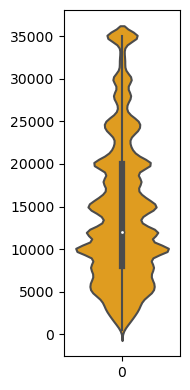

In [ ]:
dist(df_fe_new, 'loan_amnt')

In [ ]:
#segment and sort data values into 10 bins
df_fe_new['loan_amnt_woe'] = pd.cut(x = df_fe_new['loan_amnt'], bins = 10)

#WOE & IV
woe(df_fe_new,'loan_amnt_woe')

loan_amnt_woe  num_observation  good_loan_prob  good_loan_prop  \
0  (28100.0, 31550.0]            13347        0.861917        0.006345   
1  (31550.0, 35000.0]            21442        0.868296        0.016375   
2  (21200.0, 24650.0]            25403        0.874936        0.022983   
3  (24650.0, 28100.0]            26625        0.874178        0.025248   
4     (465.5, 3950.0]            27819        0.873216        0.027563   
5  (17750.0, 21200.0]            58013        0.876838        0.119866   
6  (14300.0, 17750.0]            60618        0.875252        0.130872   
7  (10850.0, 14300.0]            64922        0.882521        0.150117   
8    (3950.0, 7400.0]            75519        0.882255        0.203122   
9   (7400.0, 10850.0]            91396        0.877445        0.297509   

   bad_loan_prop  weight of evidence  information_value  
0       0.032031           -1.619072           0.250129  
1       0.050535           -1.126930           0.250129  
2       0.059336           -0.948446           0.250129  
3       0.062018           -0.898680           0.250129  
4       0.064623           -0.852085           0.250129  
5       0.125457           -0.045588           0.250129  
6       0.130252            0.004756           0.250129  
7       0.138015            0.084048           0.250129  
8       0.156292            0.262083           0.250129  
9       0.181442            0.494508           0.250129

**Insight :**   
*'loan_amnt'* is Medium predictive Power (IV in range 0.1 to 0.3)

#### WOE & IV : `int_rate`

number of unique value : 506
Distribution :
count    465104.000000
mean         13.831313
std           4.357922
min           5.420000
25%          10.990000
50%          13.660000
75%          16.490000
max          26.060000
Name: int_rate, dtype: float64


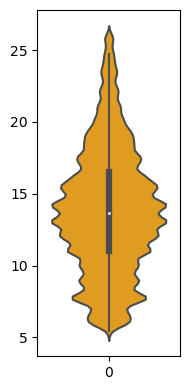

In [ ]:
dist(df_fe_new, 'int_rate')

In [ ]:
#segment and sort data values into 10 bins
df_fe_new['int_rate_woe'] = pd.cut(x = df_fe_new['int_rate'], bins = 10)

#WOE & IV
woe(df_fe_new,'int_rate_woe')

int_rate_woe  num_observation  good_loan_prob  good_loan_prop  \
0   (23.996, 26.06]             8834        0.743038        0.002634   
1  (21.932, 23.996]            14326        0.749756        0.006928   
2  (19.868, 21.932]            19750        0.785316        0.013167   
3    (5.399, 7.484]            27470        0.972006        0.025472   
4  (17.804, 19.868]            37907        0.805445        0.048505   
5    (7.484, 9.548]            56246        0.949685        0.106789   
6   (9.548, 11.612]            58651        0.918075        0.116117   
7   (15.74, 17.804]            60237        0.830636        0.122481   
8   (13.676, 15.74]            87407        0.868489        0.257891   
9  (11.612, 13.676]            94276        0.898415        0.300017   

   bad_loan_prop  weight of evidence  information_value  
0       0.021589           -2.103605           0.273653  
1       0.034590           -1.608027           0.273653  
2       0.047112           -1.274844           0.273653  
3       0.064392           -0.927417           0.273653  
4       0.086738           -0.581238           0.273653  
5       0.123176           -0.142761           0.273653  
6       0.127688           -0.094992           0.273653  
7       0.130629           -0.064400           0.273653  
8       0.176829            0.377355           0.273653  
9       0.187256            0.471360           0.273653

**Insight :**   
*'loan_amnt'* is Medium predictive Power (IV in range 0.1 to 0.3)

#### WOE & IV : `annual_inc`

number of unique value : 31785
Distribution :
count    4.651040e+05
mean     7.326336e+04
std      5.493562e+04
min      1.896000e+03
25%      4.500000e+04
50%      6.300000e+04
75%      8.883600e+04
max      7.500000e+06
Name: annual_inc, dtype: float64


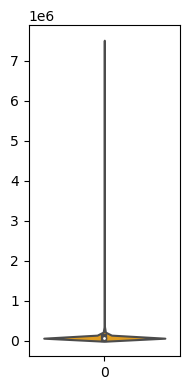

In [ ]:
dist(df_fe_new, 'annual_inc')

In [ ]:
#segment and sort data values into 10 bins
df_fe_new['annual_inc_woe'] = pd.cut(x = df_fe_new['annual_inc'], bins = 10)

#WOE & IV
woe(df_fe_new,'annual_inc_woe')

annual_inc_woe  num_observation  good_loan_prob  good_loan_prop  \
0  (3750948.0, 4500758.4]                1        1.000000    4.625946e-12   
1  (5250568.8, 6000379.2]                1        1.000000    4.625946e-12   
2  (6000379.2, 6750189.6]                1        1.000000    4.625946e-12   
3  (4500758.4, 5250568.8]                3        1.000000    4.163351e-11   
4  (6750189.6, 7500000.0]                3        1.000000    4.163351e-11   
5  (1501516.8, 2251327.2]               10        0.900000    4.625946e-10   
6   (751706.4, 1501516.8]              142        0.915493    9.327757e-08   
7   (-5602.104, 751706.4]           464943        0.877114    9.999999e-01   
8  (2251327.2, 3001137.6]                0             NaN    0.000000e+00   
9  (3001137.6, 3750948.0]                0             NaN    0.000000e+00   

   bad_loan_prop  weight of evidence  information_value  
0       0.003107          -20.325095           8.231897  
1       0.003107          -20.325095           8.231897  
2       0.003107          -20.325095           8.231897  
3       0.009320          -19.226479           8.231897  
4       0.009320          -19.226479           8.231897  
5       0.031065          -18.022491           8.231897  
6       0.440995          -15.368965           8.231897  
7       0.499981            0.693185           8.231897  
8       0.000000                 NaN           8.231897  
9       0.000000                 NaN           8.231897

In [ ]:
#delete annual_inc_woe column
df_fe_new = df_fe_new.drop('annual_inc_woe', axis=1)

In [ ]:
#because the distribution of the number of observations based on bins is not evenly distributed and there is null values,
#3 categories of annual income were created
df_fe_new['annual_inc_woe'] = np.where((df_fe_new['annual_inc']>0) & (df_fe_new['annual_inc']<200000),'Low income',
                                       np.where(df_fe_new['annual_inc']<=1500000, 'Medium income','High Income'))

#WOE & IV
woe(df_fe_new,'annual_inc_woe')

annual_inc_woe  num_observation  good_loan_prob  good_loan_prop  \
0    High Income               19        0.947368    1.736884e-09   
1  Medium income             9281        0.909600    4.144320e-04   
2     Low income           455804        0.876464    9.995856e-01   

   bad_loan_prop  weight of evidence  information_value  
0       0.001042          -13.304811           3.896501  
1       0.498979           -7.093410           3.896501  
2       0.499979            0.692774           3.896501

**Insight :**   
*'annual_inc'* information value is too high, so this variable gonna be dropped.   

#### WOE & IV : `dti`

number of unique value : 3997
Distribution :
count    465104.000000
mean         17.218223
std           7.850370
min           0.000000
25%          11.360000
50%          16.870000
75%          22.780000
max          39.990000
Name: dti, dtype: float64


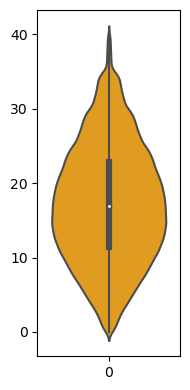

In [ ]:
dist(df_fe_new, 'dti')

In [ ]:
#segment and sort data values into 10 bins
df_fe_new['dti_woe'] = pd.cut(x = df_fe_new['dti'], bins = 10)

#WOE & IV
woe(df_fe_new,'dti_woe')

dti_woe  num_observation  good_loan_prob  good_loan_prop  \
0   (35.991, 39.99]             2745        0.862659        0.000253   
1  (31.992, 35.991]            13619        0.853660        0.006223   
2    (-0.04, 3.999]            16678        0.887397        0.009332   
3  (27.993, 31.992]            30187        0.851857        0.030572   
4    (3.999, 7.998]            42865        0.900292        0.061643   
5  (23.994, 27.993]            49947        0.857189        0.083694   
6   (7.998, 11.997]            69131        0.895271        0.160333   
7  (19.995, 23.994]            70895        0.862261        0.168620   
8  (15.996, 19.995]            83879        0.874927        0.236039   
9  (11.997, 15.996]            85158        0.888149        0.243292   

   bad_loan_prop  weight of evidence  information_value  
0       0.006805           -3.292805           0.215778  
1       0.032967           -1.667321           0.215778  
2       0.040098           -1.457898           0.215778  
3       0.070390           -0.833989           0.215778  
4       0.097040           -0.453761           0.215778  
5       0.111176           -0.283939           0.215778  
6       0.146766            0.088412           0.215778  
7       0.149841            0.118074           0.215778  
8       0.171444            0.319741           0.215778  
9       0.173474            0.338234           0.215778

**Insight :**   
*'dti'* is Medium predictive Power (IV in range 0.1 to 0.3)

#### WOE & IV : `delinq_2yrs`

number of unique value : 24
Distribution :
count    465104.000000
mean          0.284362
std           0.796818
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          29.000000
Name: delinq_2yrs, dtype: float64


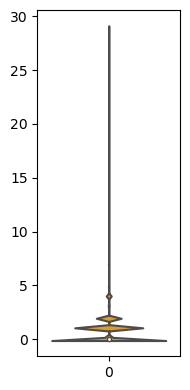

In [ ]:
dist(df_fe_new, 'delinq_2yrs')

In [ ]:
#segment and sort data values into 10 bins
df_fe_new['delinq_2yrs_woe'] = pd.cut(x = df_fe_new['delinq_2yrs'], bins = 10)

#WOE & IV
woe(df_fe_new,'delinq_2yrs_woe')

delinq_2yrs_woe  num_observation  good_loan_prob  good_loan_prop  \
0    (23.2, 26.1]                1        1.000000    4.841441e-12   
1    (26.1, 29.0]                1        1.000000    4.841441e-12   
2    (20.3, 23.2]                4        0.750000    7.746305e-11   
3    (17.4, 20.3]                9        0.888889    3.921567e-10   
4    (14.5, 17.4]               15        0.866667    1.089324e-09   
5    (11.6, 14.5]               71        0.746479    2.440570e-08   
6     (8.7, 11.6]              214        0.873832    2.217186e-07   
7      (5.8, 8.7]             1149        0.862489    6.391675e-06   
8      (2.9, 5.8]             9258        0.868762    4.149626e-04   
9   (-0.029, 2.9]           454382        0.877359    9.995784e-01   

   bad_loan_prop  weight of evidence  information_value  
0       0.000048          -16.101072           4.009126  
1       0.000048          -16.101072           4.009126  
2       0.000190          -14.714771           4.009126  
3       0.000428          -13.903830           4.009126  
4       0.000714          -13.392992           4.009126  
5       0.003379          -11.838242           4.009126  
6       0.010181          -10.734638           4.009126  
7       0.054554           -9.051953           4.009126  
8       0.431884           -6.947725           4.009126  
9       0.498573            0.695583           4.009126

**Insight :**   
*'delinq_2yrs'* information value is too high, so this variable gonna be dropped.   

#### WOE & IV : `inq_last_6mths`

number of unique value : 28
Distribution :
count    465104.000000
mean          0.804577
std           1.091316
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          33.000000
Name: inq_last_6mths, dtype: float64


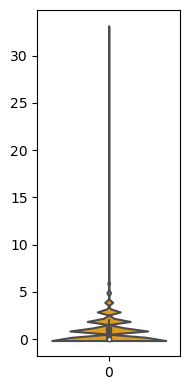

In [ ]:
dist(df_fe_new, 'inq_last_6mths')

In [ ]:
#segment and sort data values into 10 bins
df_fe_new['inq_last_6mths_woe'] = pd.cut(x = df_fe_new['inq_last_6mths'], bins = 10)

#WOE & IV
woe(df_fe_new,'inq_last_6mths_woe')

inq_last_6mths_woe  num_observation  good_loan_prob  good_loan_prop  \
0       (19.8, 23.1]                1        0.000000    4.859571e-12   
1       (26.4, 29.7]                2        0.000000    1.943828e-11   
2       (23.1, 26.4]                3        0.000000    4.373614e-11   
3       (29.7, 33.0]                3        0.000000    4.373614e-11   
4       (16.5, 19.8]                8        0.000000    3.110126e-10   
5       (13.2, 16.5]               18        0.000000    1.574501e-09   
6        (9.9, 13.2]               60        0.000000    1.749446e-08   
7         (6.6, 9.9]              366        0.147541    6.509687e-07   
8         (3.3, 6.6]            11151        0.730786    6.042624e-04   
9      (-0.033, 3.3]           453492        0.881500    9.993951e-01   

   bad_loan_prop  weight of evidence  information_value  
0       0.000044          -16.021428           3.765304  
1       0.000088          -15.328279           3.765304  
2       0.000132          -14.922811           3.765304  
3       0.000132          -14.922811           3.765304  
4       0.000353          -13.941971           3.765304  
5       0.000794          -13.131020           3.765304  
6       0.002647          -11.926956           3.765304  
7       0.016135          -10.118009           3.765304  
8       0.480166           -6.677878           3.765304  
9       0.499509            0.693525           3.765304

**Insight :**   
*'inq_last_6mths'* information value is too high, so this variable gonna be dropped.   

#### WOE & IV : `open_acc`

number of unique value : 62
Distribution :
count    465104.000000
mean         11.185989
std           4.987507
min           0.000000
25%           8.000000
50%          10.000000
75%          14.000000
max          84.000000
Name: open_acc, dtype: float64


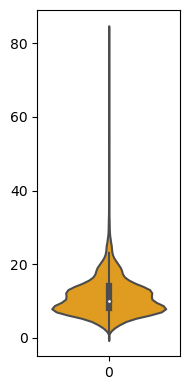

In [ ]:
dist(df_fe_new, 'open_acc')

In [ ]:
#segment and sort data values into 10 bins
df_fe_new['open_acc_woe'] = pd.cut(x = df_fe_new['open_acc'], bins = 10)

#WOE & IV
woe(df_fe_new,'open_acc_woe')

open_acc_woe  num_observation  good_loan_prob  good_loan_prop  \
0   (67.2, 75.6]                1        1.000000    1.120368e-11   
1   (58.8, 67.2]                2        1.000000    4.481472e-11   
2   (75.6, 84.0]                3        0.333333    1.008331e-10   
3   (50.4, 58.8]               20        0.950000    4.481472e-09   
4   (42.0, 50.4]               81        0.901235    7.350735e-08   
5   (33.6, 42.0]              814        0.866093    7.423514e-06   
6   (25.2, 33.6]             5123        0.881124    2.940421e-04   
7   (16.8, 25.2]            56329        0.879139    3.554879e-02   
8  (-0.084, 8.4]           151564        0.875755    2.573670e-01   
9    (8.4, 16.8]           251167        0.877452    7.067827e-01   

   bad_loan_prop  weight of evidence  information_value  
0       0.000004          -12.696826           0.523508  
1       0.000007          -12.003676           0.523508  
2       0.000011          -11.598209           0.523508  
3       0.000073           -9.701052           0.523508  
4       0.000296           -8.302204           0.523508  
5       0.002974           -5.993116           0.523508  
6       0.018545           -4.144256           0.523508  
7       0.181213           -1.628767           0.523508  
8       0.373992           -0.373730           0.523508  
9       0.422884            0.513625           0.523508

**Insight :**   
*'open_acc'* is Suspicious Predictive Power (IV > 0.5)

#### WOE & IV : `revol_bal`

number of unique value : 58049
Distribution :
count    4.651040e+05
mean     1.621467e+04
std      2.062955e+04
min      0.000000e+00
25%      6.412000e+03
50%      1.175800e+04
75%      2.032000e+04
max      2.568995e+06
Name: revol_bal, dtype: float64


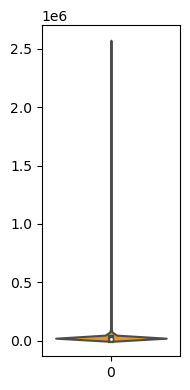

In [ ]:
dist(df_fe_new, 'revol_bal')

In [ ]:
#segment and sort data values into 10 bins
df_fe_new['revol_bal_woe'] = pd.cut(x = df_fe_new['revol_bal'], bins = 10)

#WOE & IV
woe(df_fe_new,'revol_bal_woe')

revol_bal_woe  num_observation  good_loan_prob  good_loan_prop  \
0  (1284497.5, 1541397.0]                1        1.000000    4.629867e-12   
1  (1541397.0, 1798296.5]                2        0.500000    1.851947e-11   
2  (2312095.5, 2568995.0]                2        1.000000    1.851947e-11   
3  (1027598.0, 1284497.5]                3        0.666667    4.166880e-11   
4   (770698.5, 1027598.0]                6        0.833333    1.666752e-10   
5    (513799.0, 770698.5]               25        0.880000    2.893667e-09   
6    (256899.5, 513799.0]              319        0.874608    4.711398e-07   
7   (-2568.995, 256899.5]           464746        0.877133    9.999995e-01   
8  (1798296.5, 2055196.0]                0             NaN    0.000000e+00   
9  (2055196.0, 2312095.5]                0             NaN    0.000000e+00   

   bad_loan_prop  weight of evidence  information_value  
0       0.001398          -19.525503           7.405276  
1       0.002795          -18.832354           7.405276  
2       0.002795          -18.832354           7.405276  
3       0.004193          -18.426887           7.405276  
4       0.008386          -17.733733           7.405276  
5       0.034939          -16.306576           7.405276  
6       0.445534          -13.759628           7.405276  
7       0.499961            0.693224           7.405276  
8       0.000000                 NaN           7.405276  
9       0.000000                 NaN           7.405276

In [ ]:
#delete revol_bal_woe column
df_fe_new = df_fe_new.drop('revol_bal_woe', axis=1)

In [ ]:
#because the distribution of the number of observations based on bins is not evenly distributed and there is null values,
#4 categories of Total credit revolving balance were created
df_fe_new['revol_bal_woe'] = np.where((df_fe_new['revol_bal']>0) & (df_fe_new['revol_bal']<=5000),0,
                                       np.where(df_fe_new['revol_bal']<=10000, '1',
                                       np.where(df_fe_new['revol_bal']<=15000, '2','3')))

#WOE & IV
woe(df_fe_new,'revol_bal_woe')

revol_bal_woe  num_observation  good_loan_prob  good_loan_prop  \
0             0            80146        0.870599        0.106947   
1             2            88601        0.875487        0.130702   
2             1           117569        0.872160        0.230140   
3             3           178788        0.884137        0.532210   

   bad_loan_prop  weight of evidence  information_value  
0       0.197445           -0.613122           0.199394  
1       0.213480           -0.490621           0.199394  
2       0.261482           -0.127678           0.199394  
3       0.327593            0.485267           0.199394

**Insight :**   
*'revol_bal'* is Medium predictive Power (IV in range 0.1 to 0.3)  

#### WOE & IV : `revol_util`

number of unique value : 1268
Distribution :
count    465104.000000
mean         56.188890
std          23.721874
min           0.000000
25%          39.300000
50%          57.600000
75%          74.700000
max         892.300000
Name: revol_util, dtype: float64


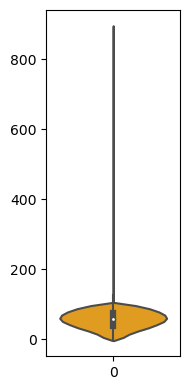

In [ ]:
dist(df_fe_new, 'revol_util')

In [ ]:
#segment and sort data values into 10 bins
df_fe_new['revol_util_woe'] = pd.cut(x = df_fe_new['revol_util'], bins = 10)

#WOE & IV
woe(df_fe_new,'revol_util_woe')

revol_util_woe  num_observation  good_loan_prob  good_loan_prop  \
0  (178.46, 267.69]                1        1.000000    5.410135e-12   
1  (356.92, 446.15]                1        0.000000    5.410135e-12   
2   (803.07, 892.3]                1        1.000000    5.410135e-12   
3   (89.23, 178.46]            36746        0.841697    7.305135e-03   
4   (-0.892, 89.23]           428355        0.880169    9.926949e-01   
5  (267.69, 356.92]                0             NaN    0.000000e+00   
6  (446.15, 535.38]                0             NaN    0.000000e+00   
7  (535.38, 624.61]                0             NaN    0.000000e+00   
8  (624.61, 713.84]                0             NaN    0.000000e+00   
9  (713.84, 803.07]                0             NaN    0.000000e+00   

   bad_loan_prop  weight of evidence  information_value  
0       0.000015          -14.820033           2.420491  
1       0.000015          -14.820033           2.420491  
2       0.000015          -14.820033           2.420491  
3       0.499959           -4.225949           2.420491  
4       0.499996            0.685822           2.420491  
5       0.000000                 NaN           2.420491  
6       0.000000                 NaN           2.420491  
7       0.000000                 NaN           2.420491  
8       0.000000                 NaN           2.420491  
9       0.000000                 NaN           2.420491

In [ ]:
#delete revol_util_woe column
df_fe_new = df_fe_new.drop('revol_util_woe', axis=1)

In [ ]:
#because the distribution of the number of observations based on bins is not evenly distributed and there is null values,
#5 categories of revol_util_woe were created
df_fe_new['revol_util_woe'] = np.where((df_fe_new['revol_util']>0) & (df_fe_new['revol_util']<=20),'0',
                                       np.where(df_fe_new['revol_util']<=40, '1',
                                       np.where(df_fe_new['revol_util']<=60, '2',
                                       np.where(df_fe_new['revol_util']<=80, '3','4'))))

#WOE & IV
woe(df_fe_new,'revol_util_woe')

revol_util_woe  num_observation  good_loan_prob  good_loan_prop  \
0              0            34997        0.908221        0.024714   
1              4            83902        0.849980        0.142043   
2              1            85507        0.895237        0.147529   
3              2           129422        0.882910        0.337981   
4              3           131276        0.868696        0.347733   

   bad_loan_prop  weight of evidence  information_value  
0       0.090263           -1.295369           0.156858  
1       0.191791           -0.300278           0.156858  
2       0.194637           -0.277110           0.156858  
3       0.260518            0.260316           0.156858  
4       0.262791            0.280078           0.156858

**Insight :**   
*'revol_util'* is Medium predictive Power (IV in range 0.1 to 0.3)

#### WOE & IV : `total_acc`

number of unique value : 112
Distribution :
count    465104.000000
mean         25.056673
std          11.599090
min           1.000000
25%          17.000000
50%          23.000000
75%          32.000000
max         156.000000
Name: total_acc, dtype: float64


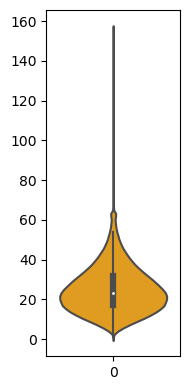

In [ ]:
dist(df_fe_new, 'total_acc')

In [ ]:
#segment and sort data values into 10 bins
df_fe_new['total_acc_woe'] = pd.cut(x = df_fe_new['total_acc'], bins = 10)

#WOE & IV
woe(df_fe_new,'total_acc_woe')

total_acc_woe  num_observation  good_loan_prob  good_loan_prop  \
0  (140.5, 156.0]                2        1.000000    5.034732e-11   
1  (109.5, 125.0]                6        1.000000    4.531259e-10   
2   (94.0, 109.5]               22        0.909091    6.092025e-09   
3    (78.5, 94.0]              187        0.877005    4.401488e-07   
4    (63.0, 78.5]             1029        0.894072    1.332745e-05   
5    (47.5, 63.0]            19538        0.882230    4.804814e-03   
6    (32.0, 47.5]            87895        0.885375    9.723994e-02   
7   (0.845, 16.5]           115681        0.863435    1.684381e-01   
8    (16.5, 32.0]           240744        0.880205    7.295033e-01   
9  (125.0, 140.5]                0             NaN    0.000000e+00   

   bad_loan_prop  weight of evidence  information_value  
0       0.000007          -11.812911           0.586184  
1       0.000020          -10.714290           0.586184  
2       0.000075           -9.414973           0.586184  
3       0.000635           -7.274552           0.586184  
4       0.003489           -5.567505           0.586184  
5       0.063602           -2.583030           0.586184  
6       0.242229           -0.912703           0.586184  
7       0.295321           -0.561493           0.586184  
8       0.394622            0.614436           0.586184  
9       0.000000                 NaN           0.586184

In [ ]:
#delete total_acc_woe column
df_fe_new = df_fe_new.drop('total_acc_woe', axis=1)

In [ ]:
#because there is null values,
#segment and sort data values into 7 bins
df_fe_new['total_acc_woe'] = pd.cut(x = df_fe_new['total_acc'], bins = 7)

#WOE & IV
woe(df_fe_new,'total_acc_woe')

total_acc_woe  num_observation  good_loan_prob  good_loan_prop  \
0    (133.857, 156.0]                2        1.000000    4.113238e-11   
1  (111.714, 133.857]                6        1.000000    3.701914e-10   
2   (89.571, 111.714]               53        0.867925    2.888521e-08   
3    (67.429, 89.571]              697        0.889527    4.995620e-06   
4    (45.286, 67.429]            25676        0.882380    6.779202e-03   
5    (23.143, 45.286]           205705        0.884247    4.351245e-01   
6     (0.845, 23.143]           232965        0.870225    5.580913e-01   

   bad_loan_prop  weight of evidence  information_value  
0       0.000008          -12.154367           0.273104  
1       0.000023          -11.055746           0.273104  
2       0.000207           -8.877113           0.273104  
3       0.002718           -6.299234           0.273104  
4       0.094754           -2.637420           0.273104  
5       0.448119           -0.029427           0.273104  
6       0.454171            0.206049           0.273104

**Insight :**   
*'total_acc'* is Medium predictive Power (IV in range 0.1 to 0.3)

#### WOE & IV : `out_prncp`

number of unique value : 135366
Distribution :
count    465104.000000
mean       4408.524091
std        6354.096522
min           0.000000
25%           0.000000
50%         433.525000
75%        7338.405000
max       32160.380000
Name: out_prncp, dtype: float64


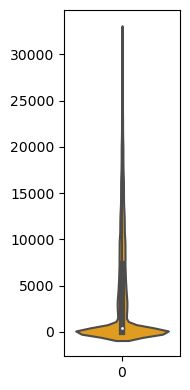

In [ ]:
dist(df_fe_new, 'out_prncp')

In [ ]:
#segment and sort data values into 10 bins
df_fe_new['out_prncp_woe'] = pd.cut(x = df_fe_new['out_prncp'], bins = 10)

#WOE & IV
woe(df_fe_new,'out_prncp_woe')

out_prncp_woe  num_observation  good_loan_prob  good_loan_prop  \
0   (28944.342, 32160.38]             1066        0.855535        0.000013   
1  (25728.304, 28944.342]             3492        0.935281        0.000141   
2  (22512.266, 25728.304]             5677        0.929540        0.000372   
3  (19296.228, 22512.266]             9516        0.934426        0.001044   
4   (16080.19, 19296.228]            14343        0.940738        0.002372   
5   (12864.152, 16080.19]            20905        0.942693        0.005039   
6   (9648.114, 12864.152]            32269        0.943382        0.012008   
7    (6432.076, 9648.114]            40670        0.949299        0.019074   
8    (3216.038, 6432.076]            53681        0.951119        0.033230   
9      (-32.16, 3216.038]           283485        0.833561        0.926708   

   bad_loan_prop  weight of evidence  information_value  
0       0.003817           -5.674264           1.694088  
1       0.012438           -4.482461           1.694088  
2       0.020124           -3.991768           1.694088  
3       0.033451           -3.466825           1.694088  
4       0.049885           -3.045886           1.694088  
5       0.071650           -2.654495           1.694088  
6       0.107769           -2.194460           1.694088  
7       0.133190           -1.943476           1.694088  
8       0.170411           -1.634773           1.694088  
9       0.397264            0.847038           1.694088

**Insight :**   
*'out_prncp'* information value is too high, so this variable gonna be dropped.

#### WOE & IV : `total_pymnt`

number of unique value : 350882
Distribution :
count    465104.000000
mean      11541.501097
std        8264.593202
min           0.000000
25%        5553.556836
50%        9420.657020
75%       15309.890000
max       57777.579870
Name: total_pymnt, dtype: float64


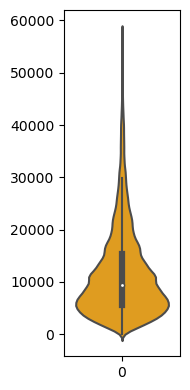

In [ ]:
dist(df_fe_new, 'total_pymnt')

In [ ]:
#segment and sort data values into 10 bins
df_fe_new['total_pymnt_woe'] = pd.cut(x = df_fe_new['total_pymnt'], bins = 10)

#WOE & IV
woe(df_fe_new,'total_pymnt_woe')

total_pymnt_woe  num_observation  good_loan_prob  good_loan_prop  \
0   (51999.822, 57777.58]               83        0.987952    1.326755e-07   
1  (46222.064, 51999.822]              651        0.996928    8.162001e-06   
2  (40444.306, 46222.064]             3165        0.989573    1.929221e-04   
3  (34666.548, 40444.306]             6648        0.979693    8.511707e-04   
4   (28888.79, 34666.548]            11190        0.969526    2.411542e-03   
5   (23111.032, 28888.79]            23229        0.960653    1.039192e-02   
6  (17333.274, 23111.032]            45753        0.947064    4.031566e-02   
7  (11555.516, 17333.274]            90482        0.925388    1.576736e-01   
8     (-57.778, 5777.758]           124296        0.768721    2.975425e-01   
9   (5777.758, 11555.516]           159607        0.888464    4.906124e-01   

   bad_loan_prop  weight of evidence  information_value  
0       0.000235           -7.478481           0.463065  
1       0.001839           -5.417590           0.463065  
2       0.008893           -3.830764           0.463065  
3       0.018539           -3.081032           0.463065  
4       0.030896           -2.550371           0.463065  
5       0.062436           -1.793109           0.463065  
6       0.116708           -1.062935           0.463065  
7       0.206186           -0.268251           0.463065  
8       0.257674            0.143863           0.463065  
9       0.296594            0.503291           0.463065

**Insight :**   
*'total_pymnt'* is Strong predictive Power (IV in range 0.3 to 0.5)

#### WOE & IV : `total_rec_int`

number of unique value : 269852
Distribution :
count    465104.000000
mean       2588.758394
std        2483.614211
min           0.000000
25%         957.445000
50%        1819.015000
75%        3304.755000
max       24205.620000
Name: total_rec_int, dtype: float64


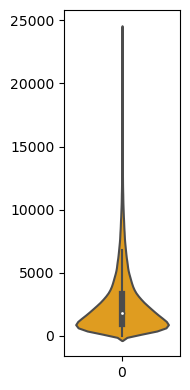

In [ ]:
dist(df_fe_new, 'total_rec_int')

In [ ]:
#segment and sort data values into 10 bins
df_fe_new['total_rec_int_woe'] = pd.cut(x = df_fe_new['total_rec_int'], bins = 10)

#WOE & IV
woe(df_fe_new,'total_rec_int_woe')

total_rec_int_woe  num_observation  good_loan_prob  good_loan_prop  \
0   (21785.058, 24205.62]               32        0.937500    1.038285e-08   
1  (19364.496, 21785.058]              172        0.872093    2.999670e-07   
2  (16943.934, 19364.496]              545        0.880734    3.011685e-06   
3  (14523.372, 16943.934]             1337        0.891548    1.812506e-05   
4   (12102.81, 14523.372]             2575        0.874563    6.723122e-05   
5    (9682.248, 12102.81]             6357        0.884379    4.097519e-04   
6    (7261.686, 9682.248]            15551        0.880522    2.452072e-03   
7    (4841.124, 7261.686]            37274        0.881714    1.408733e-02   
8    (2420.562, 4841.124]           109970        0.883414    1.226210e-01   
9     (-24.206, 2420.562]           291291        0.873776    8.603411e-01   

   bad_loan_prop  weight of evidence  information_value  
0       0.000126           -9.407410           1.163432  
1       0.000679           -7.725350           1.163432  
2       0.002151           -6.571256           1.163432  
3       0.005268           -5.672152           1.163432  
4       0.010119           -5.014058           1.163432  
5       0.024778           -4.102141           1.163432  
6       0.059398           -3.187327           1.163432  
7       0.135491           -2.263628           1.163432  
8       0.331817           -0.995486           1.163432  
9       0.430172            0.693144           1.163432

**Insight :**   
*'total_rec_int'* information value is too high, so this variable gonna be dropped.

#### WOE & IV : `total_rec_late_fee`

number of unique value : 5793
Distribution :
count    465104.000000
mean          0.649565
std           5.259230
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         358.680000
Name: total_rec_late_fee, dtype: float64


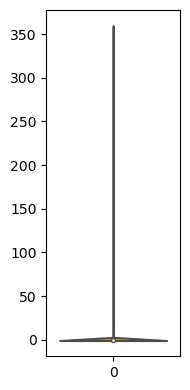

In [ ]:
dist(df_fe_new, 'total_rec_late_fee')

In [ ]:
#segment and sort data values into 10 bins
df_fe_new['total_rec_late_fee_woe'] = pd.cut(x = df_fe_new['total_rec_late_fee'], bins = 10)

#WOE & IV
woe(df_fe_new,'total_rec_late_fee_woe')

total_rec_late_fee_woe  num_observation  good_loan_prob  good_loan_prop  \
0     (286.944, 322.812]                1        0.000000    4.668604e-12   
1      (322.812, 358.68]                1        0.000000    4.668604e-12   
2     (215.208, 251.076]                2        0.500000    1.867442e-11   
3     (251.076, 286.944]                3        0.666667    4.201744e-11   
4      (179.34, 215.208]                7        0.000000    2.287616e-10   
5      (143.472, 179.34]               19        0.368421    1.685366e-09   
6     (107.604, 143.472]               85        0.376471    3.373067e-08   
7      (71.736, 107.604]              279        0.369176    3.634088e-07   
8       (35.868, 71.736]             1897        0.405377    1.680048e-05   
9       (-0.359, 35.868]           462810        0.879501    9.999828e-01   

   bad_loan_prop  weight of evidence  information_value  
0       0.000219          -17.663161           5.619615  
1       0.000219          -17.663161           5.619615  
2       0.000438          -16.970011           5.619615  
3       0.000657          -16.564544           5.619615  
4       0.001532          -15.717238           5.619615  
5       0.004159          -14.718683           5.619615  
6       0.018601          -13.220329           5.619615  
7       0.061030          -12.031351           5.619615  
8       0.413517          -10.111047           5.619615  
9       0.499629            0.693873           5.619615

**Insight :**   
*'total_rec_late_fee'* information value is too high, so this variable gonna be dropped.

#### WOE & IV : `recoveries`

number of unique value : 22720
Distribution :
count    465104.000000
mean         85.318981
std         552.036096
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       33520.270000
Name: recoveries, dtype: float64


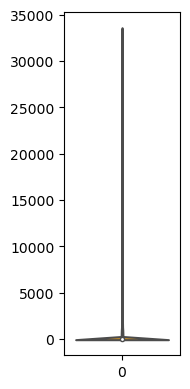

In [ ]:
dist(df_fe_new, 'recoveries')

In [ ]:
#segment and sort data values into 10 bins
df_fe_new['recoveries_woe'] = pd.cut(x = df_fe_new['recoveries'], bins = 10)

#WOE & IV
woe(df_fe_new,'recoveries_woe')

recoveries_woe  num_observation  good_loan_prob  good_loan_prop  \
0   (30168.243, 33520.27]                2        0.000000    1.873373e-11   
1  (23464.189, 26816.216]                3        0.000000    4.215090e-11   
2  (26816.216, 30168.243]                3        0.000000    4.215090e-11   
3  (20112.162, 23464.189]               10        0.000000    4.683433e-10   
4  (16760.135, 20112.162]               13        0.000000    7.915002e-10   
5  (13408.108, 16760.135]               32        0.000000    4.795836e-09   
6  (10056.081, 13408.108]               74        0.000000    2.564648e-08   
7   (6704.054, 10056.081]              238        0.000000    2.652884e-07   
8    (3352.027, 6704.054]             2656        0.000000    3.303851e-05   
9      (-33.52, 3352.027]           462073        0.882882    9.999667e-01   

   bad_loan_prop  weight of evidence  information_value  
0       0.000332          -16.689843           5.289529  
1       0.000498          -16.284376           5.289529  
2       0.000498          -16.284376           5.289529  
3       0.001659          -15.080388           5.289529  
4       0.002157          -14.818017           5.289529  
5       0.005309          -13.917190           5.289529  
6       0.012276          -13.078770           5.289529  
7       0.039469          -11.910212           5.289529  
8       0.438171           -9.492691           5.289529  
9       0.499631            0.693852           5.289529

**Insight :**   
*'recoveries'* information value is too high, so this variable gonna be dropped.

#### WOE & IV : `last_pymnt_amnt`

number of unique value : 197887
Distribution :
count    465104.000000
mean       3125.013069
std        5555.100702
min           0.000000
25%         312.640000
50%         545.990000
75%        3193.115000
max       36234.440000
Name: last_pymnt_amnt, dtype: float64


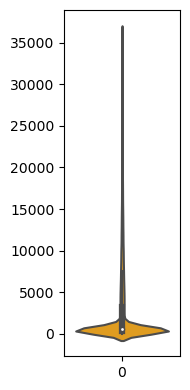

In [ ]:
dist(df_fe_new, 'last_pymnt_amnt')

In [ ]:
#5 categories of last_pymnt_amnt_woe were created
df_fe_new['last_pymnt_amnt_woe'] = np.where((df_fe_new['last_pymnt_amnt']>0) & (df_fe_new['last_pymnt_amnt']<=500),'0',
                                       np.where(df_fe_new['last_pymnt_amnt']<=1000, '1',
                                       np.where(df_fe_new['last_pymnt_amnt']<=1500, '2',
                                       np.where(df_fe_new['last_pymnt_amnt']<=3500, '3','4'))))

#WOE & IV
woe(df_fe_new,'last_pymnt_amnt_woe')

last_pymnt_amnt_woe  num_observation  good_loan_prob  good_loan_prop  \
0                   2            14932        0.861171        0.003209   
1                   3            23702        0.973420        0.008086   
2                   1            98788        0.828613        0.140466   
3                   4           112631        0.995303        0.182590   
4                   0           215051        0.828018        0.665649   

   bad_loan_prop  weight of evidence  information_value  
0       0.045776           -2.657732           0.523528  
1       0.071246           -2.176006           0.523528  
2       0.246434           -0.562129           0.523528  
3       0.270348           -0.392466           0.523528  
4       0.366196            0.597593           0.523528

**Insight :**   
*'last_pymnt_amnt'* is Suspicious Predictive Power (IV > 0.5)

#### WOE & IV : `tot_coll_amt`

number of unique value : 6303
Distribution :
count    4.651040e+05
mean     1.625900e+02
std      1.349946e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.152545e+06
Name: tot_coll_amt, dtype: float64


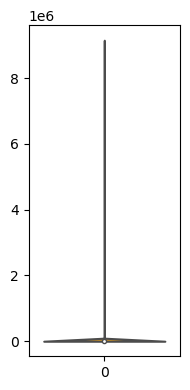

In [ ]:
dist(df_fe_new, 'tot_coll_amt')

In [ ]:
 #4 categories of tot_coll_amt were created
df_fe_new['tot_coll_amt_woe'] = np.where((df_fe_new['tot_coll_amt']>0) & (df_fe_new['tot_coll_amt']<=50),0,
                                       np.where(df_fe_new['tot_coll_amt']<=100, '1',
                                       np.where(df_fe_new['tot_coll_amt']<=150, '2','3')))

#WOE & IV
woe(df_fe_new,'tot_coll_amt_woe')

tot_coll_amt_woe  num_observation  good_loan_prob  good_loan_prop  \
0                0             1274        0.873626        0.000009   
1                2             4521        0.892944        0.000113   
2                3            34509        0.893100        0.006555   
3                1           424800        0.875673        0.993323   

   bad_loan_prop  weight of evidence  information_value  
0       0.017052           -7.554131           2.619381  
1       0.060089           -6.280534           2.619381  
2       0.428796           -4.180722           2.619381  
3       0.494063            0.698393           2.619381

**Insight :**   
*'tot_coll_amt'* information value is too high, so this variable gonna be dropped.

#### WOE & IV : `tot_cur_bal`

number of unique value : 220334
Distribution :
count    4.651040e+05
mean     1.178506e+05
std      1.486371e+05
min      0.000000e+00
25%      1.547300e+04
50%      5.249150e+04
75%      1.848992e+05
max      8.000078e+06
Name: tot_cur_bal, dtype: float64


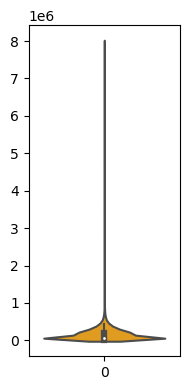

In [ ]:
dist(df_fe_new, 'tot_cur_bal')

In [ ]:
#segment and sort data values into 5 bins
df_fe_new['tot_cur_bal_woe'] = pd.cut(x = df_fe_new['tot_cur_bal'], bins = 5)

#WOE & IV
woe(df_fe_new,'tot_cur_bal_woe')

tot_cur_bal_woe  num_observation  good_loan_prob  good_loan_prop  \
0  (6400062.4, 8000078.0]                1        1.000000    4.625130e-12   
1  (3200031.2, 4800046.8]               11        0.818182    5.596407e-10   
2  (1600015.6, 3200031.2]              108        0.935185    5.394752e-08   
3  (-8000.078, 1600015.6]           464984        0.877116    9.999999e-01   
4  (4800046.8, 6400062.4]                0             NaN    0.000000e+00   

   bad_loan_prop  weight of evidence  information_value  
0       0.004168          -20.619110           8.439394  
1       0.045843          -18.221193           8.439394  
2       0.450001          -15.936749           8.439394  
3       0.499988            0.693171           8.439394  
4       0.000000                 NaN           8.439394

**Insight :**   
*'tot_cur_bal_woe'* information value is too high, so this variable gonna be dropped)

#### WOE & IV : `total_rev_hi_lim`

number of unique value : 14568
Distribution :
count    4.651040e+05
mean     2.577090e+04
std      3.595999e+04
min      0.000000e+00
25%      8.900000e+03
50%      1.920000e+04
75%      3.430000e+04
max      9.999999e+06
Name: total_rev_hi_lim, dtype: float64


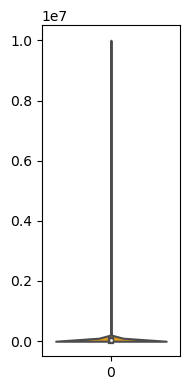

In [ ]:
dist(df_fe_new, 'total_rev_hi_lim')

In [ ]:
 #4 categories of total_rev_hi_lim were created
df_fe_new['total_rev_hi_lim_woe'] = np.where((df_fe_new['total_rev_hi_lim']>0) & (df_fe_new['total_rev_hi_lim']<=500),0,
                                       np.where(df_fe_new['total_rev_hi_lim']<=1000, '1',
                                       np.where(df_fe_new['total_rev_hi_lim']<=2000, '2','3')))

#WOE & IV
woe(df_fe_new,'total_rev_hi_lim_woe')

total_rev_hi_lim_woe  num_observation  good_loan_prob  good_loan_prop  \
0                    0              139        0.863309    1.211022e-07   
1                    2             1230        0.831707    9.482713e-06   
2                    1            70597        0.815431    3.123884e-02   
3                    3           393138        0.888355    9.687516e-01   

   bad_loan_prop  weight of evidence  information_value  
0       0.001138           -9.148394           1.657875  
1       0.010049           -6.965749           1.657875  
2       0.490518           -2.753800           1.657875  
3       0.498295            0.664816           1.657875

**Insight :**   
*'total_rev_hi_lim'* information value is too high, so this variable gonna be dropped

#### WOE & IV : `pymnt_time`

number of unique value : 98
Distribution :
count    465104.000000
mean          8.914965
std          12.257049
min           0.000000
25%           1.000000
50%           2.000000
75%          13.000000
max          97.000000
Name: pymnt_time, dtype: float64


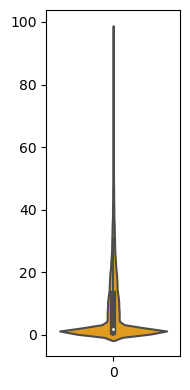

In [ ]:
dist(df_fe_new, 'pymnt_time')

In [ ]:
#4 categories of pymnt_time were created
df_fe_new['pymnt_time_woe'] = np.where((df_fe_new['pymnt_time']>0) & (df_fe_new['pymnt_time']<=1),0,
                                       np.where(df_fe_new['pymnt_time']<=6, '1',
                                       np.where(df_fe_new['pymnt_time']<=12, '2','3')))

#WOE & IV
woe(df_fe_new,'pymnt_time_woe')

pymnt_time_woe  num_observation  good_loan_prob  good_loan_prop  \
0              2            59988        0.792492        0.059000   
1              1           107733        0.875665        0.190292   
2              3           120679        0.773009        0.238773   
3              0           176704        0.977861        0.511935   

   bad_loan_prop  weight of evidence  information_value  
0       0.156456           -0.975237           0.195342  
1       0.247865           -0.264327           0.195342  
2       0.267592           -0.113950           0.195342  
3       0.328087            0.444919           0.195342

**Insight :**   
*'pymnt_time'* is Medium predictive Power (IV in range 0.1 to 0.3)

#### WOE & IV : `credit_pull_year`

number of unique value : 47
Distribution :
count    465104.000000
mean         18.195543
std           7.144517
min           1.000000
25%          13.000000
50%          17.000000
75%          22.000000
max          47.000000
Name: credit_pull_year, dtype: float64


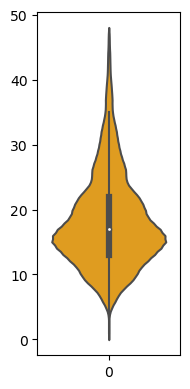

In [ ]:
dist(df_fe_new, 'credit_pull_year')

In [ ]:
#segment and sort data values into 10 bins
df_fe_new['credit_pull_year_woe'] = pd.cut(x = df_fe_new['credit_pull_year'], bins = 10)

#WOE & IV
woe(df_fe_new,'credit_pull_year_woe')

credit_pull_year_woe  num_observation  good_loan_prob  good_loan_prop  \
0         (42.4, 47.0]             2331        0.909910        0.000125   
1         (0.954, 5.6]             2446        0.721995        0.000138   
2         (37.8, 42.4]             6021        0.903338        0.000834   
3         (33.2, 37.8]             9017        0.908617        0.001870   
4         (28.6, 33.2]            25962        0.902319        0.015499   
5         (24.0, 28.6]            37209        0.896799        0.031837   
6          (5.6, 10.2]            50806        0.839842        0.059356   
7         (19.4, 24.0]            84753        0.893125        0.165176   
8         (10.2, 14.8]            99405        0.863940        0.227223   
9         (14.8, 19.4]           147154        0.879337        0.497943   

   bad_loan_prop  weight of evidence  information_value  
0       0.006241           -3.911079           0.473629  
1       0.006548           -3.862674           0.473629  
2       0.015993           -2.954118           0.473629  
3       0.023795           -2.543712           0.473629  
4       0.065965           -1.448329           0.473629  
5       0.092120           -1.062467           0.473629  
6       0.121786           -0.718711           0.473629  
7       0.186513           -0.121494           0.473629  
8       0.210330            0.077252           0.473629  
9       0.270708            0.609445           0.473629

**Insight :**   
*'credit_pull_year'* is Strong predictive Power (IV in range 0.3 to 0.5)

#### Drop Feature No Needed

There are feature that gonna be dropped because :
- Information Value (IV) < 0.02, The variable is Not useful for prediction
- Information Value (IV) > 0.5, The variable is Suspicious Predictive Power

In [ ]:
#drop list
drop_list = ['verification_status',
             'delinq_2yrs',
             'inq_last_6mths',
             'out_prncp',
             'total_rec_int',
             'total_rec_late_fee',
             'recoveries',
             'tot_coll_amt',
             'tot_cur_bal',
             'total_rev_hi_lim']

In [ ]:
#copy datataset
df_fe_clean = df_fe.copy()

In [ ]:
#drop list from dataset
df_fe_clean = df_fe_clean.drop(drop_list, axis = 1)

In [ ]:
print(f'Before Feature Engineering Using WOE and IV, there are {df_fe.shape[1]} columns')
print(f'After Feature Engineering Using WOE and IV, there are {df_fe_clean.shape[1]} columns')

Before Feature Engineering Using WOE and IV, there are 39 columns
After Feature Engineering Using WOE and IV, there are 29 columns


## Feature Encoding

Machine learning models can only work with numerical values. For this reason, it is necessary to transform the categorical values of the relevant features into numerical ones. This process is called **feature encoding**.

In [ ]:
#copy new dataset
df_encode = df_fe_clean.copy()

### Label Encoding

- Label encoding is probably the most basic type of categorical feature encoding method.
- Label encoding doesn’t add any extra columns to the data but instead assigns a number to each unique value in a feature.
- It saved a lot of room and don’t add more columns to data, resulting in a much cleaner look for the data.
- An obvious benefit to label encoding is that it’s quick, easy, and doesn’t create a messy data frame in the way that one-hot encoding adds a lot of columns.

In [ ]:
#delete 0 and 47 row
df_encodes = df_encode[~((df_encode['home_ownership'].isin([0,47]))
                        & (df_encode['initial_list_status'].isin([0,47])))
                        ]

In [ ]:
#categorical value
cat_encode = df_encodes.select_dtypes(include = 'object')
cat_encode.head(2)

term grade emp_length home_ownership              issue_d  loan_status  \
0   36     B  10+ years           RENT  2011-12-01 00:00:00   Fully Paid   
1   60     C   < 1 year           RENT  2011-12-01 00:00:00  Charged Off   

  pymnt_plan      purpose     earliest_cr_line initial_list_status  \
0          n  credit_card  1985-01-01 00:00:00                   f   
1          n          car  1999-04-01 00:00:00                   f   

          next_pymnt_d  
0  2016-02-01 00:00:00  
1  2016-02-01 00:00:00

In [ ]:
#count home ownership
df_encodes['home_ownership'].value_counts()

MORTGAGE    235209
RENT        188145
OWN          41518
OTHER          181
NONE            50
ANY              1
Name: home_ownership, dtype: int64

'None' and 'Any' will be combined with 'Other' because have same meaning

In [ ]:
#replace row value label
df_encodes.loc[df_encodes['home_ownership'].isin(['NONE','ANY']),'home_ownership'] = 'OTHER'

In [ ]:
#check updated home_ownership
df_encodes['home_ownership'].value_counts()

MORTGAGE    235209
RENT        188145
OWN          41518
OTHER          232
Name: home_ownership, dtype: int64

In [ ]:
#value count 'term'
df_encodes['term'].value_counts()

36    337075
60    128029
Name: term, dtype: int64

In [ ]:
#The number of payments on the loan. Values are in months and can be either 36 or 60.
#replace term '36' with 0
#replace term '60' with 1
df_encodes['term'] = np.where(df_encodes['term'] == '36',0,1)

In [ ]:
#value count 'initial_list_status'
df_encodes['initial_list_status'].value_counts()

f    302258
w    162846
Name: initial_list_status, dtype: int64

In [ ]:
#The initial listing status of the loan. Possible values are – Whole and Fractional
#replace initial_list_status 'f' with 0
#replace initial_list_status 'w' with 1
df_encodes['initial_list_status'] = np.where(df_encodes['initial_list_status'] == '36',0,1)

### One Hot Encoding Categoric

- **One-Hot encoding** technique is used when the features are nominal(do not have any order).
- In one hot encoding, for every categorical feature, a new variable is created.
- Categorical features are mapped with a binary variable containing either 0 or 1.
- Here, 0 represents the absence, and 1 represents the presence of that category.
- These newly created binary features are known as **Dummy variables.**

In [ ]:
df_encodes.head(2)

loan_amnt  term  int_rate grade emp_length home_ownership  annual_inc  \
0       5000     0     10.65     B  10+ years           RENT     24000.0   
1       2500     1     15.27     C   < 1 year           RENT     30000.0   

               issue_d  loan_status pymnt_plan      purpose    dti  \
0  2011-12-01 00:00:00   Fully Paid          n  credit_card  27.65   
1  2011-12-01 00:00:00  Charged Off          n          car   1.00   

      earliest_cr_line  open_acc  revol_bal  revol_util  total_acc  \
0  1985-01-01 00:00:00       3.0      13648        83.7        9.0   
1  1999-04-01 00:00:00       3.0       1687         9.4        4.0   

   initial_list_status  total_pymnt  collection_recovery_fee last_pymnt_d  \
0                    1  5861.071414                     0.00   2015-01-01   
1                    1  1008.710000                     1.11   2013-04-01   

   last_pymnt_amnt         next_pymnt_d last_credit_pull_d  pymnt_time  \
0           171.62  2016-02-01 00:00:00         2016-01-01          13   
1           119.66  2016-02-01 00:00:00         2013-09-01          34   

   credit_pull_year  target  last_credit_pull_d_year  last_pymnt_d_year  
0                31       0                   2016.0             2015.0  
1                14       1                   2013.0             2013.0

In [ ]:
#create dummy encoding
for i in [['home_ownership','purpose','emp_length','grade']]:
    onehots = pd.get_dummies(df_encodes[i], prefix = i)

In [ ]:
#display one hot encoding
onehots.head(2)

home_ownership_MORTGAGE  home_ownership_OTHER  home_ownership_OWN  \
0                        0                     0                   0   
1                        0                     0                   0   

   home_ownership_RENT  purpose_car  purpose_credit_card  \
0                    1            0                    1   
1                    1            1                    0   

   purpose_debt_consolidation  purpose_educational  purpose_home_improvement  \
0                           0                    0                         0   
1                           0                    0                         0   

   purpose_house  purpose_major_purchase  purpose_medical  purpose_moving  \
0              0                       0                0               0   
1              0                       0                0               0   

   purpose_other  purpose_renewable_energy  purpose_small_business  \
0              0                         0                       0   
1              0                         0                       0   

   purpose_vacation  purpose_wedding  emp_length_1 year  emp_length_10+ years  \
0                 0                0                  0                     1   
1                 0                0                  0                     0   

   emp_length_2 years  emp_length_3 years  emp_length_4 years  \
0                   0                   0                   0   
1                   0                   0                   0   

   emp_length_5 years  emp_length_6 years  emp_length_7 years  \
0                   0                   0                   0   
1                   0                   0                   0   

   emp_length_8 years  emp_length_9 years  emp_length_< 1 year  grade_A  \
0                   0                   0                    0        0   
1                   0                   0                    1        0   

   grade_B  grade_C  grade_D  grade_E  grade_F  grade_G  
0        1        0        0        0        0        0  
1        0        1        0        0        0        0

In [ ]:
onehots.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 465104 entries, 0 to 466284
Data columns (total 36 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   home_ownership_MORTGAGE     465104 non-null  uint8
 1   home_ownership_OTHER        465104 non-null  uint8
 2   home_ownership_OWN          465104 non-null  uint8
 3   home_ownership_RENT         465104 non-null  uint8
 4   purpose_car                 465104 non-null  uint8
 5   purpose_credit_card         465104 non-null  uint8
 6   purpose_debt_consolidation  465104 non-null  uint8
 7   purpose_educational         465104 non-null  uint8
 8   purpose_home_improvement    465104 non-null  uint8
 9   purpose_house               465104 non-null  uint8
 10  purpose_major_purchase      465104 non-null  uint8
 11  purpose_medical             465104 non-null  uint8
 12  purpose_moving              465104 non-null  uint8
 13  purpose_other               465104 non-null 

### Numerical Features Encode

- **Encoding numerical features** refers to the process of representing numerical data in a format suitable for machine learning algorithms.
- Numerical features are continuous values
- The simplest form of encoding numerical columns using **Binarization**
- In “binarization,” continuous variables are transformed into binary values (0 or 1) based on a predetermined threshold. Using this method, we can identify if a data point is above or below the threshold.

In [ ]:
#access column for numerical categories
num = df_encodes.select_dtypes(include = 'number').columns
num

Index(['loan_amnt', 'term', 'int_rate', 'annual_inc', 'dti', 'open_acc',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'total_pymnt', 'collection_recovery_fee', 'last_pymnt_amnt',
       'pymnt_time', 'credit_pull_year', 'target', 'last_credit_pull_d_year',
       'last_pymnt_d_year'],
      dtype='object')

In [ ]:
#divide dataset
#create new data for manual bin
manual_bin = df_encodes[['last_pymnt_amnt','revol_util','revol_bal','pymnt_time','term','target','annual_inc']]

#create new data for auto bin
auto_bin = df_encodes[num.drop(['last_pymnt_amnt','revol_util','revol_bal',
                                'pymnt_time','term','target','annual_inc',
                               'collection_recovery_fee','last_credit_pull_d_year','last_pymnt_d_year'])]

In [ ]:
manual_bin.head(4)

last_pymnt_amnt  revol_util  revol_bal  pymnt_time  term  target  \
0           171.62        83.7      13648          13     0       0   
1           119.66         9.4       1687          34     1       1   
2           649.91        98.5       2956          20     0       0   
3           357.48        21.0       5598          13     0       0   

   annual_inc  
0     24000.0  
1     30000.0  
2     12252.0  
3     49200.0

In [ ]:
auto_bin.head(2)

loan_amnt  int_rate    dti  open_acc  total_acc  initial_list_status  \
0       5000     10.65  27.65       3.0        9.0                    1   
1       2500     15.27   1.00       3.0        4.0                    1   

   total_pymnt  credit_pull_year  
0  5861.071414                31  
1  1008.710000                14

penjelasan terkait function :

#function for segment bins
def bins_df():
    auto_bin['loan_amnt'] = pd.cut(auto_bin['loan_amnt'],bins=10)
    return df_encode

#function convert to dummies
def dummy_df():
    dum = pd.get_dummies(auto_bin['loan_amnt'],prefix='loan_amnt')

In [ ]:
#function for segment bins
def bins_df(df, feature, bin_num):
    df[feature] = pd.cut(df[feature], bins = bin_num)
    return df

#function convert to dummies
def dummy_df(df_bin, feature):
    dum = pd.get_dummies(df_bin[feature], prefix=feature)
    return dum

In [ ]:
#segment bins & dummies
#loan_amnt
loan_amnt_bin = bins_df(auto_bin, 'loan_amnt', 10)
loan_amnt_dum = dummy_df(loan_amnt_bin , 'loan_amnt')

#int_rate
int_rate_bin = bins_df(auto_bin, 'int_rate', 10)
int_rate_dum = dummy_df(int_rate_bin , 'int_rate')

#dti
dti_bin = bins_df(auto_bin, 'dti', 10)
dti_dum = dummy_df(dti_bin , 'dti')

#open_acc
open_acc_bin = bins_df(auto_bin, 'open_acc', 10)
open_acc_dum = dummy_df(open_acc_bin , 'open_acc')

#total_acc
total_acc_bin = bins_df(auto_bin, 'total_acc', 7)
total_acc_dum = dummy_df(total_acc_bin , 'total_acc')

#total_pymnt
total_pymnt_bin = bins_df(auto_bin, 'total_pymnt', 10)
total_pymnt_dum = dummy_df(total_pymnt_bin , 'total_pymnt')

#credit_pull_year
credit_pull_year_bin = bins_df(auto_bin, 'credit_pull_year', 10)
credit_pull_year_dum = dummy_df(credit_pull_year_bin , 'credit_pull_year')

In [ ]:
#concatenate dummies feature
num_auto_bin = pd.concat([loan_amnt_dum, dti_dum, int_rate_dum, open_acc_dum,
                          total_acc_dum, total_pymnt_dum, credit_pull_year_dum], axis= 1)

In [ ]:
#display num_auto_bin
num_auto_bin.head(2)

loan_amnt_(465.5, 3950.0]  loan_amnt_(3950.0, 7400.0]  \
0                          0                           1   
1                          1                           0   

   loan_amnt_(7400.0, 10850.0]  loan_amnt_(10850.0, 14300.0]  \
0                            0                             0   
1                            0                             0   

   loan_amnt_(14300.0, 17750.0]  loan_amnt_(17750.0, 21200.0]  \
0                             0                             0   
1                             0                             0   

   loan_amnt_(21200.0, 24650.0]  loan_amnt_(24650.0, 28100.0]  \
0                             0                             0   
1                             0                             0   

   loan_amnt_(28100.0, 31550.0]  loan_amnt_(31550.0, 35000.0]  \
0                             0                             0   
1                             0                             0   

   dti_(-0.04, 3.999]  dti_(3.999, 7.998]  dti_(7.998, 11.997]  \
0                   0                   0                    0   
1                   1                   0                    0   

   dti_(11.997, 15.996]  dti_(15.996, 19.995]  dti_(19.995, 23.994]  \
0                     0                     0                     0   
1                     0                     0                     0   

   dti_(23.994, 27.993]  dti_(27.993, 31.992]  dti_(31.992, 35.991]  \
0                     1                     0                     0   
1                     0                     0                     0   

   dti_(35.991, 39.99]  int_rate_(5.399, 7.484]  int_rate_(7.484, 9.548]  \
0                    0                        0                        0   
1                    0                        0                        0   

   int_rate_(9.548, 11.612]  int_rate_(11.612, 13.676]  \
0                         1                          0   
1                         0                          0   

   int_rate_(13.676, 15.74]  int_rate_(15.74, 17.804]  \
0                         0                         0   
1                         1                         0   

   int_rate_(17.804, 19.868]  int_rate_(19.868, 21.932]  \
0                          0                          0   
1                          0                          0   

   int_rate_(21.932, 23.996]  int_rate_(23.996, 26.06]  \
0                          0                         0   
1                          0                         0   

   open_acc_(-0.084, 8.4]  open_acc_(8.4, 16.8]  open_acc_(16.8, 25.2]  \
0                       1                     0                      0   
1                       1                     0                      0   

   open_acc_(25.2, 33.6]  open_acc_(33.6, 42.0]  open_acc_(42.0, 50.4]  \
0                      0                      0                      0   
1                      0                      0                      0   

   open_acc_(50.4, 58.8]  open_acc_(58.8, 67.2]  open_acc_(67.2, 75.6]  \
0                      0                      0                      0   
1                      0                      0                      0   

   open_acc_(75.6, 84.0]  total_acc_(0.845, 23.143]  \
0                      0                          1   
1                      0                          1   

   total_acc_(23.143, 45.286]  total_acc_(45.286, 67.429]  \
0                           0                           0   
1                           0                           0   

   total_acc_(67.429, 89.571]  total_acc_(89.571, 111.714]  \
0                           0                            0   
1                           0                            0   

   total_acc_(111.714, 133.857]  total_acc_(133.857, 156.0]  \
0                             0                           0   
1                             0                           0   

   total_pymnt_(-57.778, 5777.758]  total_pymnt_(5777.758, 11555.516]  \
0               

In [ ]:
manual_bin.describe(percentiles=[0.1,0.25,0.5,0.75,0.9,0.95,0.99])

last_pymnt_amnt     revol_util     revol_bal     pymnt_time  \
count    465104.000000  465104.000000  4.651040e+05  465104.000000   
mean       3125.013069      56.188890  1.621467e+04       8.914965   
std        5555.100702      23.721874  2.062955e+04      12.257049   
min           0.000000       0.000000  0.000000e+00       0.000000   
10%         182.620000      23.200000  3.392000e+03       1.000000   
25%         312.640000      39.300000  6.412000e+03       1.000000   
50%         545.990000      57.600000  1.175800e+04       2.000000   
75%        3193.115000      74.700000  2.032000e+04      13.000000   
90%       10734.144000      87.100000  3.190800e+04      25.000000   
95%       15736.941500      92.500000  4.091100e+04      35.000000   
99%       25672.800000      97.900000  8.341994e+04      56.000000   
max       36234.440000     892.300000  2.568995e+06      97.000000   

                term         target    annual_inc  
count  465104.000000  465104.000000  4.651040e+05  
mean        0.275270       0.122871  7.326336e+04  
std         0.446651       0.328290  5.493562e+04  
min         0.000000       0.000000  1.896000e+03  
10%         0.000000       0.000000  3.400000e+04  
25%         0.000000       0.000000  4.500000e+04  
50%         0.000000       0.000000  6.300000e+04  
75%         1.000000       0.000000  8.883600e+04  
90%         1.000000       1.000000  1.200000e+05  
95%         1.000000       1.000000  1.500000e+05  
99%         1.000000       1.000000  2.430000e+05  
max         1.000000       1.000000  7.500000e+06

In [ ]:
#segment feature in manual_bin dataset
#revol_bal
manual_bin['revol_bal(0,5000)'] = np.where((manual_bin['revol_bal']>=0)
                                                & (manual_bin['revol_bal']<=5000),1,0)
manual_bin['revol_bal(5000,10000)'] = np.where((manual_bin['revol_bal']>5000)
                                                & (manual_bin['revol_bal']<=10000),1,0)
manual_bin['revol_bal(10000,15000)'] = np.where((manual_bin['revol_bal']>10000)
                                                & (manual_bin['revol_bal']<=15000),1,0)
manual_bin['revol_bal(>15000)'] = np.where((manual_bin['revol_bal']>15000),1,0)

#revol_util
manual_bin['revol_util(0,20)'] = np.where((manual_bin['revol_util']>=0)
                                                & (manual_bin['revol_util']<=20),1,0)
manual_bin['revol_util(20,40)'] = np.where((manual_bin['revol_util']>20)
                                                & (manual_bin['revol_util']<=40),1,0)
manual_bin['revol_util(40,60)'] = np.where((manual_bin['revol_util']>40)
                                                & (manual_bin['revol_util']<=60),1,0)
manual_bin['revol_util(60,80)'] = np.where((manual_bin['revol_util']>60)
                                                & (manual_bin['revol_util']<=80),1,0)
manual_bin['revol_util(>80)'] = np.where((manual_bin['revol_util']>80),1,0)

#last_pymnt_amnt
manual_bin['last_pymnt_amnt(0,500)'] = np.where((manual_bin['last_pymnt_amnt']>=0)
                                                & (manual_bin['last_pymnt_amnt']<=500),1,0)
manual_bin['last_pymnt_amnt(500,1000)'] = np.where((manual_bin['last_pymnt_amnt']>500)
                                                & (manual_bin['last_pymnt_amnt']<=1000),1,0)
manual_bin['last_pymnt_amnt(1000,1500)'] = np.where((manual_bin['last_pymnt_amnt']>1000)
                                                & (manual_bin['last_pymnt_amnt']<=1500),1,0)
manual_bin['last_pymnt_amnt(1500,3500)'] = np.where((manual_bin['last_pymnt_amnt']>1500)
                                                & (manual_bin['last_pymnt_amnt']<=3500),1,0)
manual_bin['last_pymnt_amnt(>3500)'] = np.where((manual_bin['last_pymnt_amnt']>3500),1,0)

#pymnt_time
manual_bin['pymnt_time(0,1)'] = np.where((manual_bin['pymnt_time']>=0)
                                                & (manual_bin['pymnt_time']<=1),1,0)
manual_bin['pymnt_time(1,6)'] = np.where((manual_bin['pymnt_time']>1)
                                                & (manual_bin['pymnt_time']<=6),1,0)
manual_bin['pymnt_time(6,12)'] = np.where((manual_bin['pymnt_time']>6)
                                                & (manual_bin['pymnt_time']<=12),1,0)
manual_bin['pymnt_time(>12)'] = np.where((manual_bin['pymnt_time']>12),1,0)

#annual_inc
manual_bin['annual_inc(low_income)'] = np.where((manual_bin['annual_inc']>=0)
                                                & (manual_bin['annual_inc']<=50000),1,0)
manual_bin['annual_inc(mid_income)'] = np.where((manual_bin['annual_inc']>50000)
                                                & (manual_bin['annual_inc']<=200000),1,0)
manual_bin['annual_inc(high_income)'] = np.where((manual_bin['annual_inc']>200000),1,0)

#drop original feature of manual_bin dataset
manual_bin_list = ['last_pymnt_amnt','revol_util','revol_bal','pymnt_time','term','target','annual_inc']
manual_bin = manual_bin.drop(manual_bin_list, axis =1)

In [ ]:
#display manual_bin
manual_bin.head(2)

revol_bal(0,5000)  revol_bal(5000,10000)  revol_bal(10000,15000)  \
0                  0                      0                       1   
1                  1                      0                       0   

   revol_bal(>15000)  revol_util(0,20)  revol_util(20,40)  revol_util(40,60)  \
0                  0                 0                  0                  0   
1                  0                 1                  0                  0   

   revol_util(60,80)  revol_util(>80)  last_pymnt_amnt(0,500)  \
0                  0                1                       1   
1                  0                0                       1   

   last_pymnt_amnt(500,1000)  last_pymnt_amnt(1000,1500)  \
0                          0                           0   
1                          0                           0   

   last_pymnt_amnt(1500,3500)  last_pymnt_amnt(>3500)  pymnt_time(0,1)  \
0                           0                       0                0   
1                           0                       0                0   

   pymnt_time(1,6)  pymnt_time(6,12)  pymnt_time(>12)  annual_inc(low_income)  \
0                0                 0                1                       1   
1                0                 0                1                       1   

   annual_inc(mid_income)  annual_inc(high_income)  
0                       0                        0  
1                       0                        0

In [ ]:
#create new dataframe
df_encoded = pd.concat([onehots, num_auto_bin, manual_bin, df_encodes['term'],
                        df_encodes['initial_list_status'],df_encodes['target']], axis =1)

In [ ]:
df_encoded.head(2)

home_ownership_MORTGAGE  home_ownership_OTHER  home_ownership_OWN  \
0                        0                     0                   0   
1                        0                     0                   0   

   home_ownership_RENT  purpose_car  purpose_credit_card  \
0                    1            0                    1   
1                    1            1                    0   

   purpose_debt_consolidation  purpose_educational  purpose_home_improvement  \
0                           0                    0                         0   
1                           0                    0                         0   

   purpose_house  purpose_major_purchase  purpose_medical  purpose_moving  \
0              0                       0                0               0   
1              0                       0                0               0   

   purpose_other  purpose_renewable_energy  purpose_small_business  \
0              0                         0                       0   
1              0                         0                       0   

   purpose_vacation  purpose_wedding  emp_length_1 year  emp_length_10+ years  \
0                 0                0                  0                     1   
1                 0                0                  0                     0   

   emp_length_2 years  emp_length_3 years  emp_length_4 years  \
0                   0                   0                   0   
1                   0                   0                   0   

   emp_length_5 years  emp_length_6 years  emp_length_7 years  \
0                   0                   0                   0   
1                   0                   0                   0   

   emp_length_8 years  emp_length_9 years  emp_length_< 1 year  grade_A  \
0                   0                   0                    0        0   
1                   0                   0                    1        0   

   grade_B  grade_C  grade_D  grade_E  grade_F  grade_G  \
0        1        0        0        0        0        0   
1        0        1        0        0        0        0   

   loan_amnt_(465.5, 3950.0]  loan_amnt_(3950.0, 7400.0]  \
0                          0                           1   
1                          1                           0   

   loan_amnt_(7400.0, 10850.0]  loan_amnt_(10850.0, 14300.0]  \
0                            0                             0   
1                            0                             0   

   loan_amnt_(14300.0, 17750.0]  loan_amnt_(17750.0, 21200.0]  \
0                             0                             0   
1                             0                             0   

   loan_amnt_(21200.0, 24650.0]  loan_amnt_(24650.0, 28100.0]  \
0                             0                             0   
1                             0                             0   

   loan_amnt_(28100.0, 31550.0]  loan_amnt_(31550.0, 35000.0]  \
0                             0                             0   
1                             0                             0   

   dti_(-0.04, 3.999]  dti_(3.999, 7.998]  dti_(7.998, 11.997]  \
0                   0                   0                    0   
1                   1                   0                    0   

   dti_(11.997, 15.996]  dti_(15.996, 19.995]  dti_(19.995, 23.994]  \
0                     0                     0                     0   
1                     0                     0                     0   

   dti_(23.994, 27.993]  dti_(27.993, 31.992]  dti_(31.992, 35.991]  \
0                     1                     0                     0   
1                     0                     0                     0   

   dti_(35.991, 39.99]  int_rate_(5.399, 7.484]  int_rate_(7.484, 9.548]  \
0                    0                        0                        0   
1                    0                        0                        0   

   int_rate_(9.548, 11.612]  int_rate_(11.612, 13.676]  \
0    

In [ ]:
#display row, column
df_encoded.shape

(465104, 127)

## Modelling

### Import Library for Modelling

In [ ]:
#split dataset
from sklearn.model_selection import train_test_split

#balance data train using SMOTE
from imblearn.over_sampling import SMOTE

#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score, roc_curve, auc, confusion_matrix

#hyperparameter
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#import itertools
import itertools

In [ ]:
#confusion matrix function
def plot_confusion_matrix(c_matrix,
                          target_names,
                          title = 'Confusion Matrix',
                          cmap= None,
                          normalize= True):

    #np.trace = sum of all the elements of a diagonal of given matrix
    accuracy = np.trace(c_matrix) / np.sum(c_matrix).astype('float')
    misclass = 1 - accuracy

    #get colormap instance
    if cmap is None:
        cmap = plt.get_cmap('Oranges')

    #image size
    plt.figure(figsize=(8,6))

    #display data as an image
    #data is resampled to the pixel size of the image on the figure canvas
    #'nearest' interpolation is used if the number of display pixels is at least three times the size of the data array
    plt.imshow(c_matrix, interpolation='nearest', cmap= cmap)

    plt.title(title)

    #add a colorbar to a plot
    plt.colorbar()

    #set tick locations
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    #percentage with normalize
    #np.newaxis increase the dimensions of an array by adding new axes.
    if normalize:
        c_matrix = c_matrix.astype('float') / c_matrix.sum(axis =1)[:, np.newaxis]

    #threshold
    threshold = c_matrix.max()/1.5 if normalize else c_matrix.max()/2

    #itertools.product returns the cartesian product of the input iterables
    #The Cartesian product is the set of all combinations of elements from multiple sets
    for i,j in itertools.product(range(c_matrix.shape[0]), range(c_matrix.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(c_matrix[i,j]),
                     horizontalalignment = 'center',
                     color = 'white' if c_matrix[i,j] > threshold else 'black')
        else:
            plt.text(j, i, "{:,}".format(c_matrix[i,j]),
                     horizontalalignment = 'center',
                     color = 'white' if c_matrix[i,j] > threshold else 'black')
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [ ]:
#copy dataset
df_model = df_encoded.copy()

In [ ]:
#create data without column 'target'
x = df_model.drop(['target'], axis=1)

#create data only column 'target'
y = df_model['target']

In [ ]:
y.value_counts()

0    407956
1     57148
Name: target, dtype: int64

In [ ]:
#split dataset 70% training : 30% testing
#random state is a model hyperparameter used to control the randomness involved in machine learning models
#Whenever used Scikit-learn algorithm recommended to used (random_state=42) to produce the same results across a different run.
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size=0.3, random_state =42)

#display row and column for data train & data test
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((325572, 126), (139532, 126), (325572,), (139532,))

#### SMOTE

**Notes:**
- **Imbalanced Data Distribution**, generally happens when observations in one of the class are much higher or lower than the other classes
- Standard ML techniques such as Decision Tree and Logistic Regression have a bias towards the majority class, and they tend to ignore the minority class.
- If we have imbalanced data distribution in our dataset then our model becomes more prone to the case when minority class has negligible or very lesser recall.
- **SMOTE (synthetic minority oversampling technique)** is one of the most commonly used oversampling methods to solve the imbalance problem.
- SMOTE aims to balance class distribution by randomly increasing minority class examples by replicating them

In [ ]:
#handle imbalance target using SMOTE
sm = SMOTE(random_state =42)
sm.fit(x_train, y_train)
x_smote, y_smote = sm.fit_resample(x_train, y_train)

#display row and column for data smote & data test
x_smote.shape, x_test.shape, y_smote.shape, y_test.shape

((570982, 126), (139532, 126), (570982,), (139532,))

### Train Model

#### Binary Logistic Regression

- Logistic regression is the appropriate regression analysis to conduct when the dependent variable is binary, means variable has only 2 outputs.
- The reason we use logistic regression rather than linear regression because our dependent variable is binary and in linear regression, dependent variable is continuous.

#### AUC (Area Under The Curve)

In [ ]:
#logistic regression
logreg = LogisticRegression(random_state = 42)

#fitting is equal to training
#It finds the coefficients for the equation specified via the algorithm being used
logreg.fit(x_smote, y_smote)

#after trained, the model can be used to make predictions
#predict_proba function will return the probabilities of a classification label
y_pred_proba_train = logreg.predict_proba(x_train)[:][:,1]
y_pred_proba_test = logreg.predict_proba(x_test)[:][:,1]

#AUC - ROC curve is a performance measurement for the classification problems at various threshold settings
print('AUC train probability: ', roc_auc_score(y_true= y_train , y_score= y_pred_proba_train))
print('AUC test probability: ', roc_auc_score(y_true= y_test , y_score= y_pred_proba_test))

AUC train probability:  0.9288981774700157
AUC test probability:  0.930133344814068


**AUC (Area Under The Curve) :**  
- ROC is a probability curve and AUC represents the degree or measure of separability.
- An excellent model has AUC near to the 1 which means it has a good measure of separability.
- A poor model has an AUC near 0 which means it has the worst measure of separability
- When AUC is 0.5, it means the model has no class separation capacity whatsoever.

**Conclusion :**
- From the result of AUC train & test probability which is 0.9 near to 1, so we've got excellent model

#### Classification Report

**Metrics that use to assess the quality of the model :**
1. Precision: Percentage of correct positive predictions relative to total positive predictions.
2. Recall: Percentage of correct positive predictions relative to total actual positives.
3. F1 Score: A weighted harmonic mean of precision and recall. The closer to 1, the better the model.

**F1 Score: 2 * (Precision * Recall) / (Precision + Recall)**

Using these three metrics, we can understand how well a given classification model is able to predict the outcomes for some response variable.

Fortunately, when fitting a classification model in Python we can use the **classification_report()** function from the sklearn library to generate all three of these metrics.

In [ ]:
#classification report
y_pred_class = []

for i in y_pred_proba_test:
    if i > 0.5:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)

print(classification_report(y_true = y_test, y_pred= y_pred_class))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97    122465
           1       0.85      0.65      0.73     17067

    accuracy                           0.94    139532
   macro avg       0.90      0.82      0.85    139532
weighted avg       0.94      0.94      0.94    139532



**Precision**  
- The precision tells us the accuracy of positive predictions.
- Precision = true positive / (true positive + false positive)
- **Conclusion: Out of all the loan status that the model predicted would get good loan, only 85% actually did.**

**Recall**
- The recall, also named sensivity, or hit rate, tells us the fraction of correctly identified positive predictions.
- recall = true positive / (true positive + false negative)
- **Conclusion: Out of all the loan status that actually did get good loan, the model only predicted this outcome correctly for 65% of those loan status**

**F1 Score**  
- The f1-score, or F measure, measures precision and recall at the same time by finding the harmonic mean of the two values.
- This score is useful when you have opposite scores coming from precision and recall.
- f1 score = 2 * ((recall * precision) / (recall + precision))
- **Conclusion:   
F1 Score = 0.73.   
According to (spotintelligence.com, 2023) as a general rule of thumb, an F1 score of 0.7 or higher is often considered good.  
So the model does a good job of predicting whether the loan status is considered good or bad.**

In [ ]:
from IPython.display import Image

#### Confusion Matrix

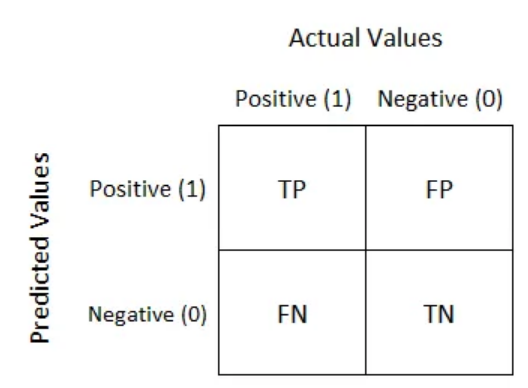

In [ ]:
#Confusion Matrix is a performance measurement for machine learning classification problem
#where output can be two or more classes.
#It is a table with 4 different combinations of predicted and actual values.

Image(filename='image_IDX/confusion matrix.png', width= 300)

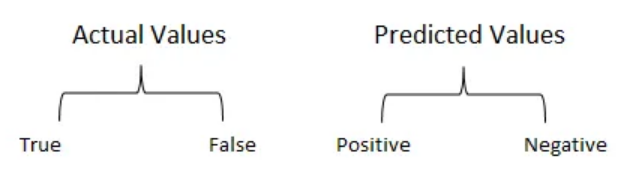

In [ ]:
#We describe predicted values as Positive and Negative and actual values as True and False.

Image(filename='image_IDX/actual and predict value.png', width= 300)

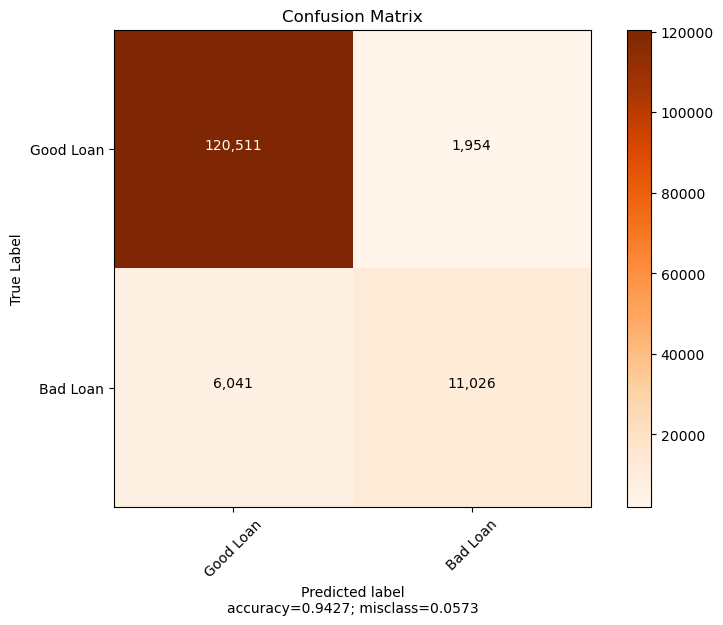

In [ ]:
#confusion matrix
c_matrix = confusion_matrix(y_true= y_test, y_pred= y_pred_class)
target_names = ['Good Loan','Bad Loan']

plot_confusion_matrix(c_matrix,
                          target_names,
                          title = 'Confusion Matrix',
                          cmap= None,
                          normalize= False)

**Insight :**
- In the first column, the total samples in the **positive class** are 120,511 + 6,041 = 126,552
- In the second column, the total samples in the **negative class**, are 1,954 + 11,026 = 12,980
- The sum of the numbers in all the boxes gives the **total number of samples** evaluated 126,552 + 12,980 = 139,532
- The **correct classifications** are the diagonal elements of the matrix 120,511 for the positive class and 11,026 for the negative class
- 6,041 samples (bottom-left box) that were expected to be of the positive class were classified as the negative class by the model. So it is called **“False Negatives”** because the model predicted “negative,” which was wrong.
- 1,954 samples (top-right box) were expected to be of negative class but were classified as “positive” by the model. They are thus called **“False Positives”**
- **Accuracy rate**, which is the percentage of times a classifier is correct = 94.27%
- **Misclassification rate**, which is the percentage of times a classifier is incorrect = 5.73%

In [ ]:
#check the total number of samples
y_test.shape

(139532,)

#### Hyperparameter

**Penalty**
- The **"penalty"** parameter in a logistic regression model refers to a parameter used in some types of regularized logistic regression algorithms, such as **L1 (Lasso) and L2 (Ridge) regularization**.
- This parameter determines the strength of the regularization term in the regression model, which helps to prevent overfitting.
- In a logistic regression model, overfitting can occur when the model is too complex and fits the noise in the data.
- This can result in poor generalization performance when the model is applied to new, unseen data.
- The regularization term in a logistic regression model **adds a penalty** to the model's coefficients, which reduces their magnitude and helps **to prevent overfitting**
- A higher value of the penalty parameter results in stronger regularization and a simpler model, while a lower value results in weaker regularization and a more complex model.
- the penalty parameter in a logistic regression model is used to control the trade-off between model complexity and overfitting, and is a crucial parameter in achieving optimal model performance.

**Regularization :**
- If all training points are correctly classified then we have problem of **overfitting (means doing perfect job on training set but performing very badly on test set, i.e. errors on train data is almost zero but errors on test data are very high).**
- Regularization is a technique used to prevent overfitting problem.
- The regression model which uses L1 regularization is called Lasso Regression and model which uses L2 is known as Ridge Regression.
- If we use **L1 regularization** in Logistic Regression all the Less important features will become zero. If we use **L2 regularization** then the wi values will become small but not necessarily zero.
- If hyper parameter(Λ) is 0 then there is no regularization term then it will overfit and if hyper parameter(Λ) is very large then it will add too much weight which leads to underfit.
- If **L1-ratio = 0**, we have ridge regression. This means that we can treat our model as a ridge regression model
- If **L1-ratio = 1**, we have lasso regression. Then we can solve it with the same ways we would use to solve lasso regression.
- **Elastic net** is a combination of the regularized variants of linear regression: ridge and lasso.

**Parameter VS Hyperparameter**
- People will often refer to all the arguments to a function as "parameters".
- In machine learning, C is referred to as a "hyperparameter".
- The parameters are numbers that tells the model what to do with the features, while hyperparameters tell the model how to choose parameters.
- Regularization generally refers the concept that there should be a complexity penalty for more extreme parameters.
- The idea is that just looking at the training data and not paying attention to how extreme one's parameters are leads to overfitting.
- A high value of C tells the model to give high weight to the training data, and a lower weight to the complexity penalty.
- A low value tells the model to give more weight to this complexity penalty at the expense of fitting to the training data.
- Basically, a high C means "Trust this training data a lot", while a low value says "This data may not be fully representative of the real world data, so if it's telling you to make a parameter really large, don't listen to it".

In [ ]:
#penalty and C
param = {'penalty':['None', 'l2', 'l1', 'elasticnet'],
        'C': [float(x) for x in np.linspace(start=0, stop=1, num=75)]}

logreg = LogisticRegression()

#RandomizedSearchCV randomly passes the set of hyperparameters and
#calculate the score and gives the best set of hyperparameters which gives the best score as an output.
logreg_clf = RandomizedSearchCV(estimator= logreg,
                                param_distributions = param,
                                scoring= 'roc_auc',
                                cv=5,
                                random_state =42)

search_logreg = logreg_clf.fit(x_smote, y_smote)

#best parameter
search_logreg.best_params_

{'penalty': 'l2', 'C': 0.02702702702702703}

**Insight:**  
- The “C” hyperparameter controls the strength of the regularization.
- A smaller value for “C” (e.g. C=0.01) leads to stronger regularization and a simpler model,
- while a larger value (e.g. C=1.0) leads to weaker regularization and a more complex model.
- Best parameter we've got is L2 (Ridge) regularization with 'C' is 0.027 which is near to 0, and leads to stronger regularization and a simpler model

### Retrain with Best Hyperparameter Tuning

In [ ]:
#best parameter
best_params = search_logreg.best_params_

#logistic regression
logreg_tuning = LogisticRegression(**best_params)

#fitting is equal to training
#It finds the coefficients for the equation specified via the algorithm being used
logreg_tuning.fit(x_smote, y_smote)

#after trained, the model can be used to make predictions
#predict_proba function will return the probabilities of a classification label
y_train_pred_proba = logreg_tuning.predict_proba(x_train)[:][:,1]
y_test_pred_lr_proba = logreg_tuning.predict_proba(x_test)[:][:,1]

#AUC - ROC curve is a performance measurement for the classification problems at various threshold settings
print('AUC train probability: ', roc_auc_score(y_true= y_train , y_score= y_train_pred_proba))
print('AUC test probability: ', roc_auc_score(y_true= y_test , y_score= y_test_pred_lr_proba))

AUC train probability:  0.928890974752696
AUC test probability:  0.9299651732948975


**Conclusion :**
- From the result of AUC train & test probability which is 0.9 near to 1, so we've got excellent model

In [ ]:
#classification report
y_pred_class_2 = []

for i in y_test_pred_lr_proba:
    if i > 0.5:
        y_pred_class_2.append(1)
    else:
        y_pred_class_2.append(0)

print(classification_report(y_true = y_test, y_pred= y_pred_class_2))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97    122465
           1       0.84      0.64      0.72     17067

    accuracy                           0.94    139532
   macro avg       0.90      0.81      0.85    139532
weighted avg       0.94      0.94      0.94    139532



**Conclusion**
- **Precision** :Out of all the loan status that the model predicted would get good loan, only 84% actually did.
- **Recall**: Out of all the loan status that actually did get good loan, the model only predicted this outcome correctly for 64% of those loan status
- **F1 Score** = 0.72 > 0.7. The model does a good job of predicting whether the loan status is considered good or bad

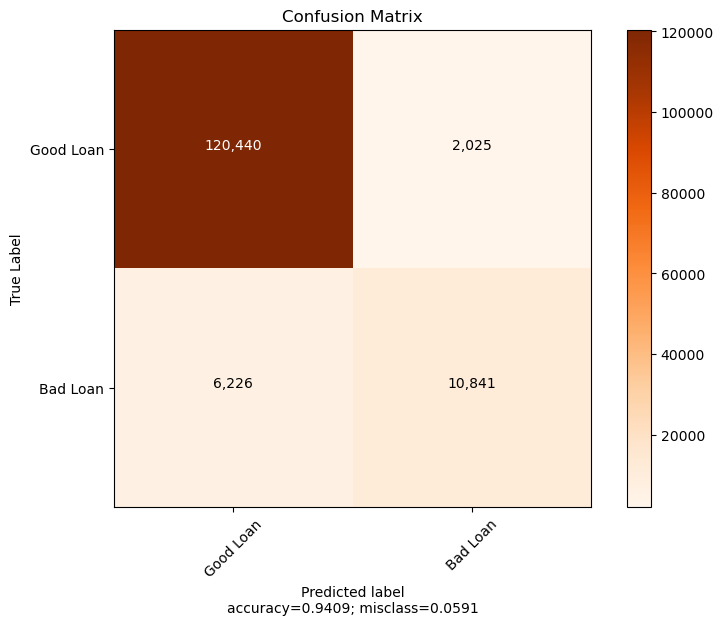

In [ ]:
#confusion matrix
c_matrix = confusion_matrix(y_true= y_test, y_pred= y_pred_class_2)
target_names = ['Good Loan','Bad Loan']

plot_confusion_matrix(c_matrix,
                          target_names,
                          title = 'Confusion Matrix',
                          cmap= None,
                          normalize= False)

**Insight :**
- In the first column, the total samples in the **positive class** are 120,440 + 6,226 = 126,666
- In the second column, the total samples in the **negative class**, are 2,025 + 10,841 = 12,866
- The sum of the numbers in all the boxes gives the **total number of samples** evaluated 126,666 + 12,866 = 139,532
- The **correct classifications** are the diagonal elements of the matrix 120,440 for the positive class and 10,841 for the negative class
- 6,226 samples (bottom-left box) that were expected to be of the positive class were classified as the negative class by the model. So it is called **“False Negatives”** because the model predicted “negative,” which was wrong.
- 2,025 samples (top-right box) were expected to be of negative class but were classified as “positive” by the model. They are thus called **“False Positives”**
- **Accuracy rate**, which is the percentage of times a classifier is correct = 94.09%
- **Misclassification rate**, which is the percentage of times a classifier is incorrect = 5.91%

### Show Coefficient Value Each Feature with Statsmodel Logistic Regression

In [ ]:
import statsmodels.api as sm

#before we fit the model, we need to use the sm.add_constant(X) function,
#which adds a column of constants to the X dataframe, before passing that into the Logit() function.
#This is a structural requirement so that the Logit() estimation can be performed properly.
x2 = sm.add_constant(x_smote)

#Statsmodels provides a Logit() function for performing logistic regression.
est = sm.Logit(endog= y_smote ,exog= x2)

#model that fits the data well if the differences between the observed values and the model's predicted values are small and unbiased
#model fitting is a measure of how well a machine learning model generalizes to similar data to that on which it was trained.
#model that is well-fitted produces more accurate outcomes.
#model that is overfitted matches the data too closely.
#model that is underfitted doesn’t match closely enough.
#sklearn fit method uses the training data as an input to train the machine learning model.
#The ‘fit’ method trains the algorithm on the training data, after the model is initialized.
#Broyden, Fletcher, Goldfarb, and Shanno, or BFGS Algorithm algorithms for numerical optimization and
#BFGS is commonly used to fit machine learning algorithms such as the logistic regression algorithm.
est2 = est.fit(method= 'bfgs')
print(est2.summary())

         Current function value: 0.172943
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


C:\Users\nurahman\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:               570982
Model:                          Logit   Df Residuals:                   570857
Method:                           MLE   Df Model:                          124
Date:                Thu, 23 Nov 2023   Pseudo R-squ.:                  0.7505
Time:                        17:40:05   Log-Likelihood:                -98747.
converged:                      False   LL-Null:                   -3.9577e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
home_ownership_MORTGAGE               -0.2864      0.032     -8.835      0.000      -0.350      -0.223
home_ownership_OTHER                   0.0128      0.244   

**Insight :**  
- Logistic Regression, like binary and multinomial logistic regression, uses maximum likelihood estimation, which is an iterative procedure, and we had 35 iteration.
- Variabel dependen (terikat / Y) adalah variabel yang dipengaruhi atau yang menjadi akibat karena adanya variabel bebas (variabel independent / bebas / X).
- dependent variable = target(loan_status)
- independent variable = home_ownership, purpose, emp_length, grade, loan_amnt, dti, int_rate, open_acc, total_acc, total_pymnt, credit_pull_year, revol_bal, revol_util, last_pymnt_amnt, pymnt_time, annual_inc, term, initial_list_status

**Coef**  
- These are the values for the logistic regression equation for predicting the dependent variable from the independent variable. They are in log-odds units.

- The **prediction equation** is:  
log(p/1-p) = b0 + (b1 * home_ownership_MORTGAGE) + (b2 * home_ownership_OTHER) + ..... + (bn * initial_list_status)

- Where **p** is the probability. Expressed in terms of the variables used in this example, **the logistic regression equation** is :  
log(p/1-p) = (-0.2864 * home_ownership_MORTGAGE) + (0.0128 * home_ownership_OTHER) + ..... + (12.0088 * initial_list_status)

- Because these coefficients are in log-odds units, they are often **difficult to interpret**, so they are often converted into **odds ratios**


**These estimates tell the amount of increase in the predicted log odds of loan status = 1 that would be predicted by a 1 unit increase in the predictor, holding all other predictors constant.**   

For example :  
home_ownership_MORTGAGE – The coefficient (or parameter estimate) for the variable home_ownership_MORTGAGE is 0.0128.  This means that for a one-unit increase in home_ownership_MORTGAGE, we expect a 0.0128 increase in the log-odds of the dependent variable loan_status, holding all other independent variables constant.


In [ ]:
#converting statsmodel summary object to Pandas Dataframe
df_importance = pd.read_html(est2.summary().tables[1].as_html(),
                             header = 0,
                             index_col =0)[0]
#find odds ratio
for i in df_importance['coef']:
    if i == 0:
        df_importance['odds_ratio']==0
    else:
        df_importance['odds_ratio'] = np.exp(df_importance['coef'])

#show probability contribution
#filtering only ['P>|z|'] <= 0.05
#['P>|z|'] provide the z-value and 2-tailed p-value used in testing the null hypothesis that the coefficient (parameter) is 0.
#alpha is 0.05, coefficients having a p-value of 0.05 or less would be statistically significant
#i.e, we can reject the null hypothesis and say that the coefficient is significantly different from 0
df_importance[df_importance['P>|z|'] <= 0.05].sort_values('odds_ratio', ascending= False)

coef  std err        z  P>|z|  [0.025  \
initial_list_status                 12.0088    0.068  176.700  0.000  11.876   
last_pymnt_amnt(0,500)               2.4836    0.032   78.275  0.000   2.421   
last_pymnt_amnt(500,1000)            2.2748    0.033   69.576  0.000   2.211   
total_pymnt_(-57.778, 5777.758]      2.0118    0.032   62.110  0.000   1.948   
last_pymnt_amnt(1000,1500)           1.5542    0.046   33.576  0.000   1.463   
annual_inc(mid_income)               1.4508    0.031   46.640  0.000   1.390   
loan_amnt_(31550.0, 35000.0]         1.2722    0.047   26.910  0.000   1.180   
annual_inc(low_income)               1.1320    0.032   35.903  0.000   1.070   
grade_F                              0.7873    0.067   11.834  0.000   0.657   
total_acc_(0.845, 23.143]            0.7377    0.032   22.932  0.000   0.675   
grade_G                              0.6748    0.098    6.893  0.000   0.483   
grade_E                              0.4974    0.046   10.707  0.000   0.406   
int_rate_(23.996, 26.06]             0.4150    0.077    5.405  0.000   0.265   
total_acc_(23.143, 45.286]           0.4130    0.032   13.018  0.000   0.351   
loan_amnt_(28100.0, 31550.0]         0.2372    0.052    4.577  0.000   0.136   
credit_pull_year_(0.954, 5.6]        0.2371    0.086    2.771  0.006   0.069   
open_acc_(-0.084, 8.4]               0.1735    0.033    5.216  0.000   0.108   
open_acc_(8.4, 16.8]                -0.0666    0.031   -2.124  0.034  -0.128   
grade_D                             -0.1223    0.038   -3.188  0.001  -0.198   
annual_inc(high_income)             -0.1757    0.085   -2.067  0.039  -0.342   
total_pymnt_(5777.758, 11555.516]   -0.2202    0.029   -7.564  0.000  -0.277   
total_acc_(45.286, 67.429]          -0.2223    0.047   -4.684  0.000  -0.315   
int_rate_(15.74, 17.804]            -0.2757    0.035   -7.852  0.000  -0.345   
home_ownership_MORTGAGE             -0.2864    0.032   -8.835  0.000  -0.350   
loan_amnt_(24650.0, 28100.0]        -0.3529    0.043   -8.177  0.000  -0.437   
purpose_house                       -0.3618    0.100   -3.629  0.000  -0.557   
open_acc_(16.8, 25.2]               -0.3716    0.037   -9.928  0.000  -0.445   
open_acc_(25.2, 33.6]               -0.3962    0.082   -4.804  0.000  -0.558   
loan_amnt_(21200.0, 24650.0]        -0.4247    0.043   -9.770  0.000  -0.510   
home_ownership_RENT                 -0.4314    0.032  -13.274  0.000  -0.495   
int_rate_(19.868, 21.932]           -0.4663    0.050   -9.386  0.000  -0.564   
loan_amnt_(17750.0, 21200.0]        -0.4705    0.034  -13.754  0.000  -0.538   
credit_pull_year_(42.4, 47.0]       -0.4949    0.089   -5.557  0.000  -0.669   
purpose_small_business              -0.5232    0.055   -9.442  0.000  -0.632   
total_pymnt_(11555.516, 17333.274]  -0.5241    0.032  -16.349  0.000  -0.587   
int_rate_(17.804, 19.868]           -0.5455    0.039  -13.945  0.000  -0.622   
purpose_debt_consolidation          -0.5676    0.028  -20.075  0.000  -0.623   
purpose_wedding                     -0.6601    0.093   -7.109  0.000  -0.842   
purpose_vacation                    -0.6862    0.089   -7.696  0.000  -0.861   
total_pymnt_(40444.306, 46222.064]  -0.6866    0.131   -5.244  0.000  -0.943   
purpose_moving                      -0.7227    0.080   -9.058  0.000  -0.879   
purpose_credit_card                 -0.7333    0.031  -23.439  0.000  -0.795   
revol_bal(>15000)                   -0.7378    0.033  -22.210  0.000  -0.803   
revol_bal(0,5000)                   -0.7518    0.036  -20.909  0.000  -0.822   
dti_(35.991, 39.99]                 -0.7639    0.070  -10.990  0.000  -0.900   
pymnt_time(6,12)                    -0.7801    0.039  -19.903  0.000  -0.857   
int_rate_(13.676, 15.74]            -0.8166    0.034  -24.196  0.000  -0.883   
purpose_medical                     -0.9231    0.071  -12.973  0.000  -1.063   
pymnt_time(>12)                     -0.9360    0.037  -25.617  0.000  -1.008   
int_rate_(7.484, 9.548]             -0.

**Odds ratio in Logistic Regression**  
- Probabilities range between 0 and 1
- for mid_income, the odds of being good loans are 4.23 times as large as the odds for low and high income being good loans.

In [ ]:
#if we display ['P>|z|'] > 0.05, we can see that coef is equal to 0, and accept null hypothesis
df_importance[df_importance['P>|z|'] > 0.05].sort_values('odds_ratio', ascending= False)

coef      std err         z  P>|z|  \
int_rate_(21.932, 23.996]           0.0638        0.056  1.141000  0.254   
home_ownership_OTHER                0.0128        0.244  0.052000  0.958   
open_acc_(75.6, 84.0]               0.0004        2.578  0.000000  1.000   
open_acc_(58.8, 67.2]               0.0000  2850000.000  0.000000  1.000   
open_acc_(67.2, 75.6]              -0.0002       10.865 -0.000017  1.000   
total_acc_(133.857, 156.0]         -0.0002        3.090 -0.000075  1.000   
total_acc_(111.714, 133.857]       -0.0025        1.547 -0.002000  0.999   
open_acc_(50.4, 58.8]              -0.0033        1.236 -0.003000  0.998   
total_acc_(89.571, 111.714]        -0.0047        0.798 -0.006000  0.995   
open_acc_(42.0, 50.4]              -0.0114        0.546 -0.021000  0.983   
total_pymnt_(51999.822, 57777.58]  -0.0151        1.414 -0.011000  0.991   
purpose_educational                -0.0172        0.154 -0.111000  0.911   
open_acc_(33.6, 42.0]              -0.0857        0.183 -0.467000  0.640   
total_acc_(67.429, 89.571]         -0.0886        0.203 -0.436000  0.663   
purpose_renewable_energy           -0.0967        0.209 -0.462000  0.644   
total_pymnt_(46222.064, 51999.822] -0.1816        0.303 -0.598000  0.550   

                                         [0.025       0.975]  odds_ratio  
int_rate_(21.932, 23.996]                -0.046        0.173    1.065879  
home_ownership_OTHER                     -0.466        0.492    1.012882  
open_acc_(75.6, 84.0]                    -5.052        5.053    1.000400  
open_acc_(58.8, 67.2]              -5580000.000  5580000.000    1.000000  
open_acc_(67.2, 75.6]                   -21.295       21.295    0.999800  
total_acc_(133.857, 156.0]               -6.056        6.055    0.999800  
total_acc_(111.714, 133.857]             -3.035        3.030    0.997503  
open_acc_(50.4, 58.8]                    -2.425        2.419    0.996705  
total_acc_(89.571, 111.714]              -1.568        1.559    0.995311  
open_acc_(42.0, 50.4]                    -1.081        1.058    0.988665  
total_pymnt_(51999.822, 57777.58]        -2.786        2.756    0.985013  
purpose_educational                      -0.320        0.286    0.982947  
open_acc_(33.6, 42.0]                    -0.445        0.274    0.917870  
total_acc_(67.429, 89.571]               -0.487        0.309    0.915212  
purpose_renewable_energy                 -0.507        0.313    0.907828  
total_pymnt_(46222.064, 51999.822]       -0.776        0.413    0.833935

### ROC Curve

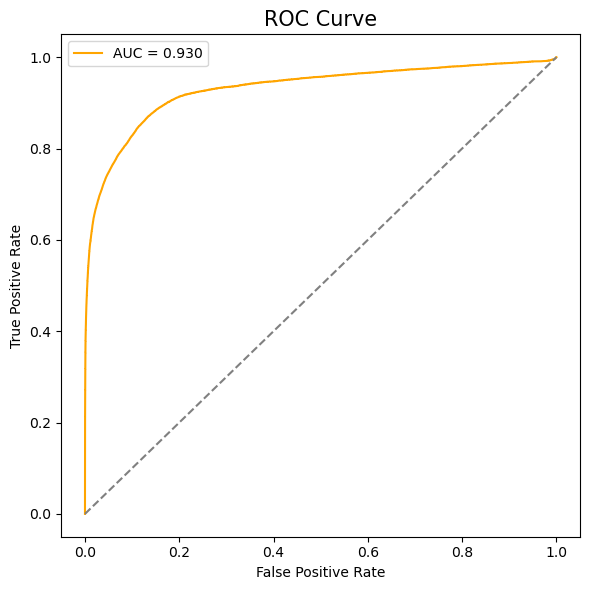

In [ ]:
#false & true positive rate
fpr, tpr, tr = roc_curve(y_true= y_test, y_score= y_test_pred_lr_proba)

#roc auc score
auc = roc_auc_score(y_true= y_test, y_score= y_test_pred_lr_proba)

#plot ROC Curve
plt.figure(figsize=(6,6))
plt.plot(fpr,tpr, label= f'AUC = {auc:.3f}', color='orange')
plt.plot(fpr,fpr, linestyle = '--', color='grey')
plt.xlabel('False Positive Rate', fontsize=10)
plt.ylabel('True Positive Rate', fontsize=10)
plt.title('ROC Curve', fontsize=15)
plt.legend()
plt.tight_layout()

**Insight :**  
- The ROC curve shows the performance of a binary classifier, which plots the True Positive rate (TPR) against the False Positive rate (FPR).
- The ROC AUC score is the area under the ROC curve. It sums up how well a model can produce relative scores to discriminate between positive or negative instances across all classification thresholds.
- The ROC AUC score ranges from 0 to 1, where 0.5 indicates random guessing, and 1 indicates perfect performance.
- From the plot, we've got AUC score = 0.93, which is near to 1, indicates good performance.

### Kolmogorov-Smirnov

<Axes: title={'center': 'KS Statistic Plot'}, xlabel='Threshold', ylabel='Percentage below threshold'>

<Figure size 700x500 with 0 Axes>

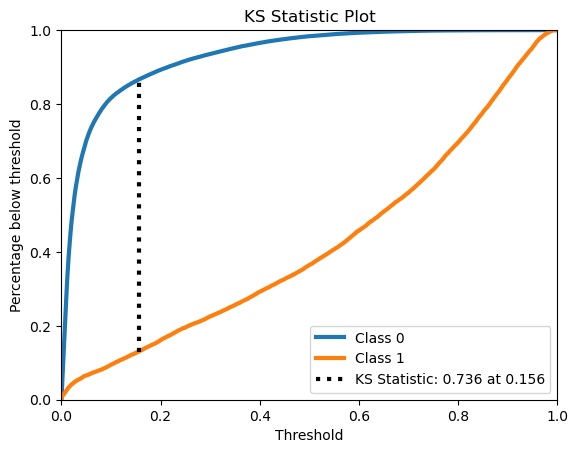

In [ ]:
import scikitplot as skplt

#logistic regression with best parameter
#predict_proba = probability estimates
y_pred_proba = logreg_tuning.predict_proba(x_test)

#plot kolmogorov smirnov
plt.figure(figsize=(7,5))
skplt.metrics.plot_ks_statistic(y_test, y_pred_proba)

**Insight:**  
- Even if ROC AUC is the most widespread metric for class separation, but it is also good to plot Kolmogorov Smirvov to know how well the model separates the predictions of the two different classes
- the ROC AUC score goes from 0.5 to 1.0, while KS statistics range from 0.0 to 1.0.
- K-S should be a high value (Max =1.0) when the fit is good and a low value (Min = 0.0) when the fit is not good.
- From the plot, we've got KS Statistic = 0.736, so we considered it as 'medium' dataset, which mean even though it doesn't have perfect separation, but there is enough overlap to confuse the classifier, and has wide gap between the class CDF (positive & negative instances).

### Score Card

In [ ]:
#reset index data statsmodel summary object
df_importance = df_importance.reset_index()

In [ ]:
df_importance.head()

index    coef  std err       z  P>|z|  [0.025  0.975]  \
0  home_ownership_MORTGAGE -0.2864    0.032  -8.835  0.000  -0.350  -0.223   
1     home_ownership_OTHER  0.0128    0.244   0.052  0.958  -0.466   0.492   
2       home_ownership_OWN -1.2657    0.040 -31.452  0.000  -1.345  -1.187   
3      home_ownership_RENT -0.4314    0.032 -13.274  0.000  -0.495  -0.368   
4              purpose_car -1.1183    0.074 -15.099  0.000  -1.263  -0.973   

   odds_ratio  
0    0.750962  
1    1.012882  
2    0.282042  
3    0.649599  
4    0.326835

In [ ]:
#rename column
df_importance = df_importance.rename(columns = {'index':'feature'})

In [ ]:
df_importance.head(2)

feature    coef  std err      z  P>|z|  [0.025  0.975]  \
0  home_ownership_MORTGAGE -0.2864    0.032 -8.835  0.000  -0.350  -0.223   
1     home_ownership_OTHER  0.0128    0.244  0.052  0.958  -0.466   0.492   

   odds_ratio  
0    0.750962  
1    1.012882

In [ ]:
#create new column
df_importance['feature_name'] = df_importance['feature'].str.split('_').str[:-1]
df_importance['feature_name'] = df_importance['feature_name'].str.join('_')

In [ ]:
df_importance

feature     coef      std err           z  \
0               home_ownership_MORTGAGE  -0.2864        0.032   -8.835000   
1                  home_ownership_OTHER   0.0128        0.244    0.052000   
2                    home_ownership_OWN  -1.2657        0.040  -31.452000   
3                   home_ownership_RENT  -0.4314        0.032  -13.274000   
4                           purpose_car  -1.1183        0.074  -15.099000   
5                   purpose_credit_card  -0.7333        0.031  -23.439000   
6            purpose_debt_consolidation  -0.5676        0.028  -20.075000   
7                   purpose_educational  -0.0172        0.154   -0.111000   
8              purpose_home_improvement  -1.4684        0.043  -34.495000   
9                         purpose_house  -0.3618        0.100   -3.629000   
10               purpose_major_purchase  -1.5515        0.060  -26.023000   
11                      purpose_medical  -0.9231        0.071  -12.973000   
12                       purpose_moving  -0.7227        0.080   -9.058000   
13                        purpose_other  -1.4947        0.039  -38.003000   
14             purpose_renewable_energy  -0.0967        0.209   -0.462000   
15               purpose_small_business  -0.5232        0.055   -9.442000   
16                     purpose_vacation  -0.6862        0.089   -7.696000   
17                      purpose_wedding  -0.6601        0.093   -7.109000   
18                    emp_length_1 year  -2.3936        0.037  -64.655000   
19                 emp_length_10+ years  -2.2565        0.028  -81.147000   
20                   emp_length_2 years  -2.5110        0.034  -73.062000   
21                   emp_length_3 years  -2.6693        0.036  -74.394000   
22                   emp_length_4 years  -2.9396        0.039  -74.877000   
23                   emp_length_5 years  -2.6555        0.038  -70.517000   
24                   emp_length_6 years  -2.4952        0.039  -63.610000   
25                   emp_length_7 years  -2.5082        0.040  -63.119000   
26                   emp_length_8 years  -2.2823        0.041  -55.691000   
27                   emp_length_9 years  -2.1265        0.044  -48.065000   
28                  emp_length_< 1 year  -2.2228        0.035  -64.305000   
29                              grade_A  -2.3859        0.064  -37.225000   
30                              grade_B  -1.2356        0.041  -30.066000   
31                              grade_C  -1.0197        0.037  -27.660000   
32                              grade_D  -0.1223        0.038   -3.188000   
33                              grade_E   0.4974        0.046   10.707000   
34                              grade_F   0.7873        0.067   11.834000   
35                              grade_G   0.6748        0.098    6.893000   
36            loan_amnt_(465.5, 3950.0]  -5.5608        0.045 -122.635000   
37           loan_amnt_(3950.0, 7400.0]  -3.5754        0.038  -93.557000   
38          loan_amnt_(7400.0, 10850.0]  -2.7284        0.035  -77.693000   
39         loan_amnt_(10850.0, 14300.0]  -1.8289        0.035  -52.124000   
40         loan_amnt_(14300.0, 17750.0]  -1.0351        0.034  -30.643000   
41         loan_amnt_(17750.0, 21200.0]  -0.4705        0.034  -13.754000   
42         loan_amnt_(21200.0, 24650.0]  -0.4247        0.043   -9.770000   
43         loan_amnt_(24650.0, 28100.0]  -0.3529        0.043   -8.177000   
44         loan_amnt_(28100.0, 31550.0]   0.2372        0.052    4.577000   
45         loan_amnt_(31550.0, 35000.0]   1.2722        0.047   26.910000   
46                   dti_(-0.04, 3.999]  -1.7270        0.044  -38.953000   
47                   dti_(3.999, 7.998]  -2.8218        0.037  -76.929000   
48                  dti_(7.998, 11.997]  -2.5980        0.033  -79.727000   
49                 dti_(11.997, 15.996]  -2.3872        0.031  -77.011000   
50                 dti_(15.996, 19.995]  -2.3030        0.031  -75.084000   
51                 dti_(19.9

In [ ]:
#fix wrong feature_name
df_importance.at[124,'feature_name'] = 'term'
df_importance.at[125,'feature_name'] = 'initial_list_status'

In [ ]:
df_importance

feature     coef      std err           z  \
0               home_ownership_MORTGAGE  -0.2864        0.032   -8.835000   
1                  home_ownership_OTHER   0.0128        0.244    0.052000   
2                    home_ownership_OWN  -1.2657        0.040  -31.452000   
3                   home_ownership_RENT  -0.4314        0.032  -13.274000   
4                           purpose_car  -1.1183        0.074  -15.099000   
5                   purpose_credit_card  -0.7333        0.031  -23.439000   
6            purpose_debt_consolidation  -0.5676        0.028  -20.075000   
7                   purpose_educational  -0.0172        0.154   -0.111000   
8              purpose_home_improvement  -1.4684        0.043  -34.495000   
9                         purpose_house  -0.3618        0.100   -3.629000   
10               purpose_major_purchase  -1.5515        0.060  -26.023000   
11                      purpose_medical  -0.9231        0.071  -12.973000   
12                       purpose_moving  -0.7227        0.080   -9.058000   
13                        purpose_other  -1.4947        0.039  -38.003000   
14             purpose_renewable_energy  -0.0967        0.209   -0.462000   
15               purpose_small_business  -0.5232        0.055   -9.442000   
16                     purpose_vacation  -0.6862        0.089   -7.696000   
17                      purpose_wedding  -0.6601        0.093   -7.109000   
18                    emp_length_1 year  -2.3936        0.037  -64.655000   
19                 emp_length_10+ years  -2.2565        0.028  -81.147000   
20                   emp_length_2 years  -2.5110        0.034  -73.062000   
21                   emp_length_3 years  -2.6693        0.036  -74.394000   
22                   emp_length_4 years  -2.9396        0.039  -74.877000   
23                   emp_length_5 years  -2.6555        0.038  -70.517000   
24                   emp_length_6 years  -2.4952        0.039  -63.610000   
25                   emp_length_7 years  -2.5082        0.040  -63.119000   
26                   emp_length_8 years  -2.2823        0.041  -55.691000   
27                   emp_length_9 years  -2.1265        0.044  -48.065000   
28                  emp_length_< 1 year  -2.2228        0.035  -64.305000   
29                              grade_A  -2.3859        0.064  -37.225000   
30                              grade_B  -1.2356        0.041  -30.066000   
31                              grade_C  -1.0197        0.037  -27.660000   
32                              grade_D  -0.1223        0.038   -3.188000   
33                              grade_E   0.4974        0.046   10.707000   
34                              grade_F   0.7873        0.067   11.834000   
35                              grade_G   0.6748        0.098    6.893000   
36            loan_amnt_(465.5, 3950.0]  -5.5608        0.045 -122.635000   
37           loan_amnt_(3950.0, 7400.0]  -3.5754        0.038  -93.557000   
38          loan_amnt_(7400.0, 10850.0]  -2.7284        0.035  -77.693000   
39         loan_amnt_(10850.0, 14300.0]  -1.8289        0.035  -52.124000   
40         loan_amnt_(14300.0, 17750.0]  -1.0351        0.034  -30.643000   
41         loan_amnt_(17750.0, 21200.0]  -0.4705        0.034  -13.754000   
42         loan_amnt_(21200.0, 24650.0]  -0.4247        0.043   -9.770000   
43         loan_amnt_(24650.0, 28100.0]  -0.3529        0.043   -8.177000   
44         loan_amnt_(28100.0, 31550.0]   0.2372        0.052    4.577000   
45         loan_amnt_(31550.0, 35000.0]   1.2722        0.047   26.910000   
46                   dti_(-0.04, 3.999]  -1.7270        0.044  -38.953000   
47                   dti_(3.999, 7.998]  -2.8218        0.037  -76.929000   
48                  dti_(7.998, 11.997]  -2.5980        0.033  -79.727000   
49                 dti_(11.997, 15.996]  -2.3872        0.031  -77.011000   
50                 dti_(15.996, 19.995]  -2.3030        0.031  -75.084000   
51                 dti_(19.9

In [ ]:
#copy dataset
df_scorecard = df_importance.copy()

In [ ]:
#define min and max score according to FICO
min_score = 300
max_score = 850

In [ ]:
#group by sum of minimum
min_sum_coef = df_scorecard.groupby('feature_name')['coef'].min().sum()

#group by sum of maximum
max_sum_coef = df_scorecard.groupby('feature_name')['coef'].max().sum()

#calculate credit score
df_scorecard['score_calculation'] = ((df_scorecard['coef']) * (max_score - min_score) / (max_sum_coef - min_sum_coef)).round(3)

In [ ]:
df_scorecard

feature     coef      std err           z  \
0               home_ownership_MORTGAGE  -0.2864        0.032   -8.835000   
1                  home_ownership_OTHER   0.0128        0.244    0.052000   
2                    home_ownership_OWN  -1.2657        0.040  -31.452000   
3                   home_ownership_RENT  -0.4314        0.032  -13.274000   
4                           purpose_car  -1.1183        0.074  -15.099000   
5                   purpose_credit_card  -0.7333        0.031  -23.439000   
6            purpose_debt_consolidation  -0.5676        0.028  -20.075000   
7                   purpose_educational  -0.0172        0.154   -0.111000   
8              purpose_home_improvement  -1.4684        0.043  -34.495000   
9                         purpose_house  -0.3618        0.100   -3.629000   
10               purpose_major_purchase  -1.5515        0.060  -26.023000   
11                      purpose_medical  -0.9231        0.071  -12.973000   
12                       purpose_moving  -0.7227        0.080   -9.058000   
13                        purpose_other  -1.4947        0.039  -38.003000   
14             purpose_renewable_energy  -0.0967        0.209   -0.462000   
15               purpose_small_business  -0.5232        0.055   -9.442000   
16                     purpose_vacation  -0.6862        0.089   -7.696000   
17                      purpose_wedding  -0.6601        0.093   -7.109000   
18                    emp_length_1 year  -2.3936        0.037  -64.655000   
19                 emp_length_10+ years  -2.2565        0.028  -81.147000   
20                   emp_length_2 years  -2.5110        0.034  -73.062000   
21                   emp_length_3 years  -2.6693        0.036  -74.394000   
22                   emp_length_4 years  -2.9396        0.039  -74.877000   
23                   emp_length_5 years  -2.6555        0.038  -70.517000   
24                   emp_length_6 years  -2.4952        0.039  -63.610000   
25                   emp_length_7 years  -2.5082        0.040  -63.119000   
26                   emp_length_8 years  -2.2823        0.041  -55.691000   
27                   emp_length_9 years  -2.1265        0.044  -48.065000   
28                  emp_length_< 1 year  -2.2228        0.035  -64.305000   
29                              grade_A  -2.3859        0.064  -37.225000   
30                              grade_B  -1.2356        0.041  -30.066000   
31                              grade_C  -1.0197        0.037  -27.660000   
32                              grade_D  -0.1223        0.038   -3.188000   
33                              grade_E   0.4974        0.046   10.707000   
34                              grade_F   0.7873        0.067   11.834000   
35                              grade_G   0.6748        0.098    6.893000   
36            loan_amnt_(465.5, 3950.0]  -5.5608        0.045 -122.635000   
37           loan_amnt_(3950.0, 7400.0]  -3.5754        0.038  -93.557000   
38          loan_amnt_(7400.0, 10850.0]  -2.7284        0.035  -77.693000   
39         loan_amnt_(10850.0, 14300.0]  -1.8289        0.035  -52.124000   
40         loan_amnt_(14300.0, 17750.0]  -1.0351        0.034  -30.643000   
41         loan_amnt_(17750.0, 21200.0]  -0.4705        0.034  -13.754000   
42         loan_amnt_(21200.0, 24650.0]  -0.4247        0.043   -9.770000   
43         loan_amnt_(24650.0, 28100.0]  -0.3529        0.043   -8.177000   
44         loan_amnt_(28100.0, 31550.0]   0.2372        0.052    4.577000   
45         loan_amnt_(31550.0, 35000.0]   1.2722        0.047   26.910000   
46                   dti_(-0.04, 3.999]  -1.7270        0.044  -38.953000   
47                   dti_(3.999, 7.998]  -2.8218        0.037  -76.929000   
48                  dti_(7.998, 11.997]  -2.5980        0.033  -79.727000   
49                 dti_(11.997, 15.996]  -2.3872        0.031  -77.011000   
50                 dti_(15.996, 19.995]  -2.3030        0.031  -75.084000   
51                 dti_(19.9

In [ ]:
#fix wrong row
df_scorecard.at[121,'feature_name'] = 'annual_inc'
df_scorecard.at[122,'feature_name'] = 'annual_inc'
df_scorecard.at[123,'feature_name'] = 'annual_inc'

In [ ]:
df_scorecard

feature     coef      std err           z  \
0               home_ownership_MORTGAGE  -0.2864        0.032   -8.835000   
1                  home_ownership_OTHER   0.0128        0.244    0.052000   
2                    home_ownership_OWN  -1.2657        0.040  -31.452000   
3                   home_ownership_RENT  -0.4314        0.032  -13.274000   
4                           purpose_car  -1.1183        0.074  -15.099000   
5                   purpose_credit_card  -0.7333        0.031  -23.439000   
6            purpose_debt_consolidation  -0.5676        0.028  -20.075000   
7                   purpose_educational  -0.0172        0.154   -0.111000   
8              purpose_home_improvement  -1.4684        0.043  -34.495000   
9                         purpose_house  -0.3618        0.100   -3.629000   
10               purpose_major_purchase  -1.5515        0.060  -26.023000   
11                      purpose_medical  -0.9231        0.071  -12.973000   
12                       purpose_moving  -0.7227        0.080   -9.058000   
13                        purpose_other  -1.4947        0.039  -38.003000   
14             purpose_renewable_energy  -0.0967        0.209   -0.462000   
15               purpose_small_business  -0.5232        0.055   -9.442000   
16                     purpose_vacation  -0.6862        0.089   -7.696000   
17                      purpose_wedding  -0.6601        0.093   -7.109000   
18                    emp_length_1 year  -2.3936        0.037  -64.655000   
19                 emp_length_10+ years  -2.2565        0.028  -81.147000   
20                   emp_length_2 years  -2.5110        0.034  -73.062000   
21                   emp_length_3 years  -2.6693        0.036  -74.394000   
22                   emp_length_4 years  -2.9396        0.039  -74.877000   
23                   emp_length_5 years  -2.6555        0.038  -70.517000   
24                   emp_length_6 years  -2.4952        0.039  -63.610000   
25                   emp_length_7 years  -2.5082        0.040  -63.119000   
26                   emp_length_8 years  -2.2823        0.041  -55.691000   
27                   emp_length_9 years  -2.1265        0.044  -48.065000   
28                  emp_length_< 1 year  -2.2228        0.035  -64.305000   
29                              grade_A  -2.3859        0.064  -37.225000   
30                              grade_B  -1.2356        0.041  -30.066000   
31                              grade_C  -1.0197        0.037  -27.660000   
32                              grade_D  -0.1223        0.038   -3.188000   
33                              grade_E   0.4974        0.046   10.707000   
34                              grade_F   0.7873        0.067   11.834000   
35                              grade_G   0.6748        0.098    6.893000   
36            loan_amnt_(465.5, 3950.0]  -5.5608        0.045 -122.635000   
37           loan_amnt_(3950.0, 7400.0]  -3.5754        0.038  -93.557000   
38          loan_amnt_(7400.0, 10850.0]  -2.7284        0.035  -77.693000   
39         loan_amnt_(10850.0, 14300.0]  -1.8289        0.035  -52.124000   
40         loan_amnt_(14300.0, 17750.0]  -1.0351        0.034  -30.643000   
41         loan_amnt_(17750.0, 21200.0]  -0.4705        0.034  -13.754000   
42         loan_amnt_(21200.0, 24650.0]  -0.4247        0.043   -9.770000   
43         loan_amnt_(24650.0, 28100.0]  -0.3529        0.043   -8.177000   
44         loan_amnt_(28100.0, 31550.0]   0.2372        0.052    4.577000   
45         loan_amnt_(31550.0, 35000.0]   1.2722        0.047   26.910000   
46                   dti_(-0.04, 3.999]  -1.7270        0.044  -38.953000   
47                   dti_(3.999, 7.998]  -2.8218        0.037  -76.929000   
48                  dti_(7.998, 11.997]  -2.5980        0.033  -79.727000   
49                 dti_(11.997, 15.996]  -2.3872        0.031  -77.011000   
50                 dti_(15.996, 19.995]  -2.3030        0.031  -75.084000   
51                 dti_(19.9

In [ ]:
#group by sum of minimum
min_sum_coef = df_scorecard.groupby('feature_name')['coef'].min().sum()

#group by sum of maximum
max_sum_coef = df_scorecard.groupby('feature_name')['coef'].max().sum()

#calculate credit score
df_scorecard['score_calculation'] = ((df_scorecard['coef']) * (max_score - min_score) / (max_sum_coef - min_sum_coef)).round(3)

In [ ]:
min_sum_score_pre1 = df_scorecard.groupby('feature_name')['score_calculation'].min().sum()
max_sum_score_pre1 = df_scorecard.groupby('feature_name')['score_calculation'].max().sum()

In [ ]:
print(min_sum_score_pre1)
print(max_sum_score_pre1)

-425.952
124.047


In [ ]:
min_sum_score_pre2 = df_scorecard.groupby('feature_name').agg({'score_calculation':['min','max']})

In [ ]:
min_sum_score_pre2 = min_sum_score_pre2.reset_index()

In [ ]:
min_sum_score_pre2

feature_name score_calculation         
                                      min      max
0            annual_inc            -2.088   17.237
1      credit_pull_year           -30.264    2.817
2                   dti           -33.527   -9.076
3            emp_length           -34.926  -25.266
4                 grade           -28.348    9.354
5        home_ownership           -15.038    0.152
6   initial_list_status           142.681  142.681
7              int_rate           -34.328    4.931
8            last_pymnt           -99.950   29.509
9             loan_amnt           -66.070   15.115
10             open_acc            -4.707    2.061
11              purpose           -17.759   -0.204
12       purpose_credit            -8.713   -8.713
13         purpose_debt            -6.744   -6.744
14         purpose_home           -17.447  -17.447
15        purpose_major           -18.434  -18.434
16    purpose_renewable            -1.149   -1.149
17        purpose_small            -6.216   -6.216
18                pymnt           -62.198   -9.269
19                revol           -25.193   -8.766
20                 term           -21.194  -21.194
21            total_acc            -2.641    8.765
22          total_pymnt           -31.699   23.903

In [ ]:
df_scorecard

feature     coef      std err           z  \
0               home_ownership_MORTGAGE  -0.2864        0.032   -8.835000   
1                  home_ownership_OTHER   0.0128        0.244    0.052000   
2                    home_ownership_OWN  -1.2657        0.040  -31.452000   
3                   home_ownership_RENT  -0.4314        0.032  -13.274000   
4                           purpose_car  -1.1183        0.074  -15.099000   
5                   purpose_credit_card  -0.7333        0.031  -23.439000   
6            purpose_debt_consolidation  -0.5676        0.028  -20.075000   
7                   purpose_educational  -0.0172        0.154   -0.111000   
8              purpose_home_improvement  -1.4684        0.043  -34.495000   
9                         purpose_house  -0.3618        0.100   -3.629000   
10               purpose_major_purchase  -1.5515        0.060  -26.023000   
11                      purpose_medical  -0.9231        0.071  -12.973000   
12                       purpose_moving  -0.7227        0.080   -9.058000   
13                        purpose_other  -1.4947        0.039  -38.003000   
14             purpose_renewable_energy  -0.0967        0.209   -0.462000   
15               purpose_small_business  -0.5232        0.055   -9.442000   
16                     purpose_vacation  -0.6862        0.089   -7.696000   
17                      purpose_wedding  -0.6601        0.093   -7.109000   
18                    emp_length_1 year  -2.3936        0.037  -64.655000   
19                 emp_length_10+ years  -2.2565        0.028  -81.147000   
20                   emp_length_2 years  -2.5110        0.034  -73.062000   
21                   emp_length_3 years  -2.6693        0.036  -74.394000   
22                   emp_length_4 years  -2.9396        0.039  -74.877000   
23                   emp_length_5 years  -2.6555        0.038  -70.517000   
24                   emp_length_6 years  -2.4952        0.039  -63.610000   
25                   emp_length_7 years  -2.5082        0.040  -63.119000   
26                   emp_length_8 years  -2.2823        0.041  -55.691000   
27                   emp_length_9 years  -2.1265        0.044  -48.065000   
28                  emp_length_< 1 year  -2.2228        0.035  -64.305000   
29                              grade_A  -2.3859        0.064  -37.225000   
30                              grade_B  -1.2356        0.041  -30.066000   
31                              grade_C  -1.0197        0.037  -27.660000   
32                              grade_D  -0.1223        0.038   -3.188000   
33                              grade_E   0.4974        0.046   10.707000   
34                              grade_F   0.7873        0.067   11.834000   
35                              grade_G   0.6748        0.098    6.893000   
36            loan_amnt_(465.5, 3950.0]  -5.5608        0.045 -122.635000   
37           loan_amnt_(3950.0, 7400.0]  -3.5754        0.038  -93.557000   
38          loan_amnt_(7400.0, 10850.0]  -2.7284        0.035  -77.693000   
39         loan_amnt_(10850.0, 14300.0]  -1.8289        0.035  -52.124000   
40         loan_amnt_(14300.0, 17750.0]  -1.0351        0.034  -30.643000   
41         loan_amnt_(17750.0, 21200.0]  -0.4705        0.034  -13.754000   
42         loan_amnt_(21200.0, 24650.0]  -0.4247        0.043   -9.770000   
43         loan_amnt_(24650.0, 28100.0]  -0.3529        0.043   -8.177000   
44         loan_amnt_(28100.0, 31550.0]   0.2372        0.052    4.577000   
45         loan_amnt_(31550.0, 35000.0]   1.2722        0.047   26.910000   
46                   dti_(-0.04, 3.999]  -1.7270        0.044  -38.953000   
47                   dti_(3.999, 7.998]  -2.8218        0.037  -76.929000   
48                  dti_(7.998, 11.997]  -2.5980        0.033  -79.727000   
49                 dti_(11.997, 15.996]  -2.3872        0.031  -77.011000   
50                 dti_(15.996, 19.995]  -2.3030        0.031  -75.084000   
51                 dti_(19.9

In [ ]:
#fix wrong row
df_scorecard.at[5,'feature_name'] = 'purpose'
df_scorecard.at[6,'feature_name'] = 'purpose'
df_scorecard.at[8,'feature_name'] = 'purpose'
df_scorecard.at[10,'feature_name'] = 'purpose'
df_scorecard.at[14,'feature_name'] = 'purpose'
df_scorecard.at[15,'feature_name'] = 'purpose'

In [ ]:
#group by sum of minimum
min_sum_coef = df_scorecard.groupby('feature_name')['coef'].min().sum()

#group by sum of maximum
max_sum_coef = df_scorecard.groupby('feature_name')['coef'].max().sum()

#calculate credit score
df_scorecard['score_calculation'] = ((df_scorecard['coef']) * (max_score - min_score) / (max_sum_coef - min_sum_coef)).round(3)

In [ ]:
min_sum_score_pre1 = df_scorecard.groupby('feature_name')['score_calculation'].min().sum()
max_sum_score_pre1 = df_scorecard.groupby('feature_name')['score_calculation'].max().sum()
print(min_sum_score_pre1)
print(max_sum_score_pre1)

-367.475
182.528


In [ ]:
df_scorecard.groupby('feature_name').agg({'score_calculation':['min','max']}).reset_index()

feature_name score_calculation         
                                      min      max
0            annual_inc            -2.085   17.216
1      credit_pull_year           -30.227    2.814
2                   dti           -33.486   -9.065
3            emp_length           -34.884  -25.235
4                 grade           -28.313    9.343
5        home_ownership           -15.020    0.152
6   initial_list_status           142.506  142.506
7              int_rate           -34.286    4.925
8            last_pymnt           -99.827   29.472
9             loan_amnt           -65.989   15.097
10             open_acc            -4.702    2.059
11              purpose           -18.411   -0.204
12                pymnt           -62.122   -9.257
13                revol           -25.162   -8.755
14                 term           -21.168  -21.168
15            total_acc            -2.638    8.754
16          total_pymnt           -31.661   23.874

In [ ]:
min_sum_coef

-30.966499999999996

In [ ]:
max_sum_coef

15.3813

In [ ]:
df_scorecard2 = df_scorecard.copy()

In [ ]:
min_sum_coef = df_scorecard2.groupby('feature_name')['coef'].min().sum()

#group by sum of maximum
max_sum_coef = df_scorecard2.groupby('feature_name')['coef'].max().sum()

#calculate credit score
df_scorecard2['score_calculation'] = ((df_scorecard2['coef']) * (max_score - min_score) / (max_sum_coef - min_sum_coef)).round(3)

In [ ]:
min_sum_score_pre2 = df_scorecard2.groupby('feature_name')['score_calculation'].min().sum()
max_sum_score_pre2 = df_scorecard2.groupby('feature_name')['score_calculation'].max().sum()
print(min_sum_score_pre2)
print(max_sum_score_pre2)

-367.475
182.528


In [ ]:
num_min = min_score - min_sum_score_pre2
num_max = max_score - max_sum_score_pre2
print(num_min)
print(num_max)

667.475
667.472


In [ ]:
#add column intercept
df_scorecard2.loc[len(df_scorecard2.index)] = ['intercept',0,0,0,0,0,0,0,'intercept',num_min]

In [ ]:
df_scorecard2

feature     coef      std err           z  \
0               home_ownership_MORTGAGE  -0.2864        0.032   -8.835000   
1                  home_ownership_OTHER   0.0128        0.244    0.052000   
2                    home_ownership_OWN  -1.2657        0.040  -31.452000   
3                   home_ownership_RENT  -0.4314        0.032  -13.274000   
4                           purpose_car  -1.1183        0.074  -15.099000   
5                   purpose_credit_card  -0.7333        0.031  -23.439000   
6            purpose_debt_consolidation  -0.5676        0.028  -20.075000   
7                   purpose_educational  -0.0172        0.154   -0.111000   
8              purpose_home_improvement  -1.4684        0.043  -34.495000   
9                         purpose_house  -0.3618        0.100   -3.629000   
10               purpose_major_purchase  -1.5515        0.060  -26.023000   
11                      purpose_medical  -0.9231        0.071  -12.973000   
12                       purpose_moving  -0.7227        0.080   -9.058000   
13                        purpose_other  -1.4947        0.039  -38.003000   
14             purpose_renewable_energy  -0.0967        0.209   -0.462000   
15               purpose_small_business  -0.5232        0.055   -9.442000   
16                     purpose_vacation  -0.6862        0.089   -7.696000   
17                      purpose_wedding  -0.6601        0.093   -7.109000   
18                    emp_length_1 year  -2.3936        0.037  -64.655000   
19                 emp_length_10+ years  -2.2565        0.028  -81.147000   
20                   emp_length_2 years  -2.5110        0.034  -73.062000   
21                   emp_length_3 years  -2.6693        0.036  -74.394000   
22                   emp_length_4 years  -2.9396        0.039  -74.877000   
23                   emp_length_5 years  -2.6555        0.038  -70.517000   
24                   emp_length_6 years  -2.4952        0.039  -63.610000   
25                   emp_length_7 years  -2.5082        0.040  -63.119000   
26                   emp_length_8 years  -2.2823        0.041  -55.691000   
27                   emp_length_9 years  -2.1265        0.044  -48.065000   
28                  emp_length_< 1 year  -2.2228        0.035  -64.305000   
29                              grade_A  -2.3859        0.064  -37.225000   
30                              grade_B  -1.2356        0.041  -30.066000   
31                              grade_C  -1.0197        0.037  -27.660000   
32                              grade_D  -0.1223        0.038   -3.188000   
33                              grade_E   0.4974        0.046   10.707000   
34                              grade_F   0.7873        0.067   11.834000   
35                              grade_G   0.6748        0.098    6.893000   
36            loan_amnt_(465.5, 3950.0]  -5.5608        0.045 -122.635000   
37           loan_amnt_(3950.0, 7400.0]  -3.5754        0.038  -93.557000   
38          loan_amnt_(7400.0, 10850.0]  -2.7284        0.035  -77.693000   
39         loan_amnt_(10850.0, 14300.0]  -1.8289        0.035  -52.124000   
40         loan_amnt_(14300.0, 17750.0]  -1.0351        0.034  -30.643000   
41         loan_amnt_(17750.0, 21200.0]  -0.4705        0.034  -13.754000   
42         loan_amnt_(21200.0, 24650.0]  -0.4247        0.043   -9.770000   
43         loan_amnt_(24650.0, 28100.0]  -0.3529        0.043   -8.177000   
44         loan_amnt_(28100.0, 31550.0]   0.2372        0.052    4.577000   
45         loan_amnt_(31550.0, 35000.0]   1.2722        0.047   26.910000   
46                   dti_(-0.04, 3.999]  -1.7270        0.044  -38.953000   
47                   dti_(3.999, 7.998]  -2.8218        0.037  -76.929000   
48                  dti_(7.998, 11.997]  -2.5980        0.033  -79.727000   
49                 dti_(11.997, 15.996]  -2.3872        0.031  -77.011000   
50                 dti_(15.996, 19.995]  -2.3030        0.031  -75.084000   
51                 dti_(19.9

In [ ]:
#check min and max score
min_sum_score_pre2 = df_scorecard2.groupby('feature_name')['score_calculation'].min().sum().round()
max_sum_score_pre2 = df_scorecard2.groupby('feature_name')['score_calculation'].max().sum().round()
print(min_sum_score_pre2)
print(max_sum_score_pre2)

300.0
850.0


Text(0.5, 1.0, 'Top 5 Highest Score Features')

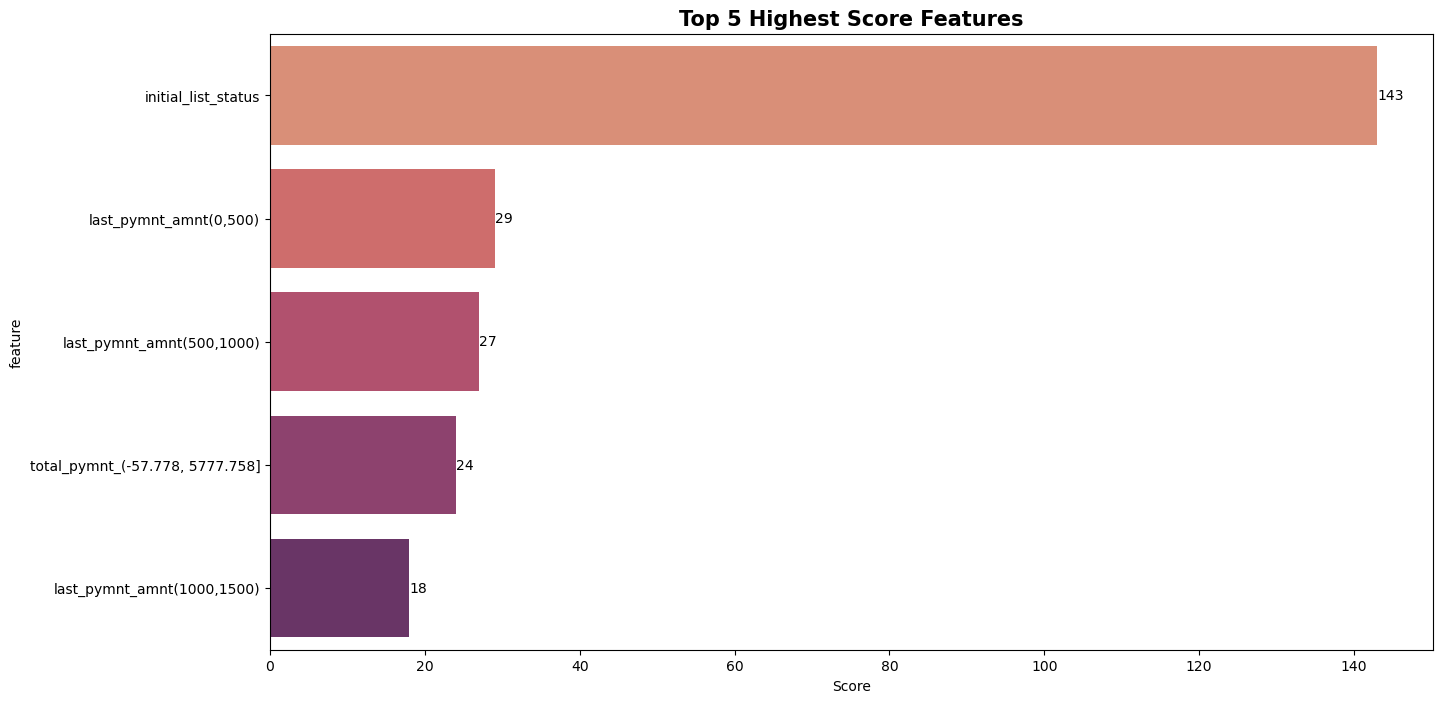

In [ ]:
#exclude intercept
df_high_score = df_scorecard2[:126]

#sort value to top 5
high_score = df_high_score.sort_values('score_calculation',ascending= False).round(0).head(5)

#create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(15,8))

#plot bar chart
sns.barplot(data =high_score, x='score_calculation', y='feature', palette='flare')

#label
plt.bar_label(ax.containers[0])
plt.xlabel('Score')
plt.title('Top 5 Highest Score Features', fontsize=15, weight ='extra bold')

**Insight:**  
Features that make high contribution to increase credit score are:
- initial list status
- last payment amount
- total payment

The result is in line with how FICO credit score is calculated that based on five factors: payment history, amount owed, new credit, length of credit history, and credit mix.

Text(0.5, 1.0, 'Top 5 Lowest Score Features')

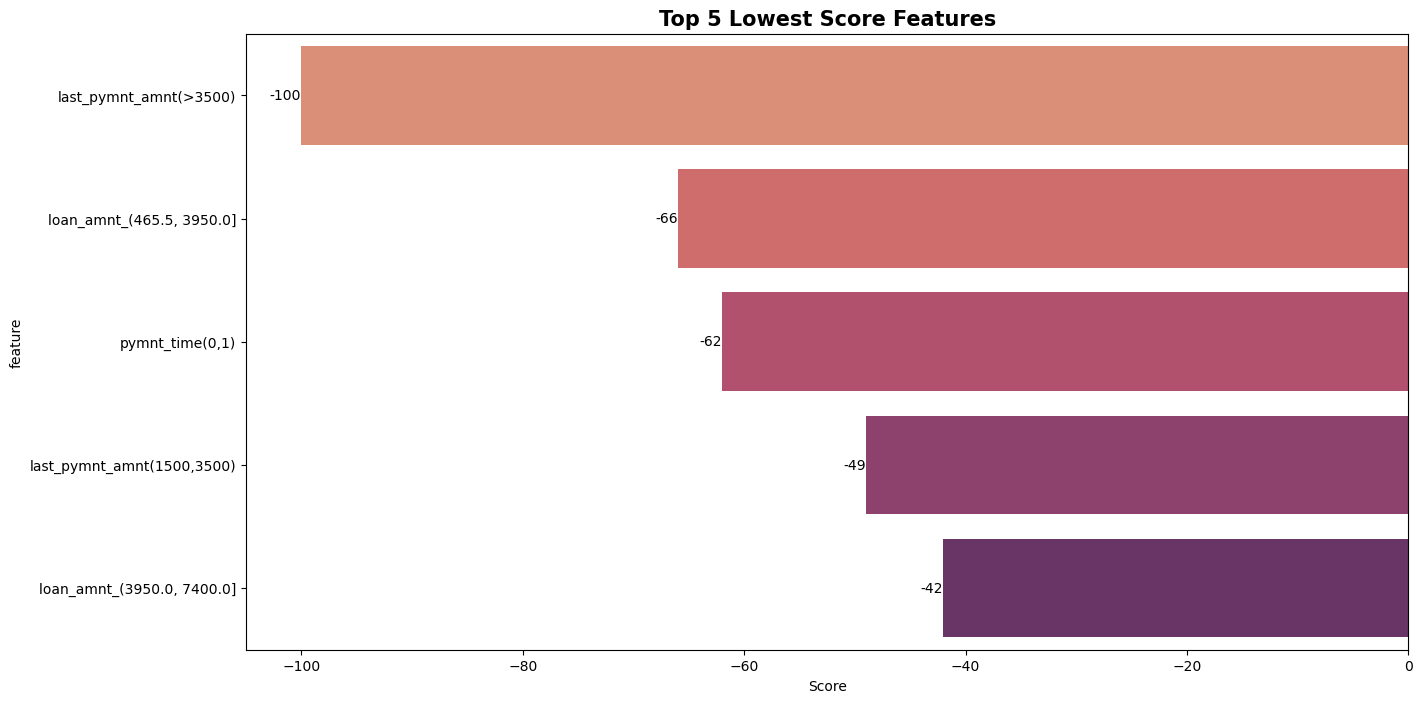

In [ ]:
#sort value to the 5 lowest
low_score = df_high_score.sort_values('score_calculation',ascending= True).round(0).head(5)

#create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(15,8))

#plot bar chart
sns.barplot(data =low_score, x='score_calculation', y='feature', palette='flare')

#label
plt.bar_label(ax.containers[0])
plt.xlabel('Score')
plt.title('Top 5 Lowest Score Features', fontsize=15, weight ='extra bold')

**Insight:**  
Features that make contribution to decrease credit score are:
- last payment amount
- loan amount
- payment time

The result is in line with how FICO credit score is calculated that based on five factors: payment history, amount owed, new credit, length of credit history, and credit mix.

In [ ]:
x_smote.columns

Index(['home_ownership_MORTGAGE', 'home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_RENT', 'purpose_car', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house',
       ...
       'last_pymnt_amnt(>3500)', 'pymnt_time(0,1)', 'pymnt_time(1,6)',
       'pymnt_time(6,12)', 'pymnt_time(>12)', 'annual_inc(low_income)',
       'annual_inc(mid_income)', 'annual_inc(high_income)', 'term',
       'initial_list_status'],
      dtype='object', length=126)

In [ ]:
#new dataset without target(loan_status)
data_fico = df_model[x_smote.columns]

#copy dataset
df_score = data_fico.copy()

#display
df_score.head(2)

home_ownership_MORTGAGE  home_ownership_OTHER  home_ownership_OWN  \
0                        0                     0                   0   
1                        0                     0                   0   

   home_ownership_RENT  purpose_car  purpose_credit_card  \
0                    1            0                    1   
1                    1            1                    0   

   purpose_debt_consolidation  purpose_educational  purpose_home_improvement  \
0                           0                    0                         0   
1                           0                    0                         0   

   purpose_house  purpose_major_purchase  purpose_medical  purpose_moving  \
0              0                       0                0               0   
1              0                       0                0               0   

   purpose_other  purpose_renewable_energy  purpose_small_business  \
0              0                         0                       0   
1              0                         0                       0   

   purpose_vacation  purpose_wedding  emp_length_1 year  emp_length_10+ years  \
0                 0                0                  0                     1   
1                 0                0                  0                     0   

   emp_length_2 years  emp_length_3 years  emp_length_4 years  \
0                   0                   0                   0   
1                   0                   0                   0   

   emp_length_5 years  emp_length_6 years  emp_length_7 years  \
0                   0                   0                   0   
1                   0                   0                   0   

   emp_length_8 years  emp_length_9 years  emp_length_< 1 year  grade_A  \
0                   0                   0                    0        0   
1                   0                   0                    1        0   

   grade_B  grade_C  grade_D  grade_E  grade_F  grade_G  \
0        1        0        0        0        0        0   
1        0        1        0        0        0        0   

   loan_amnt_(465.5, 3950.0]  loan_amnt_(3950.0, 7400.0]  \
0                          0                           1   
1                          1                           0   

   loan_amnt_(7400.0, 10850.0]  loan_amnt_(10850.0, 14300.0]  \
0                            0                             0   
1                            0                             0   

   loan_amnt_(14300.0, 17750.0]  loan_amnt_(17750.0, 21200.0]  \
0                             0                             0   
1                             0                             0   

   loan_amnt_(21200.0, 24650.0]  loan_amnt_(24650.0, 28100.0]  \
0                             0                             0   
1                             0                             0   

   loan_amnt_(28100.0, 31550.0]  loan_amnt_(31550.0, 35000.0]  \
0                             0                             0   
1                             0                             0   

   dti_(-0.04, 3.999]  dti_(3.999, 7.998]  dti_(7.998, 11.997]  \
0                   0                   0                    0   
1                   1                   0                    0   

   dti_(11.997, 15.996]  dti_(15.996, 19.995]  dti_(19.995, 23.994]  \
0                     0                     0                     0   
1                     0                     0                     0   

   dti_(23.994, 27.993]  dti_(27.993, 31.992]  dti_(31.992, 35.991]  \
0                     1                     0                     0   
1                     0                     0                     0   

   dti_(35.991, 39.99]  int_rate_(5.399, 7.484]  int_rate_(7.484, 9.548]  \
0                    0                        0                        0   
1                    0                        0                        0   

   int_rate_(9.548, 11.612]  int_rate_(11.612, 13.676]  \
0    

In [ ]:
df_score.shape

(465104, 126)

In [ ]:
#insert intercept column
df_score.insert(loc= 0 ,column= 'intercept', value=1)

In [ ]:
#dataframe score
scorecard_score = df_scorecard2['score_calculation']

In [ ]:
scorecard_score.shape

(127,)

In [ ]:
#reshape to row,column
scorecard_score = scorecard_score.values.reshape(127,1)

In [ ]:
scorecard_score

array([[-3.39900e+00],
       [ 1.52000e-01],
       [-1.50200e+01],
       [-5.11900e+00],
       [-1.32710e+01],
       [-8.70200e+00],
       [-6.73600e+00],
       [-2.04000e-01],
       [-1.74250e+01],
       [-4.29300e+00],
       [-1.84110e+01],
       [-1.09540e+01],
       [-8.57600e+00],
       [-1.77370e+01],
       [-1.14800e+00],
       [-6.20900e+00],
       [-8.14300e+00],
       [-7.83300e+00],
       [-2.84040e+01],
       [-2.67770e+01],
       [-2.97980e+01],
       [-3.16760e+01],
       [-3.48840e+01],
       [-3.15120e+01],
       [-2.96100e+01],
       [-2.97640e+01],
       [-2.70840e+01],
       [-2.52350e+01],
       [-2.63780e+01],
       [-2.83130e+01],
       [-1.46630e+01],
       [-1.21010e+01],
       [-1.45100e+00],
       [ 5.90300e+00],
       [ 9.34300e+00],
       [ 8.00800e+00],
       [-6.59890e+01],
       [-4.24290e+01],
       [-3.23770e+01],
       [-2.17030e+01],
       [-1.22830e+01],
       [-5.58300e+00],
       [-5.04000e+00],
       [-4.

In [ ]:
#calculate score with matrix multiplication
#dot product of arrays with numpy
y_scores = df_score.dot(scorecard_score)

In [ ]:
#concatenate pandas
score_card_df = pd.concat([df_score, y_scores], axis=1)

In [ ]:
score_card_df.head(1)

intercept  home_ownership_MORTGAGE  home_ownership_OTHER  \
0          1                        0                     0   

   home_ownership_OWN  home_ownership_RENT  purpose_car  purpose_credit_card  \
0                   0                    1            0                    1   

   purpose_debt_consolidation  purpose_educational  purpose_home_improvement  \
0                           0                    0                         0   

   purpose_house  purpose_major_purchase  purpose_medical  purpose_moving  \
0              0                       0                0               0   

   purpose_other  purpose_renewable_energy  purpose_small_business  \
0              0                         0                       0   

   purpose_vacation  purpose_wedding  emp_length_1 year  emp_length_10+ years  \
0                 0                0                  0                     1   

   emp_length_2 years  emp_length_3 years  emp_length_4 years  \
0                   0                   0                   0   

   emp_length_5 years  emp_length_6 years  emp_length_7 years  \
0                   0                   0                   0   

   emp_length_8 years  emp_length_9 years  emp_length_< 1 year  grade_A  \
0                   0                   0                    0        0   

   grade_B  grade_C  grade_D  grade_E  grade_F  grade_G  \
0        1        0        0        0        0        0   

   loan_amnt_(465.5, 3950.0]  loan_amnt_(3950.0, 7400.0]  \
0                          0                           1   

   loan_amnt_(7400.0, 10850.0]  loan_amnt_(10850.0, 14300.0]  \
0                            0                             0   

   loan_amnt_(14300.0, 17750.0]  loan_amnt_(17750.0, 21200.0]  \
0                             0                             0   

   loan_amnt_(21200.0, 24650.0]  loan_amnt_(24650.0, 28100.0]  \
0                             0                             0   

   loan_amnt_(28100.0, 31550.0]  loan_amnt_(31550.0, 35000.0]  \
0                             0                             0   

   dti_(-0.04, 3.999]  dti_(3.999, 7.998]  dti_(7.998, 11.997]  \
0                   0                   0                    0   

   dti_(11.997, 15.996]  dti_(15.996, 19.995]  dti_(19.995, 23.994]  \
0                     0                     0                     0   

   dti_(23.994, 27.993]  dti_(27.993, 31.992]  dti_(31.992, 35.991]  \
0                     1                     0                     0   

   dti_(35.991, 39.99]  int_rate_(5.399, 7.484]  int_rate_(7.484, 9.548]  \
0                    0                        0                        0   

   int_rate_(9.548, 11.612]  int_rate_(11.612, 13.676]  \
0                         1                          0   

   int_rate_(13.676, 15.74]  int_rate_(15.74, 17.804]  \
0                         0                         0   

   int_rate_(17.804, 19.868]  int_rate_(19.868, 21.932]  \
0                          0                          0   

   int_rate_(21.932, 23.996]  int_rate_(23.996, 26.06]  \
0                          0                         0   

   open_acc_(-0.084, 8.4]  open_acc_(8.4, 16.8]  open_acc_(16.8, 25.2]  \
0                       1                     0                      0   

   open_acc_(25.2, 33.6]  open_acc_(33.6, 42.0]  open_acc_(42.0, 50.4]  \
0                      0                      0                      0   

   open_acc_(50.4, 58.8]  open_acc_(58.8, 67.2]  open_acc_(67.2, 75.6]  \
0                      0                      0                      0   

   open_acc_(75.6, 84.0]  total_acc_(0.845, 23.143]  \
0                      0                          1   

   total_acc_(23.143, 45.286]  total_acc_(45.286, 67.429]  \
0                           0                           0   

   total_acc_(67.429, 89.571]  total_acc_(89.571, 111.714]  \
0                           0                            0   

   total_acc_(111.714, 133.857]  total_acc_(133.857, 156.0]  \
0          

In [ ]:
#rename column
score_card_df.rename(columns = {0:'credit_score'}, inplace = True)

In [ ]:
score_card_df.head(1)

intercept  home_ownership_MORTGAGE  home_ownership_OTHER  \
0          1                        0                     0   

   home_ownership_OWN  home_ownership_RENT  purpose_car  purpose_credit_card  \
0                   0                    1            0                    1   

   purpose_debt_consolidation  purpose_educational  purpose_home_improvement  \
0                           0                    0                         0   

   purpose_house  purpose_major_purchase  purpose_medical  purpose_moving  \
0              0                       0                0               0   

   purpose_other  purpose_renewable_energy  purpose_small_business  \
0              0                         0                       0   

   purpose_vacation  purpose_wedding  emp_length_1 year  emp_length_10+ years  \
0                 0                0                  0                     1   

   emp_length_2 years  emp_length_3 years  emp_length_4 years  \
0                   0                   0                   0   

   emp_length_5 years  emp_length_6 years  emp_length_7 years  \
0                   0                   0                   0   

   emp_length_8 years  emp_length_9 years  emp_length_< 1 year  grade_A  \
0                   0                   0                    0        0   

   grade_B  grade_C  grade_D  grade_E  grade_F  grade_G  \
0        1        0        0        0        0        0   

   loan_amnt_(465.5, 3950.0]  loan_amnt_(3950.0, 7400.0]  \
0                          0                           1   

   loan_amnt_(7400.0, 10850.0]  loan_amnt_(10850.0, 14300.0]  \
0                            0                             0   

   loan_amnt_(14300.0, 17750.0]  loan_amnt_(17750.0, 21200.0]  \
0                             0                             0   

   loan_amnt_(21200.0, 24650.0]  loan_amnt_(24650.0, 28100.0]  \
0                             0                             0   

   loan_amnt_(28100.0, 31550.0]  loan_amnt_(31550.0, 35000.0]  \
0                             0                             0   

   dti_(-0.04, 3.999]  dti_(3.999, 7.998]  dti_(7.998, 11.997]  \
0                   0                   0                    0   

   dti_(11.997, 15.996]  dti_(15.996, 19.995]  dti_(19.995, 23.994]  \
0                     0                     0                     0   

   dti_(23.994, 27.993]  dti_(27.993, 31.992]  dti_(31.992, 35.991]  \
0                     1                     0                     0   

   dti_(35.991, 39.99]  int_rate_(5.399, 7.484]  int_rate_(7.484, 9.548]  \
0                    0                        0                        0   

   int_rate_(9.548, 11.612]  int_rate_(11.612, 13.676]  \
0                         1                          0   

   int_rate_(13.676, 15.74]  int_rate_(15.74, 17.804]  \
0                         0                         0   

   int_rate_(17.804, 19.868]  int_rate_(19.868, 21.932]  \
0                          0                          0   

   int_rate_(21.932, 23.996]  int_rate_(23.996, 26.06]  \
0                          0                         0   

   open_acc_(-0.084, 8.4]  open_acc_(8.4, 16.8]  open_acc_(16.8, 25.2]  \
0                       1                     0                      0   

   open_acc_(25.2, 33.6]  open_acc_(33.6, 42.0]  open_acc_(42.0, 50.4]  \
0                      0                      0                      0   

   open_acc_(50.4, 58.8]  open_acc_(58.8, 67.2]  open_acc_(67.2, 75.6]  \
0                      0                      0                      0   

   open_acc_(75.6, 84.0]  total_acc_(0.845, 23.143]  \
0                      0                          1   

   total_acc_(23.143, 45.286]  total_acc_(45.286, 67.429]  \
0                           0                           0   

   total_acc_(67.429, 89.571]  total_acc_(89.571, 111.714]  \
0                           0                            0   

   total_acc_(111.714, 133.857]  total_acc_(133.857, 156.0]  \
0          

In [ ]:
df.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'purpose', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

In [ ]:
#copy column id and member id
df_ori = pd.read_csv(r'D:\Dokumen\Portfolio Project\Credit Risk IDX Partners/loan_data_2007_2014.csv')
df_id = df_ori[['id','member_id']].copy()

In [ ]:
#merge credit_score with member id
credit_score_with_id = pd.merge(df_id, score_card_df, left_index=True, right_index=True)

In [ ]:
credit_score_with_id.head(2)

id  member_id  intercept  home_ownership_MORTGAGE  \
0  1077501    1296599          1                        0   
1  1077430    1314167          1                        0   

   home_ownership_OTHER  home_ownership_OWN  home_ownership_RENT  purpose_car  \
0                     0                   0                    1            0   
1                     0                   0                    1            1   

   purpose_credit_card  purpose_debt_consolidation  purpose_educational  \
0                    1                           0                    0   
1                    0                           0                    0   

   purpose_home_improvement  purpose_house  purpose_major_purchase  \
0                         0              0                       0   
1                         0              0                       0   

   purpose_medical  purpose_moving  purpose_other  purpose_renewable_energy  \
0                0               0              0                         0   
1                0               0              0                         0   

   purpose_small_business  purpose_vacation  purpose_wedding  \
0                       0                 0                0   
1                       0                 0                0   

   emp_length_1 year  emp_length_10+ years  emp_length_2 years  \
0                  0                     1                   0   
1                  0                     0                   0   

   emp_length_3 years  emp_length_4 years  emp_length_5 years  \
0                   0                   0                   0   
1                   0                   0                   0   

   emp_length_6 years  emp_length_7 years  emp_length_8 years  \
0                   0                   0                   0   
1                   0                   0                   0   

   emp_length_9 years  emp_length_< 1 year  grade_A  grade_B  grade_C  \
0                   0                    0        0        1        0   
1                   0                    1        0        0        1   

   grade_D  grade_E  grade_F  grade_G  loan_amnt_(465.5, 3950.0]  \
0        0        0        0        0                          0   
1        0        0        0        0                          1   

   loan_amnt_(3950.0, 7400.0]  loan_amnt_(7400.0, 10850.0]  \
0                           1                            0   
1                           0                            0   

   loan_amnt_(10850.0, 14300.0]  loan_amnt_(14300.0, 17750.0]  \
0                             0                             0   
1                             0                             0   

   loan_amnt_(17750.0, 21200.0]  loan_amnt_(21200.0, 24650.0]  \
0                             0                             0   
1                             0                             0   

   loan_amnt_(24650.0, 28100.0]  loan_amnt_(28100.0, 31550.0]  \
0                             0                             0   
1                             0                             0   

   loan_amnt_(31550.0, 35000.0]  dti_(-0.04, 3.999]  dti_(3.999, 7.998]  \
0                             0                   0                   0   
1                             0                   1                   0   

   dti_(7.998, 11.997]  dti_(11.997, 15.996]  dti_(15.996, 19.995]  \
0                    0                     0                     0   
1                    0                     0                     0   

   dti_(19.995, 23.994]  dti_(23.994, 27.993]  dti_(27.993, 31.992]  \
0                     0                     1                     0   
1                     0                     0                     0   

   dti_(31.992, 35.991]  dti_(35.991, 39.99]  int_rate_(5.399, 7.484]  \
0                     0                    0                        0   
1                     0                    0                        0   

   int_rate_(7.484, 9.548]  int_rate_(9.548, 11.61

In [ ]:
#create dataframe with selected columns
result_credit_score = credit_score_with_id[['id','member_id', 'credit_score']]

In [ ]:
#take sample
result_credit_score.sample(10)

id  member_id  credit_score
95128    7075404    8737552       692.818
428019  12715434   14727589       489.236
270917  28613050   31136193       515.491
247260  35286405   37967787       554.851
219796   1247387    1489532       418.976
97759    6897207    8539165       547.375
182667   1826464    2128802       497.434
135264   5365300    6717509       634.577
382522  17103170   19225706       549.190
105820   6551715    8103744       395.332

In [ ]:
#create dataframe with selected columns
credit_score_with_id_2 = credit_score_with_id[['id', 'credit_score']]

In [ ]:
#merge raw dataframe to clean data
df_result = pd.merge(df_ori, df_clean[['id','pymnt_time','credit_pull_year']], on='id')

In [ ]:
#merge score to raw dataframe
df_result = pd.merge(df_result, credit_score_with_id_2, on='id')

In [ ]:
#take sample
df_result.sample(10)

Unnamed: 0        id  member_id  loan_amnt  funded_amnt  \
433510      434578  12525157   14537301      19300        19300   
273701      274334  31497345   34090526      10000        10000   
359995      360844  19706717   21929462      28975        28975   
301596      302306  28072256   30585390       6000         6000   
409292      410273  14268153   16320542       5500         5500   
32009        32081    488060     622301       5500         5500   
447013      448121  11407561    8712115       7925         7925   
263003      263610  33341331   35984685       2400         2400   
378711      379602  16361394   18463927      18000        18000   
288146      288816  29615416   32148667       9800         9800   

        funded_amnt_inv        term  int_rate  installment grade sub_grade  \
433510          19300.0   36 months     24.99       767.27     F        F4   
273701          10000.0   36 months     13.98       341.68     C        C3   
359995          28925.0   60 months     20.99       783.71     E        E4   
301596           6000.0   36 months     13.98       205.01     C        C3   
409292           5500.0   36 months      9.67       176.62     B        B1   
32009            5500.0   36 months      7.51       171.11     A        A4   
447013           7925.0   36 months     13.53       269.06     B        B5   
263003           2400.0   36 months     13.35        81.28     C        C2   
378711          18000.0   60 months     12.49       404.88     B        B5   
288146           9800.0   36 months     13.35       331.86     C        C2   

                           emp_title emp_length home_ownership  annual_inc  \
433510                       Manager    6 years       MORTGAGE    64500.00   
273701            Field Service Tech    4 years            OWN    60000.00   
359995                           NaN        NaN       MORTGAGE    69038.46   
301596                    technician  10+ years       MORTGAGE    55000.00   
409292    Supervisor paper warehouse  10+ years           RENT    55000.00   
32009               City of Billings    2 years            OWN    34656.00   
447013                    Technician    8 years       MORTGAGE    44000.00   
263003  Food Service Cust. Asstiance  10+ years           RENT    31698.00   
378711          surveillance officer  10+ years       MORTGAGE    40000.00   
288146   Dual Rate Supervisor/dealer     1 year           RENT    52000.00   

       verification_status issue_d  loan_status pymnt_plan  \
433510     Source Verified  Mar-14  Charged Off          n   
273701            Verified  Oct-14      Current          n   
359995            Verified  Jul-14   Fully Paid          n   
301596     Source Verified  Oct-14      Current          n   
409292     Source Verified  Apr-14      Current          n   
32009         Not Verified  Feb-10   Fully Paid          n   
447013        Not Verified  Feb-14   Fully Paid          n   
263003        Not Verified  Oct-14   Fully Paid          n   
378711        Not Verified  Jun-14      Current          n   
288146     Source Verified  Oct-14      Current          n   

                                                      url  \
433510  https://www.lendingclub.com/browse/loanDetail....   
273701  https://www.lendingclub.com/browse/loanDetail....   
359995  https://www.lendingclub.com/browse/loanDetail....   
301596  https://www.lendingclub.com/browse/loanDetail....   
409292  https://www.lendingclub.com/browse/loanDetail....   
32009   https://www.lendingclub.com/browse/loanDetail....   
447013  https://www.lendingclub.com/browse/loanDetail....   
263003  https://www.lendingclub.com/browse/loanDetail....   
378711  https://www.lendingclub.com/browse/loanDetail....   
288146  https://www.lendingclub.com/browse/loanDetail....   

                                                     desc             purpose  \
433510    Borrower added on 02/28/14 > To take over a ...      small_business   
273701                             

## Visualization Based On Feature Importance Model

In [ ]:
df_vis = df_result.copy()

### FICO Score
A FICO score is a credit score created by the Fair Isaac Corporation (FICO). Lenders use borrowers’ FICO scores along with other details on borrowers’ credit reports to assess credit risk and determine whether to extend credit.

FICO scores take into account data in five areas to determine a borrower's credit worthiness: payment history, the current level of indebtedness, types of credit used, length of credit history, and new credit accounts

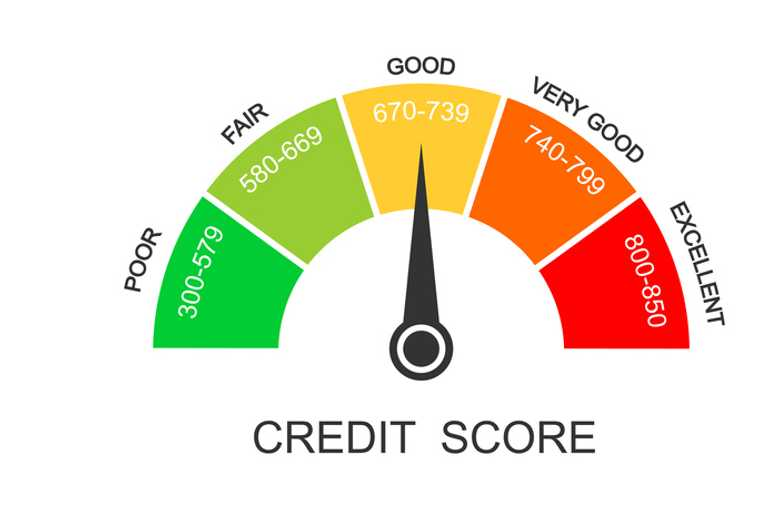

In [ ]:
Image(filename='image_IDX/fico score.jpg', width= 500)

In [ ]:
df_vis.head(1)

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501    1296599       5000         5000           4975.0   

         term  int_rate  installment grade sub_grade emp_title emp_length  \
0   36 months     10.65       162.87     B        B2       NaN  10+ years   

  home_ownership  annual_inc verification_status issue_d loan_status  \
0           RENT     24000.0            Verified  Dec-11  Fully Paid   

  pymnt_plan                                                url  \
0          n  https://www.lendingclub.com/browse/loanDetail....   

                                                desc      purpose     title  \
0    Borrower added on 12/22/11 > I need to upgra...  credit_card  Computer   

  zip_code addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  \
0    860xx         AZ  27.65          0.0           Jan-85             1.0   

   mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
0                     NaN                     NaN       3.0      0.0   

   revol_bal  revol_util  total_acc initial_list_status  out_prncp  \
0      13648        83.7        9.0                   f        0.0   

   out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0            0.0  5861.071414          5831.78           5000.0   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         861.07                 0.0         0.0                      0.0   

  last_pymnt_d  last_pymnt_amnt next_pymnt_d last_credit_pull_d  \
0       Jan-15           171.62          NaN             Jan-16   

   collections_12_mths_ex_med  mths_since_last_major_derog  policy_code  \
0                         0.0                          NaN            1   

  application_type  annual_inc_joint  dti_joint  verification_status_joint  \
0       INDIVIDUAL               NaN        NaN                        NaN   

   acc_now_delinq  tot_coll_amt  tot_cur_bal  open_acc_6m  open_il_6m  \
0             0.0           NaN          NaN          NaN         NaN   

   open_il_12m  open_il_24m  mths_since_rcnt_il  total_bal_il  il_util  \
0          NaN          NaN                 NaN           NaN      NaN   

   open_rv_12m  open_rv_24m  max_bal_bc  all_util  total_rev_hi_lim  inq_fi  \
0          NaN          NaN         NaN       NaN               NaN     NaN   

   total_cu_tl  inq_last_12m  pymnt_time  credit_pull_year  credit_score  
0          NaN           NaN          13                31       588.177

In [ ]:
#create colum score_group
df_vis['score_group'] = np.where((df_vis['credit_score'] >=300) & (df_vis['credit_score'] <=579), 'Poor (300-579)',
                                np.where((df_vis['credit_score'] >=580) & (df_vis['credit_score'] <=669), 'Fair (580-669)',
                                np.where((df_vis['credit_score'] >=670) & (df_vis['credit_score'] <=739), 'Good (670-739)',
                                np.where((df_vis['credit_score'] >=740) & (df_vis['credit_score'] <=799), 'Very Good (740-799)', 'Excellent (800-850)'))))

In [ ]:
df_vis.head(1)

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501    1296599       5000         5000           4975.0   

         term  int_rate  installment grade sub_grade emp_title emp_length  \
0   36 months     10.65       162.87     B        B2       NaN  10+ years   

  home_ownership  annual_inc verification_status issue_d loan_status  \
0           RENT     24000.0            Verified  Dec-11  Fully Paid   

  pymnt_plan                                                url  \
0          n  https://www.lendingclub.com/browse/loanDetail....   

                                                desc      purpose     title  \
0    Borrower added on 12/22/11 > I need to upgra...  credit_card  Computer   

  zip_code addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  \
0    860xx         AZ  27.65          0.0           Jan-85             1.0   

   mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
0                     NaN                     NaN       3.0      0.0   

   revol_bal  revol_util  total_acc initial_list_status  out_prncp  \
0      13648        83.7        9.0                   f        0.0   

   out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0            0.0  5861.071414          5831.78           5000.0   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         861.07                 0.0         0.0                      0.0   

  last_pymnt_d  last_pymnt_amnt next_pymnt_d last_credit_pull_d  \
0       Jan-15           171.62          NaN             Jan-16   

   collections_12_mths_ex_med  mths_since_last_major_derog  policy_code  \
0                         0.0                          NaN            1   

  application_type  annual_inc_joint  dti_joint  verification_status_joint  \
0       INDIVIDUAL               NaN        NaN                        NaN   

   acc_now_delinq  tot_coll_amt  tot_cur_bal  open_acc_6m  open_il_6m  \
0             0.0           NaN          NaN          NaN         NaN   

   open_il_12m  open_il_24m  mths_since_rcnt_il  total_bal_il  il_util  \
0          NaN          NaN                 NaN           NaN      NaN   

   open_rv_12m  open_rv_24m  max_bal_bc  all_util  total_rev_hi_lim  inq_fi  \
0          NaN          NaN         NaN       NaN               NaN     NaN   

   total_cu_tl  inq_last_12m  pymnt_time  credit_pull_year  credit_score  \
0          NaN           NaN          13                31       588.177   

      score_group  
0  Fair (580-669)

In [ ]:
#group by score_group with id customer
score_groupy = df_vis.groupby('score_group').agg(num_cust=('id','count')).reset_index()

In [ ]:
score_groupy

score_group  num_cust
0  Excellent (800-850)      1985
1       Fair (580-669)     81875
2       Good (670-739)     37496
3       Poor (300-579)    340181
4  Very Good (740-799)      3567

In [ ]:
total_num_cust = score_groupy['num_cust'].sum()
total_num_cust

465104

In [ ]:
score_groupy['percentage'] = round((score_groupy['num_cust']/total_num_cust)*100, 2)

In [ ]:
score_groupy = score_groupy.sort_values('percentage', ascending = False)
score_groupy.reset_index(drop = True)

score_group  num_cust  percentage
0       Poor (300-579)    340181       73.14
1       Fair (580-669)     81875       17.60
2       Good (670-739)     37496        8.06
3  Very Good (740-799)      3567        0.77
4  Excellent (800-850)      1985        0.43

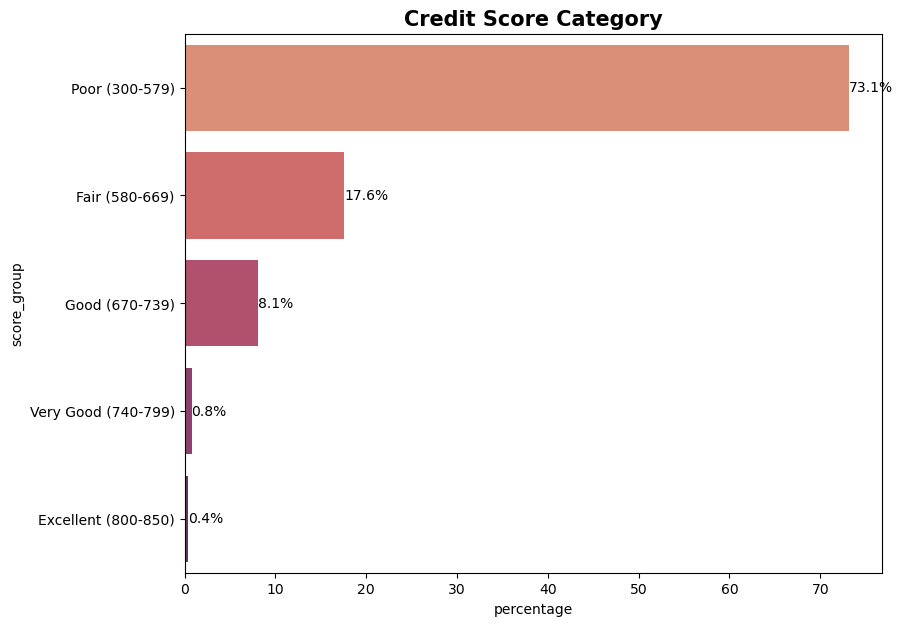

In [ ]:
#create bar plot
fig, ax = plt.subplots(figsize = (9, 7))
sns.barplot(y= score_groupy['score_group'], x=score_groupy['percentage'], orient='h', palette='flare')
plt.bar_label(ax.containers[0], fmt='%.1f%%')
plt.title('Credit Score Category',fontsize=15, weight ='extra bold')
plt.show()

**Insight:**  
- the highest number of borrowers is in the loan poor category at 73.1%.
- Then followed by Fair at 17.6%, Good at 8.1%, Very good at 0.8%, and excelent at 0.4%
- Loan poor category demonstrates to lenders that their customer is a risky borrower

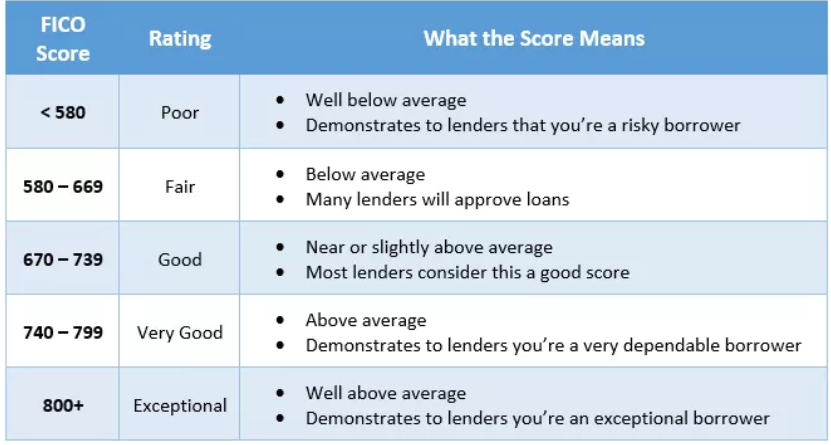

In [ ]:
Image(filename='image_IDX/fico table.png', width= 500)

## Credit Score with Loan Status

### Adjusting Label to Visualization

In [ ]:
#copy dataset
dv_vis_2 = df_vis.copy()

In [ ]:
#define good loan
good_loan = ['Current','Fully Paid']

In [ ]:
dv_vis_2.head(2)

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501    1296599       5000         5000           4975.0   
1           1  1077430    1314167       2500         2500           2500.0   

         term  int_rate  installment grade sub_grade emp_title emp_length  \
0   36 months     10.65       162.87     B        B2       NaN  10+ years   
1   60 months     15.27        59.83     C        C4     Ryder   < 1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   

  pymnt_plan                                                url  \
0          n  https://www.lendingclub.com/browse/loanDetail....   
1          n  https://www.lendingclub.com/browse/loanDetail....   

                                                desc      purpose     title  \
0    Borrower added on 12/22/11 > I need to upgra...  credit_card  Computer   
1    Borrower added on 12/22/11 > I plan to use t...          car      bike   

  zip_code addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  \
0    860xx         AZ  27.65          0.0           Jan-85             1.0   
1    309xx         GA   1.00          0.0           Apr-99             5.0   

   mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
0                     NaN                     NaN       3.0      0.0   
1                     NaN                     NaN       3.0      0.0   

   revol_bal  revol_util  total_acc initial_list_status  out_prncp  \
0      13648        83.7        9.0                   f        0.0   
1       1687         9.4        4.0                   f        0.0   

   out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0            0.0  5861.071414          5831.78          5000.00   
1            0.0  1008.710000          1008.71           456.46   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         861.07                 0.0        0.00                     0.00   
1         435.17                 0.0      117.08                     1.11   

  last_pymnt_d  last_pymnt_amnt next_pymnt_d last_credit_pull_d  \
0       Jan-15           171.62          NaN             Jan-16   
1       Apr-13           119.66          NaN             Sep-13   

   collections_12_mths_ex_med  mths_since_last_major_derog  policy_code  \
0                         0.0                          NaN            1   
1                         0.0                          NaN            1   

  application_type  annual_inc_joint  dti_joint  verification_status_joint  \
0       INDIVIDUAL               NaN        NaN                        NaN   
1       INDIVIDUAL               NaN        NaN                        NaN   

   acc_now_delinq  tot_coll_amt  tot_cur_bal  open_acc_6m  open_il_6m  \
0             0.0           NaN          NaN          NaN         NaN   
1             0.0           NaN          NaN          NaN         NaN   

   open_il_12m  open_il_24m  mths_since_rcnt_il  total_bal_il  il_util  \
0          NaN          NaN                 NaN           NaN      NaN   
1          NaN          NaN                 NaN           NaN      NaN   

   open_rv_12m  open_rv_24m  max_bal_bc  all_util  total_rev_hi_lim  inq_fi  \
0          NaN          NaN         NaN       NaN               NaN     NaN   
1          NaN          NaN         NaN       NaN               NaN     NaN   

   total_cu_tl  inq_last_12m  pymnt_time  credit_pull_year  credit_score  \
0          NaN           NaN          13                31       588.177   
1          NaN           NaN          34                14       679.297   

      score_group  
0  Fair (580-669)  
1  Good (670-739)

In [ ]:
#adjusting label on loan_status
dv_vis_2['loan_status'] = dv_vis_2['loan_status'].apply(lambda x: 'Good Loan' if x in good_loan else 'Bad Loan')

In [ ]:
#selected columns
dv_vis_2[['loan_amnt', 'last_pymnt_amnt', 'pymnt_time', 'int_rate']].describe(percentiles=[0.1,0.25,0.5,0.75,0.9,0.95,0.99])

loan_amnt  last_pymnt_amnt     pymnt_time       int_rate
count  465104.000000    465104.000000  465104.000000  465104.000000
mean    14315.736212      3125.013069       8.914965      13.831313
std      8284.877562      5555.100702      12.257049       4.357922
min       500.000000         0.000000       0.000000       5.420000
10%      5000.000000       182.620000       1.000000       7.900000
25%      8000.000000       312.640000       1.000000      10.990000
50%     12000.000000       545.990000       2.000000      13.660000
75%     20000.000000      3193.115000      13.000000      16.490000
90%     26000.000000     10734.144000      25.000000      19.520000
95%     30100.000000     15736.941500      35.000000      21.700000
99%     35000.000000     25672.800000      56.000000      24.890000
max     35000.000000     36234.440000      97.000000      26.060000

In [ ]:
#adjusting label on loan_amnt
dv_vis_2['loan_amnt_fc'] = np.where((dv_vis_2['loan_amnt']>= 465)  & (dv_vis_2['loan_amnt']< 3950),'465-3950',
                                np.where((dv_vis_2['loan_amnt']>= 3950)  & (dv_vis_2['loan_amnt']< 7400),'3950-7400',
                                np.where((dv_vis_2['loan_amnt']>= 7400)  & (dv_vis_2['loan_amnt']< 10850),'7400-10850',
                                np.where((dv_vis_2['loan_amnt']>= 10850)  & (dv_vis_2['loan_amnt']< 14300),'10850-14300',
                                np.where((dv_vis_2['loan_amnt']>= 14300)  & (dv_vis_2['loan_amnt']< 17750),'14300-17750',
                                np.where((dv_vis_2['loan_amnt']>= 17750)  & (dv_vis_2['loan_amnt']< 21200),'17750-21200',
                                np.where((dv_vis_2['loan_amnt']>= 21200)  & (dv_vis_2['loan_amnt']< 24650),'21200-24650',
                                np.where((dv_vis_2['loan_amnt']>= 24650)  & (dv_vis_2['loan_amnt']< 28100),'24650-28100',
                                np.where((dv_vis_2['loan_amnt']>= 28100)  & (dv_vis_2['loan_amnt']< 31550),'28100-31550', '31550-35000')))))))))

In [ ]:
#check
dv_vis_2[['loan_amnt','loan_amnt_fc']].head(3)

loan_amnt loan_amnt_fc
0       5000    3950-7400
1       2500     465-3950
2       2400     465-3950

In [ ]:
#adjusting label on last_pymnt_amnt
dv_vis_2['last_pymnt_amnt_fc'] = np.where((dv_vis_2['last_pymnt_amnt']>= 0)  & (dv_vis_2['last_pymnt_amnt']< 500),'0-500',
                                    np.where((dv_vis_2['last_pymnt_amnt']>= 500)  & (dv_vis_2['last_pymnt_amnt']< 1000),'500-1000',
                                    np.where((dv_vis_2['last_pymnt_amnt']>= 1000)  & (dv_vis_2['last_pymnt_amnt']< 1500),'1000-1500',
                                    np.where((dv_vis_2['last_pymnt_amnt']>= 1500)  & (dv_vis_2['last_pymnt_amnt']< 3500),'1500-3500', '>3500'))))

In [ ]:
#check
dv_vis_2[['last_pymnt_amnt','last_pymnt_amnt_fc']].head(3)

last_pymnt_amnt last_pymnt_amnt_fc
0           171.62              0-500
1           119.66              0-500
2           649.91           500-1000

In [ ]:
#adjusting label on pymnt_time
dv_vis_2['pymnt_time_fc'] = np.where((dv_vis_2['pymnt_time']>= 0)  & (dv_vis_2['pymnt_time']<= 1),'1 Month',
                                np.where((dv_vis_2['pymnt_time']>= 2)  & (dv_vis_2['pymnt_time']<= 6),'2-6 Month',
                                np.where((dv_vis_2['pymnt_time']>= 7)  & (dv_vis_2['pymnt_time']<= 12),'7-12 Month', 'Over 1 year')))

In [ ]:
#check
dv_vis_2[['pymnt_time','pymnt_time_fc']].head(5)

pymnt_time pymnt_time_fc
0          13   Over 1 year
1          34   Over 1 year
2          20   Over 1 year
3          13   Over 1 year
4           1       1 Month

In [ ]:
dv_vis_2['int_rate'].min()

5.42

In [ ]:
dv_vis_2['int_rate'].max()

26.06

In [ ]:
#adjusting label on int_rate
dv_vis_2['int_rate_fc'] = np.where((dv_vis_2['int_rate']>= 5.3)  & (dv_vis_2['int_rate']< 7.5),'5.3-7.5',
                                np.where((dv_vis_2['int_rate']>= 7.5)  & (dv_vis_2['int_rate']< 9.5),'7.5-9.5',
                                np.where((dv_vis_2['int_rate']>= 9.5)  & (dv_vis_2['int_rate']< 11.5),'9.5-11.5',
                                np.where((dv_vis_2['int_rate']>= 11.5)  & (dv_vis_2['int_rate']< 13.5),'11.5-13.5',
                                np.where((dv_vis_2['int_rate']>= 13.5)  & (dv_vis_2['int_rate']< 15.5),'13.5-15.5',
                                np.where((dv_vis_2['int_rate']>= 15.5)  & (dv_vis_2['int_rate']< 17.5),'15.5-17.5',
                                np.where((dv_vis_2['int_rate']>= 17.5)  & (dv_vis_2['int_rate']< 19.5),'17.5-19.5',
                                np.where((dv_vis_2['int_rate']>= 19.5)  & (dv_vis_2['int_rate']< 21.5),'19.5-21.5',
                                np.where((dv_vis_2['int_rate']>= 21.5)  & (dv_vis_2['int_rate']< 23.5),'21.5-23.5','24-26')))))))))

In [ ]:
#check
dv_vis_2[['int_rate','int_rate_fc']].head(3)

int_rate int_rate_fc
0     10.65    9.5-11.5
1     15.27   13.5-15.5
2     15.96   15.5-17.5

### Create Orderlist

In [ ]:
dv_vis_2['emp_length'].value_counts()

10+ years    149705
2 years       41319
3 years       36548
< 1 year      36210
5 years       30727
1 year        29588
4 years       27982
7 years       26143
6 years       26067
8 years       22369
9 years       17868
Name: emp_length, dtype: int64

In [ ]:
order_list_loan_amnt = ['465-3950','3950-7400','7400-10850','10850-14300','14300-17750',
                   '17750-21200','21200-24650','24650-28100','28100-31550','31550-35000']
order_list_last_pymnt_amnt = ['0-500','500-1000','1000-1500','1500-3500','>3500']
order_list_pymnt_time = ['1 Month','2-6 Month','7-12 Month','Over 1 year']
order_list_int_rate = ['5.3-7.5','7.5-9.5','9.5-11.5','11.5-13.5','13.5-15.5',
                       '15.5-17.5','17.5-19.5','19.5-21.5','21.5-23.5','24-26']
order_list_emp = ['< 1 year','1 year','2 years','3 years','4 years','5 years',
                  '6 years','7 years','8 years','9 years','10+ years']

### Loan Status Visualization

score_groupy = df_vis.groupby('score_group').agg(num_cust=('id','count')).reset_index()
total_num_cust = score_groupy['num_cust'].sum()
total_num_cust
score_groupy['percentage'] = round((score_groupy['num_cust']/total_num_cust)*100, 2)
#create bar plot
fig, ax = plt.subplots(figsize = (9, 7))
sns.barplot(y= score_groupy['score_group'], x=score_groupy['percentage'], orient='h', palette='flare')
plt.bar_label(ax.containers[0], fmt='%.1f%%')
plt.title('Credit Score Category',fontsize=15, weight ='extra bold')
plt.show()

In [ ]:
#groupby loan_status
loan_status_group = dv_vis_2.groupby('loan_status').agg(num_cust=('id','count')).reset_index()
total_num_cust_loan_status = loan_status_group['num_cust'].sum()
loan_status_group['percentage'] = round((loan_status_group['num_cust']/total_num_cust_loan_status)*100, 2)
loan_status_group = loan_status_group.sort_values('percentage', ascending = False)
loan_status_group

loan_status  num_cust  percentage
1   Good Loan    407956       87.71
0    Bad Loan     57148       12.29

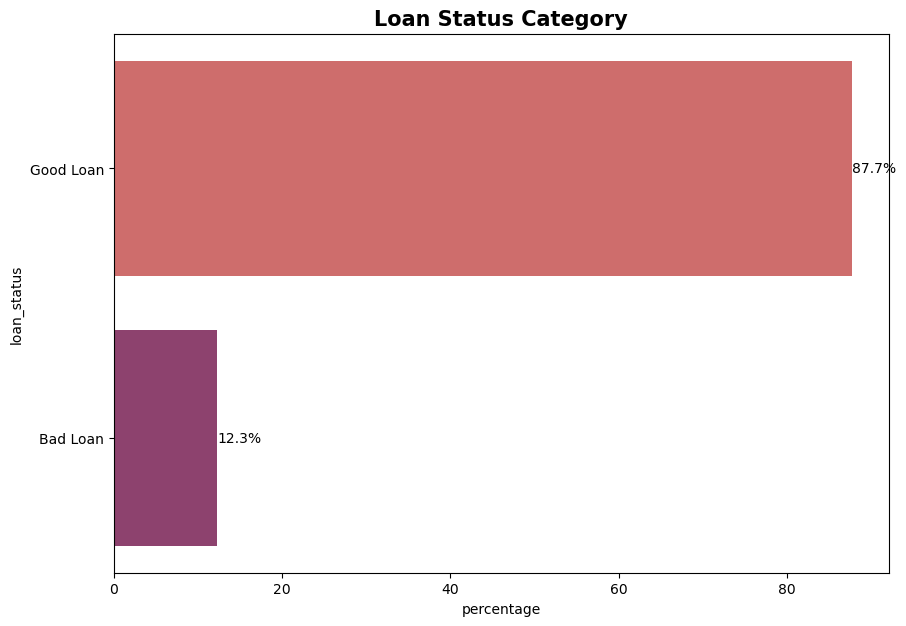

In [ ]:
#plot loan_status
fig, ax = plt.subplots(figsize = (10, 7))
sns.barplot(y= loan_status_group['loan_status'], x=loan_status_group['percentage'], orient='h', palette='flare')
plt.bar_label(ax.containers[0], fmt='%.1f%%')
plt.title('Loan Status Category',fontsize=15, weight ='extra bold')
plt.show()

In [ ]:
#automatization function
def d_frame(group):
    df_group = dv_vis_2.groupby(group).agg(num_cust=('id','count')).reset_index()
    total_num_cust = df_group['num_cust'].sum()
    df_group['percentage'] = round((df_group['num_cust']/total_num_cust)*100, 2)
    df_group = df_group.sort_values('percentage', ascending = False)
    return df_group

In [ ]:
#groupby loan_status
d_frame('loan_status')

loan_status  num_cust  percentage
1   Good Loan    407956       87.71
0    Bad Loan     57148       12.29

In [ ]:
def plot(group, title):
    df_group = dv_vis_2.groupby(group).agg(num_cust=('id','count')).reset_index()
    total_num_cust = df_group['num_cust'].sum()
    df_group['percentage'] = round((df_group['num_cust']/total_num_cust)*100, 2)
    df_group = df_group.sort_values('percentage', ascending = False)

    fig, ax = plt.subplots(figsize = (10, 7))
    sns.barplot(y= df_group[group], x=df_group['percentage'], orient='h', palette='flare')
    plt.bar_label(ax.containers[0], fmt='%.1f%%')
    plt.title(title,fontsize=15, weight ='extra bold')
    plt.show()

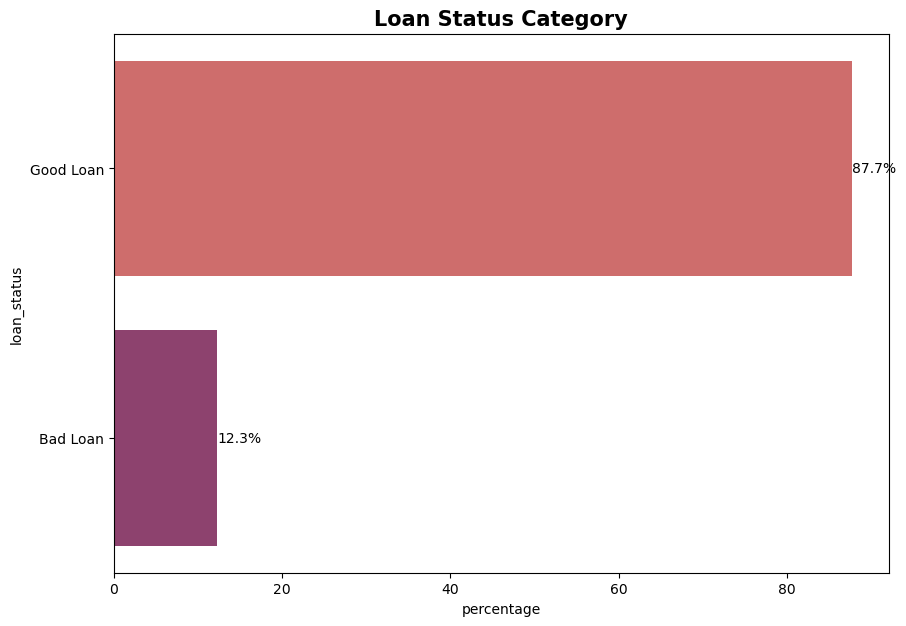

In [ ]:
plot('loan_status', 'Loan Status Category')

### Bad Loan Rate Based On Loan Amount

In [ ]:
dv_vis_2.head(1)

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501    1296599       5000         5000           4975.0   

         term  int_rate  installment grade sub_grade emp_title emp_length  \
0   36 months     10.65       162.87     B        B2       NaN  10+ years   

  home_ownership  annual_inc verification_status issue_d loan_status  \
0           RENT     24000.0            Verified  Dec-11   Good Loan   

  pymnt_plan                                                url  \
0          n  https://www.lendingclub.com/browse/loanDetail....   

                                                desc      purpose     title  \
0    Borrower added on 12/22/11 > I need to upgra...  credit_card  Computer   

  zip_code addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  \
0    860xx         AZ  27.65          0.0           Jan-85             1.0   

   mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
0                     NaN                     NaN       3.0      0.0   

   revol_bal  revol_util  total_acc initial_list_status  out_prncp  \
0      13648        83.7        9.0                   f        0.0   

   out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0            0.0  5861.071414          5831.78           5000.0   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         861.07                 0.0         0.0                      0.0   

  last_pymnt_d  last_pymnt_amnt next_pymnt_d last_credit_pull_d  \
0       Jan-15           171.62          NaN             Jan-16   

   collections_12_mths_ex_med  mths_since_last_major_derog  policy_code  \
0                         0.0                          NaN            1   

  application_type  annual_inc_joint  dti_joint  verification_status_joint  \
0       INDIVIDUAL               NaN        NaN                        NaN   

   acc_now_delinq  tot_coll_amt  tot_cur_bal  open_acc_6m  open_il_6m  \
0             0.0           NaN          NaN          NaN         NaN   

   open_il_12m  open_il_24m  mths_since_rcnt_il  total_bal_il  il_util  \
0          NaN          NaN                 NaN           NaN      NaN   

   open_rv_12m  open_rv_24m  max_bal_bc  all_util  total_rev_hi_lim  inq_fi  \
0          NaN          NaN         NaN       NaN               NaN     NaN   

   total_cu_tl  inq_last_12m  pymnt_time  credit_pull_year  credit_score  \
0          NaN           NaN          13                31       588.177   

      score_group loan_amnt_fc last_pymnt_amnt_fc pymnt_time_fc int_rate_fc  
0  Fair (580-669)    3950-7400              0-500   Over 1 year    9.5-11.5

In [ ]:
#groupby df_loan
df_loan = dv_vis_2.groupby(['score_group','loan_status','loan_amnt_fc']).agg(num_cust= ('id','count')).reset_index()
df_loan.head(3)

score_group loan_status loan_amnt_fc  num_cust
0  Excellent (800-850)    Bad Loan  10850-14300        63
1  Excellent (800-850)    Bad Loan  14300-17750        84
2  Excellent (800-850)    Bad Loan  17750-21200        81

In [ ]:
total_cust_loan = df_loan.groupby(['loan_amnt_fc']).agg(total_cust= ('num_cust','sum')).reset_index()
total_cust_loan

loan_amnt_fc  total_cust
0  10850-14300       64769
1  14300-17750       60882
2  17750-21200       57702
3  21200-24650       25737
4  24650-28100       26483
5  28100-31550       13540
6  31550-35000       21445
7    3950-7400       75403
8     465-3950       27753
9   7400-10850       91390

In [ ]:
#merge df_loan with total_cust_loan
df_loan_group = df_loan.merge(total_cust_loan, on='loan_amnt_fc', how='inner')
df_loan_group.head()

score_group loan_status loan_amnt_fc  num_cust  total_cust
0  Excellent (800-850)    Bad Loan  10850-14300        63       64769
1  Excellent (800-850)   Good Loan  10850-14300       280       64769
2       Fair (580-669)    Bad Loan  10850-14300      1268       64769
3       Fair (580-669)   Good Loan  10850-14300      9862       64769
4       Good (670-739)    Bad Loan  10850-14300      1916       64769

In [ ]:
#select loan_status bad loan
df_bad_loan_rate = df_loan_group[df_loan_group['loan_status'] == 'Bad Loan']
df_bad_loan_rate.head()

score_group loan_status loan_amnt_fc  num_cust  total_cust
0  Excellent (800-850)    Bad Loan  10850-14300        63       64769
2       Fair (580-669)    Bad Loan  10850-14300      1268       64769
4       Good (670-739)    Bad Loan  10850-14300      1916       64769
6       Poor (300-579)    Bad Loan  10850-14300      3953       64769
8  Very Good (740-799)    Bad Loan  10850-14300       403       64769

In [ ]:
#percentage
df_bad_loan_rate['bad_loan_rate'] = round((df_bad_loan_rate['num_cust'] / df_bad_loan_rate['total_cust'])*100, 2)
df_bad_loan_rate = df_bad_loan_rate.sort_values('bad_loan_rate', ascending=False).reset_index()
df_bad_loan_rate.head()

index     score_group loan_status loan_amnt_fc  num_cust  total_cust  \
0     86  Poor (300-579)    Bad Loan     465-3950      2984       27753   
1     76  Poor (300-579)    Bad Loan    3950-7400      7372       75403   
2     96  Poor (300-579)    Bad Loan   7400-10850      8237       91390   
3      6  Poor (300-579)    Bad Loan  10850-14300      3953       64769   
4     54  Good (670-739)    Bad Loan  28100-31550       818       13540   

   bad_loan_rate  
0          10.75  
1           9.78  
2           9.01  
3           6.10  
4           6.04

In [ ]:
#import module
from matplotlib import style

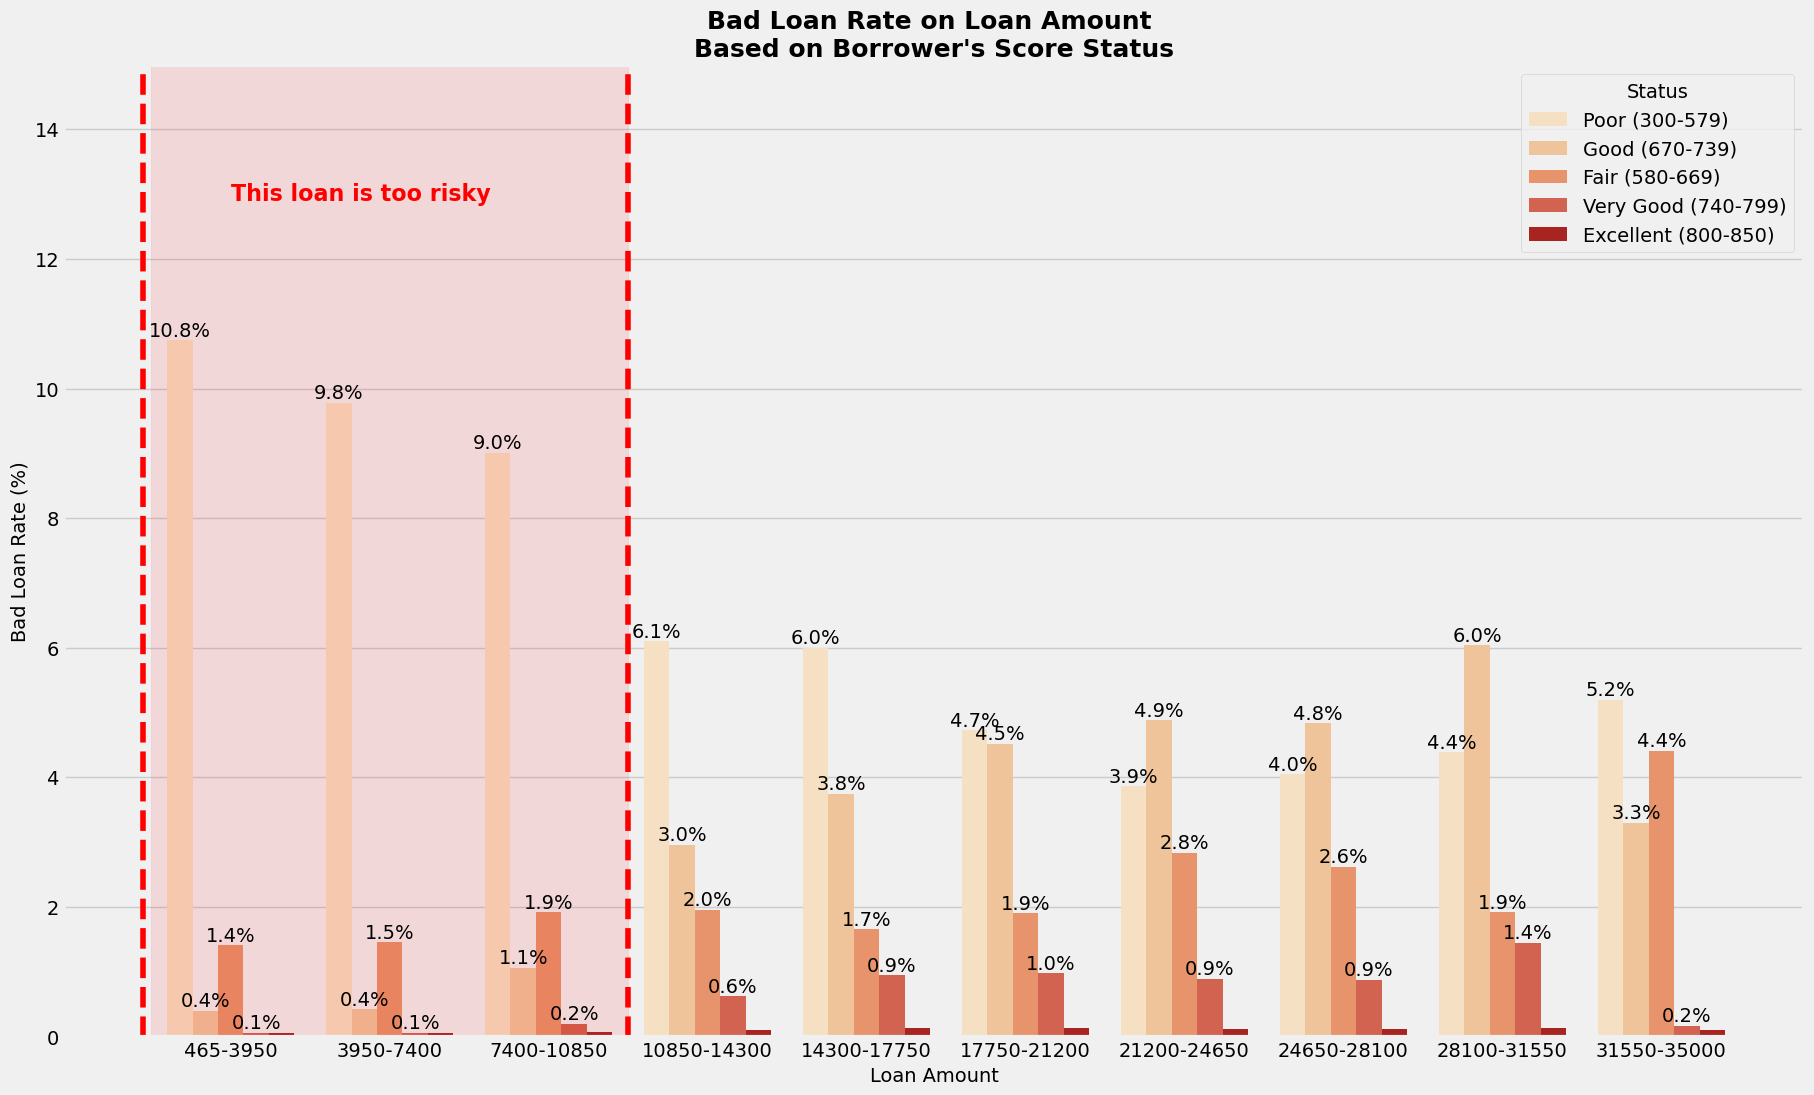

In [ ]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (20, 12))

#plot data
sns.barplot(data = df_bad_loan_rate, x='loan_amnt_fc',
            y='bad_loan_rate', hue='score_group',
            orient='v', palette='OrRd', ci=None, order= order_list_loan_amnt)

#axvline
plt.axvline(x= -0.55, ls='--', color='red')
plt.axvline(x= 2.5, ls='--', color='red')
plt.stackplot(np.arange(-0.5,3.5),[[25000]], color='red', alpha=0.1)

#text
plt.text(x=0, y=13, s='This loan is too risky',
         fontsize=16, color='red',va='center',weight='bold')

#set y axes
plt.ylim(0,15)

#title
plt.title("Bad Loan Rate on Loan Amount \nBased on Borrower's Score Status",
          fontsize=18, weight ='extra bold')

#show percentage
plt.bar_label(ax.containers[0], fmt='%.1f%%')
plt.bar_label(ax.containers[1], fmt='%.1f%%')
plt.bar_label(ax.containers[2], fmt='%.1f%%')
plt.bar_label(ax.containers[3], fmt='%.1f%%')

#label axis
plt.xlabel('Loan Amount', fontsize=14)
plt.ylabel('Bad Loan Rate (%)', fontsize=14)

#legend
plt.legend(title='Status', loc='upper right')
plt.show()

**Insight :**  
- Customers who have a bad credit score with a loan amount ranging from 465-10,850 have the potential to become a bad loan in the future

### Bad Loan Rate Based On Interest Rate

In [ ]:
def df_bad_loan(df_fc):
    #selected column
    df_int = dv_vis_2.groupby(['score_group','loan_status',df_fc]).agg(num_cust= ('id','count')).reset_index()

    #total customer
    total_cust_int = df_int.groupby([df_fc]).agg(total_cust= ('num_cust','sum')).reset_index()

    #merge
    df_int_group = df_int.merge(total_cust_int, on=df_fc, how='inner')

    #select bad loan
    df_bad_loan_rate = df_int_group[df_int_group['loan_status'] == 'Bad Loan']

    #bad loan rate
    df_bad_loan_rate['bad_loan_rate'] = round((df_bad_loan_rate['num_cust'] / df_bad_loan_rate['total_cust'])*100, 2)

    #sort
    df_bad_loan_rate = df_bad_loan_rate.sort_values('bad_loan_rate', ascending=False).reset_index()

    return df_bad_loan_rate

In [ ]:
#bad loan rate based on int_rate_fc
df_int_rate = df_bad_loan('int_rate_fc')
df_int_rate

index          score_group loan_status int_rate_fc  num_cust  total_cust  \
0      54       Good (670-739)    Bad Loan   21.5-23.5      1478       13214   
1      64       Good (670-739)    Bad Loan       24-26      1133       11151   
2      16       Poor (300-579)    Bad Loan   13.5-15.5      7073       82025   
3      36       Poor (300-579)    Bad Loan   17.5-19.5      3915       45828   
4      44       Good (670-739)    Bad Loan   19.5-21.5      2112       25640   
5       6       Poor (300-579)    Bad Loan   11.5-13.5      6898       87037   
6      62       Fair (580-669)    Bad Loan       24-26       881       11151   
7      26       Poor (300-579)    Bad Loan   15.5-17.5      4737       60439   
8      85       Poor (300-579)    Bad Loan    9.5-11.5      3910       56064   
9      46       Poor (300-579)    Bad Loan   19.5-21.5      1632       25640   
10     34       Good (670-739)    Bad Loan   17.5-19.5      2351       45828   
11     76       Poor (300-579)    Bad Loan     7.5-9.5      2613       54310   
12     56       Poor (300-579)    Bad Loan   21.5-23.5       611       13214   
13     66       Poor (300-579)    Bad Loan       24-26       513       11151   
14     52       Fair (580-669)    Bad Loan   21.5-23.5       569       13214   
15     24       Good (670-739)    Bad Loan   15.5-17.5      2561       60439   
16     58  Very Good (740-799)    Bad Loan   21.5-23.5       534       13214   
17     32       Fair (580-669)    Bad Loan   17.5-19.5      1750       45828   
18     42       Fair (580-669)    Bad Loan   19.5-21.5       950       25640   
19     68  Very Good (740-799)    Bad Loan       24-26       352       11151   
20     22       Fair (580-669)    Bad Loan   15.5-17.5      1798       60439   
21     93       Poor (300-579)    Bad Loan     5.3-7.5       801       29396   
22     48  Very Good (740-799)    Bad Loan   19.5-21.5       604       25640   
23     12       Fair (580-669)    Bad Loan   13.5-15.5      1743       82025   
24     14       Good (670-739)    Bad Loan   13.5-15.5      1642       82025   
25      2       Fair (580-669)    Bad Loan   11.5-13.5      1052       87037   
26     38  Very Good (740-799)    Bad Loan   17.5-19.5       459       45828   
27      4       Good (670-739)    Bad Loan   11.5-13.5       692       87037   
28     81       Fair (580-669)    Bad Loan    9.5-11.5       378       56064   
29     28  Very Good (740-799)    Bad Loan   15.5-17.5       363       60439   
30     50  Excellent (800-850)    Bad Loan   21.5-23.5        59       13214   
31     83       Good (670-739)    Bad Loan    9.5-11.5       248       56064   
32     60  Excellent (800-850)    Bad Loan       24-26        35       11151   
33     72       Fair (580-669)    Bad Loan     7.5-9.5       117       54310   
34     40  Excellent (800-850)    Bad Loan   19.5-21.5        45       25640   
35     30  Excellent (800-850)    Bad Loan   17.5-19.5        80       45828   
36     18  Very Good (740-799)    Bad Loan   13.5-15.5       130       82025   
37     20  Excellent (800-850)    Bad Loan   15.5-17.5        78       60439   
38     10  Excellent (800-850)    Bad Loan   13.5-15.5        73       82025   
39     74       Good (670-739)    Bad Loan     7.5-9.5        36       54310   
40      0  Excellent (800-850)    Bad Loan   11.5-13.5        51       87037   
41      8  Very Good (740-799)    Bad Loan   11.5-13.5        42       87037   
42     89       Fair (580-669)    Bad Loan     5.3-7.5        12       29396   
43     79  Excellent (800-850)    Bad Loan    9.5-11.5        17       56064   
44     91       Good (670-739)    Bad Loan     5.3-7.5        10       29396   
45     70  Excellent (800-850)    Bad Loan     7.5-9.5         8       54310   
46     87  Very Good (740-799)    Bad Loan    9.5-11.5         2       56064   

    bad_loan_rate  
0           11.19  
1           10.16  
2            8.62  
3            8.54  
4            8.24  
5            7.93  
6            7.90  
7  

In [ ]:
def plot_bad_loan(data_df, x, y, hue, order, x_line1, x_line2, r1, r2, x_text, y_text, text, y_ax, title, xlabel):
    plt.style.use('fivethirtyeight')
    fig, ax = plt.subplots(figsize = (20, 12))

    #plot data
    sns.barplot(data = data_df, x=x,
                y= y, hue= hue,
                orient='v', palette='OrRd', ci=None, order=order)

    #axvline
    plt.axvline(x= x_line1, ls='--', color='red')
    plt.axvline(x= x_line2, ls='--', color='red')
    plt.stackplot(np.arange(r1,r2),[[25000]], color='red', alpha=0.1)

    #text
    plt.text(x=x_text, y=y_text, s=text,
             fontsize=16, color='red',va='center',weight='bold')

    #set y axes
    plt.ylim(0,y_ax)

    #title
    plt.title(title,
              fontsize=18, weight ='extra bold')

    #show percentage
    plt.bar_label(ax.containers[0], fmt='%.1f%%')
    plt.bar_label(ax.containers[1], fmt='%.1f%%')
    plt.bar_label(ax.containers[2], fmt='%.1f%%')
    plt.bar_label(ax.containers[3], fmt='%.1f%%')

    #label axis
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel('Bad Loan Rate (%)', fontsize=14)

    #legend
    plt.legend(title='Status', loc='upper right')
    plt.show()

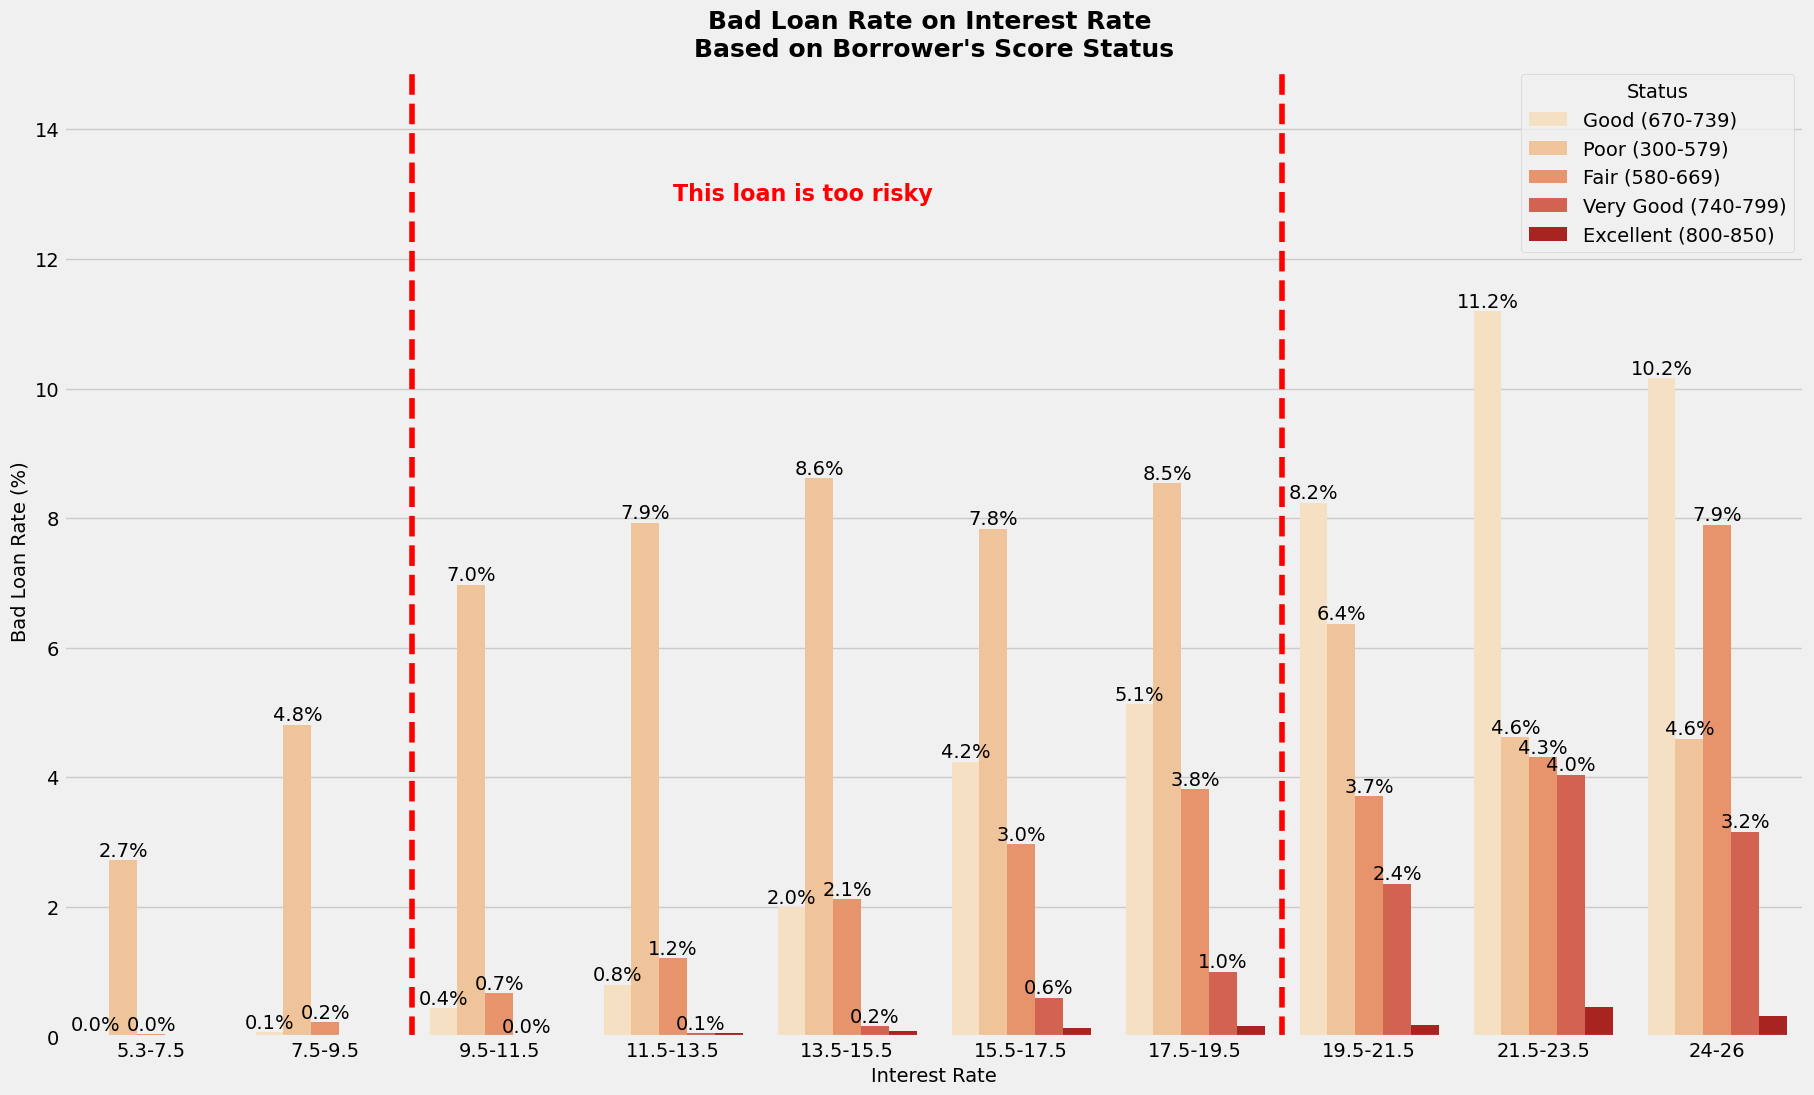

In [ ]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (20, 12))

#plot data
sns.barplot(data = df_int_rate, x='int_rate_fc',
            y='bad_loan_rate', hue='score_group',
            orient='v', palette='OrRd', ci=None, order= order_list_int_rate)

#axvline
plt.axvline(x= 1.5, ls='--', color='red')
plt.axvline(x= 6.5, ls='--', color='red')
#plt.stackplot(np.arange(1,8),[[25000]], color='red', alpha=0.1)

#text
plt.text(x=3, y=13, s='This loan is too risky',
         fontsize=16, color='red',va='center',weight='bold')

#set y axes
plt.ylim(0,15)

#title
plt.title("Bad Loan Rate on Interest Rate \nBased on Borrower's Score Status",
          fontsize=18, weight ='extra bold')

#show percentage
plt.bar_label(ax.containers[0], fmt='%.1f%%')
plt.bar_label(ax.containers[1], fmt='%.1f%%')
plt.bar_label(ax.containers[2], fmt='%.1f%%')
plt.bar_label(ax.containers[3], fmt='%.1f%%')

#label axis
plt.xlabel('Interest Rate', fontsize=14)
plt.ylabel('Bad Loan Rate (%)', fontsize=14)

#legend
plt.legend(title='Status', loc='upper right')
plt.show()

**Insight:**  
- Customers who have a bad credit score with interest rate ranging from 9.5% to 19.5% have the potential to become a bad loan in the future

### Bad Loan Rate Based On Payment Time

In [ ]:
#bad loan rate based on payment time
df_pymnt_time = df_bad_loan('pymnt_time_fc')
df_pymnt_time

index          score_group loan_status pymnt_time_fc  num_cust  \
0      26       Poor (300-579)    Bad Loan    7-12 Month      7237   
1      36       Poor (300-579)    Bad Loan   Over 1 year     14521   
2      16       Poor (300-579)    Bad Loan     2-6 Month      7507   
3      34       Good (670-739)    Bad Loan   Over 1 year      6322   
4      24       Good (670-739)    Bad Loan    7-12 Month      2784   
5      32       Fair (580-669)    Bad Loan   Over 1 year      4536   
6      22       Fair (580-669)    Bad Loan    7-12 Month      1982   
7      14       Good (670-739)    Bad Loan     2-6 Month      2846   
8      12       Fair (580-669)    Bad Loan     2-6 Month      2057   
9       6       Poor (300-579)    Bad Loan       1 Month      3438   
10     38  Very Good (740-799)    Bad Loan   Over 1 year      1791   
11     28  Very Good (740-799)    Bad Loan    7-12 Month       341   
12     18  Very Good (740-799)    Bad Loan     2-6 Month       347   
13      2       Fair (580-669)    Bad Loan       1 Month       675   
14     30  Excellent (800-850)    Bad Loan   Over 1 year       223   
15     20  Excellent (800-850)    Bad Loan    7-12 Month       104   
16      4       Good (670-739)    Bad Loan       1 Month       311   
17     10  Excellent (800-850)    Bad Loan     2-6 Month       100   
18      0  Excellent (800-850)    Bad Loan       1 Month        19   
19      8  Very Good (740-799)    Bad Loan       1 Month         7   

    total_cust  bad_loan_rate  
0        59988          12.06  
1       120679          12.03  
2        91570           8.20  
3       120679           5.24  
4        59988           4.64  
5       120679           3.76  
6        59988           3.30  
7        91570           3.11  
8        91570           2.25  
9       192867           1.78  
10      120679           1.48  
11       59988           0.57  
12       91570           0.38  
13      192867           0.35  
14      120679           0.18  
15       59988           0.17  
16      192867           0.16  
17       91570           0.11  
18      192867           0.01  
19      192867           0.00

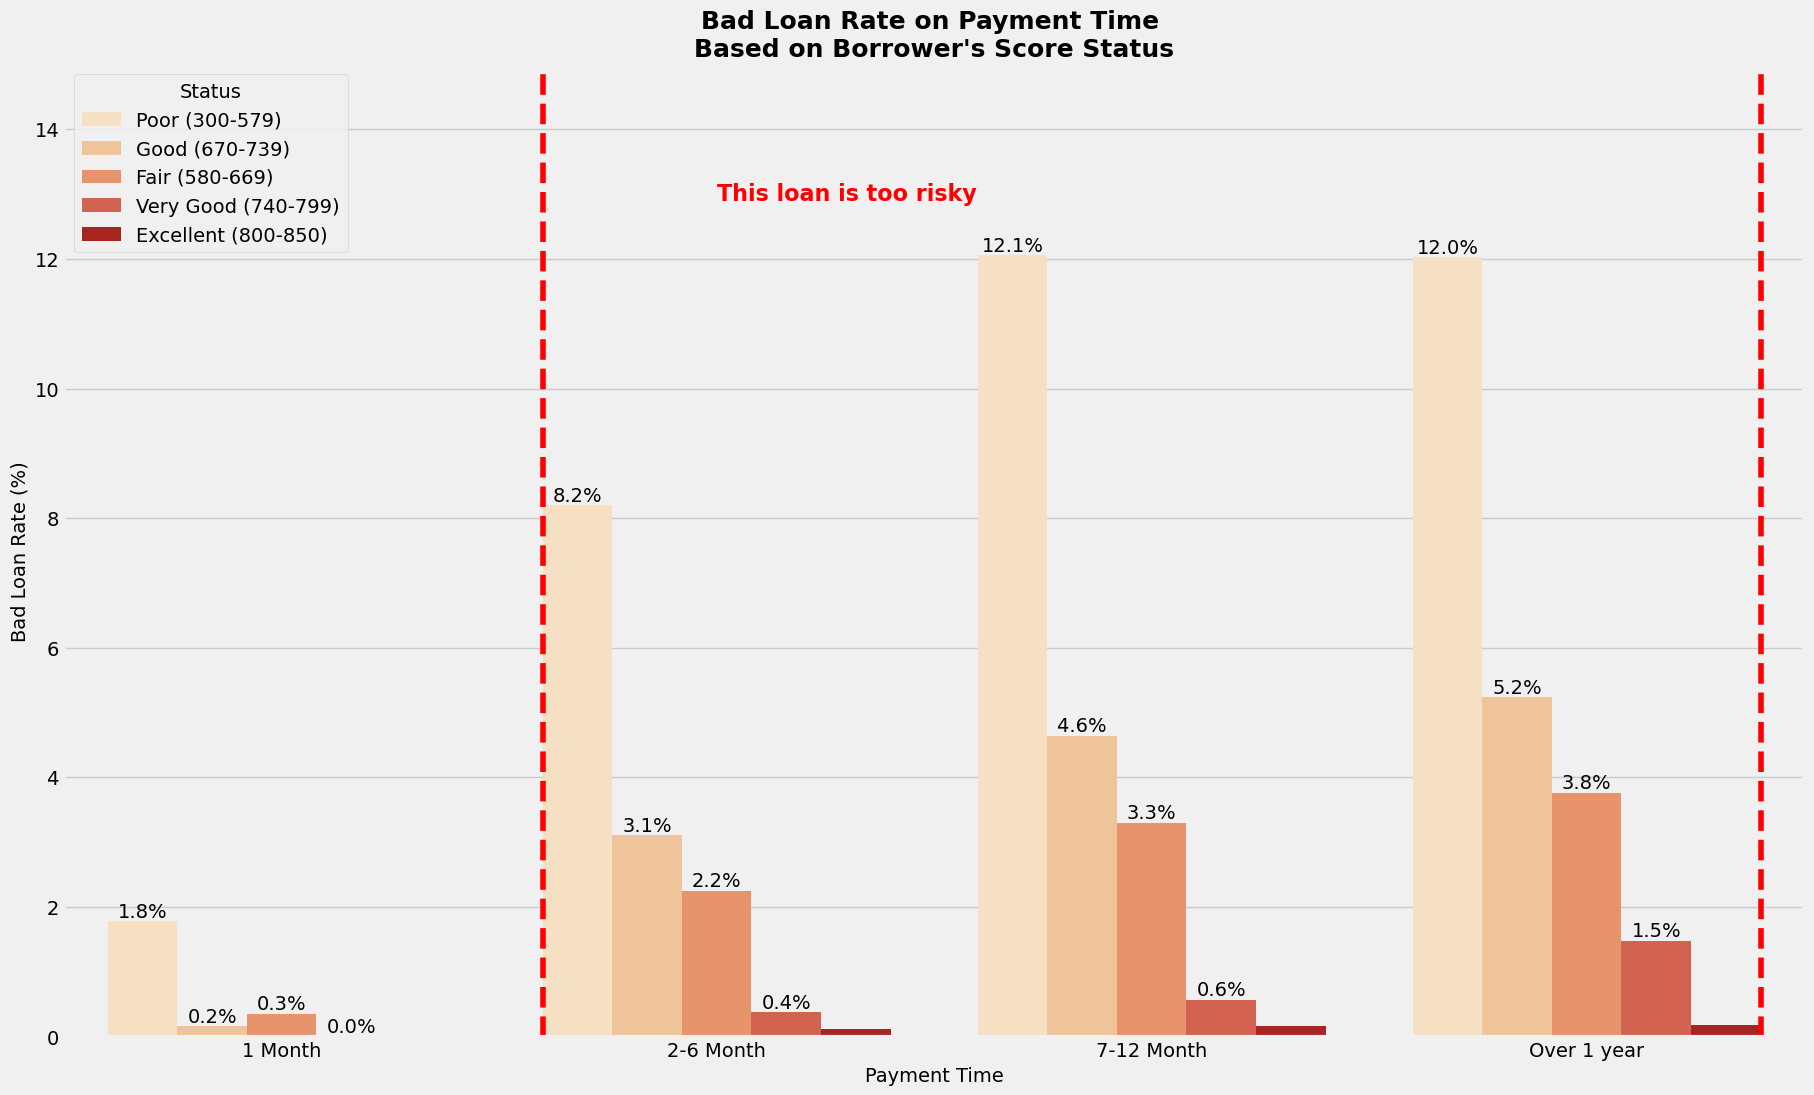

In [ ]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (20, 12))

#plot data
sns.barplot(data = df_pymnt_time, x='pymnt_time_fc',
            y='bad_loan_rate', hue='score_group',
            orient='v', palette='OrRd', ci=None, order= order_list_pymnt_time)

#axvline
plt.axvline(x= 0.6, ls='--', color='red')
plt.axvline(x= 3.4, ls='--', color='red')
#plt.stackplot(np.arange(0.6,4),[[25000]], color='red', alpha=0.1)

#text
plt.text(x=1, y=13, s='This loan is too risky',
         fontsize=16, color='red',va='center',weight='bold')

#set y axes
plt.ylim(0,15)

#title
plt.title("Bad Loan Rate on Payment Time \nBased on Borrower's Score Status",
          fontsize=18, weight ='extra bold')

#show percentage
plt.bar_label(ax.containers[0], fmt='%.1f%%')
plt.bar_label(ax.containers[1], fmt='%.1f%%')
plt.bar_label(ax.containers[2], fmt='%.1f%%')
plt.bar_label(ax.containers[3], fmt='%.1f%%')

#label axis
plt.xlabel('Payment Time', fontsize=14)
plt.ylabel('Bad Loan Rate (%)', fontsize=14)

#legend
plt.legend(title='Status', loc='upper left')
plt.show()

**Insight:**  
- The longer the customer's payment time takes to pay off the loan, the riskier customer's gonna potentially to be bad loan

### Recommendation

- Loan companies can build a robust and effective credit scoring model machine learning using variety of methods and criteria to assess the creditworthiness of potential customers. The goal is to minimize the risk of lending to individuals who are unlikely to repay their loans.
- One of method to evaluate a borrower incorporates both qualitative and quantitative measures is the 5 C's of credit (Character, Capacity, Capital, Collateral, and Conditions)

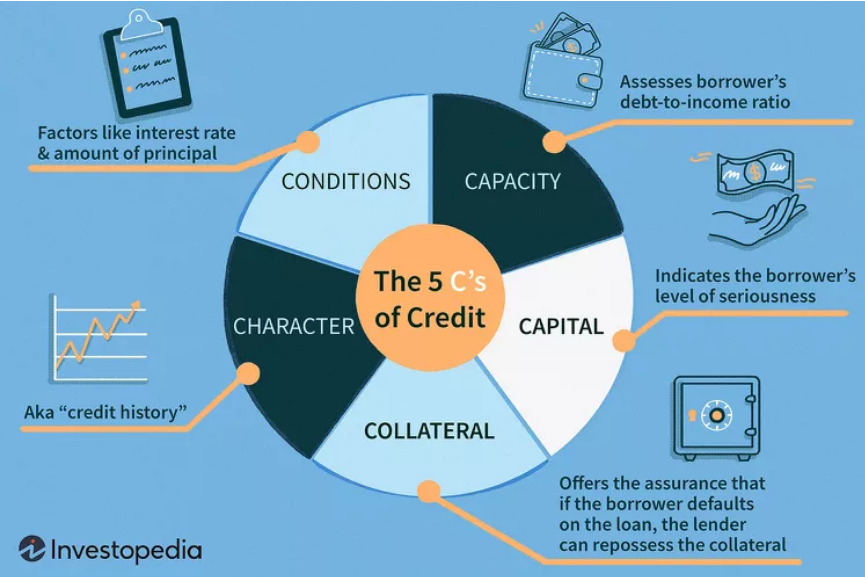

In [ ]:
Image(filename='image_IDX/5c.png', width= 600)